In [1]:
import numpy as np
import cProfile
import matplotlib.pyplot as plt
import scipy.special as sp
from scipy.integrate import quad
from scipy.interpolate import interp1d, interp2d
from scipy.signal import argrelextrema
import tqdm
from tqdm.notebook import tqdm_notebook
from scipy.special import jv
import multiprocessing
import time
import pstats
from pstats import SortKey

from decayRatesFunctionsCombinedNoVdd import V_dd_3D, hermite, harmonic_oscillator, density, computeZDimensions, V_dd_averaged, effectivePotential, \
            ho_list, normalize, normalizeMax, checkNormalization, ϕ_1array, ϕ_2array, ϕ_2arrayScipy, ϕ_2arrayNumerov, ϕ_zeroEnergy, \
            j0, j1, j2, computeRhoDimensions, createRhoTot, createRhoArrays, computeRhoArrays, createDRhoArray, \
            interpolatePhi0, integrand_2array, matrixElementSquared, \
            statesAccessible, outputK, findRhoMax, findKfExtrema, decayOneChannel, decayAllChannel, normalizeDecay, normalizedDecayAllChannel, \
            createListϕ0, createListHOstates, multiprocessing_func, runSimulationList, \
            saveResults, loadResults, dicToArray, \
            integralPure2D, betaCoefficientPure2D, phiZero, rhoPatching, delta, gamma, analyticFarDistance, \
            phiArrayAnalytic, analyticFreeSolution
#runSimulationListToDict
from config import k_B, h, hbar, mu_B, mu_0, m_unit, m, mu, g_J, J, a_dd, E_dd, Bnorm, OmegaNorm, a_0, zPrecisionDefault

import pandas as pd
# You need to put the output file of the experiment in this specific folder
df = pd.read_pickle('dataOut/dataRuns.pickle')

# Tests (garbage)

In [2]:
ki = 0.06
Bmax = 2
Bmin = 0.02
nB = 20
omegaMin = 0.01
omegaMax = 1
nOmega = 20

ρmin_init, ρmax_init, dρ_init = 0.01, 5, 0.01
dρ_large_ratio = 0.01

BList = np.linspace(Bmin, Bmax, nB)
OmegaList = np.linspace(omegaMin, omegaMax, nOmega)
DList = np.sqrt(2/OmegaList)
z_max, dz = computeZDimensions(DList)
ρ_parameters = [ρmin_init, ρmax_init, dρ_init, dρ_large_ratio]

In [3]:
nStates = 0
rhoLengthList = []
nStatesList = []
for B in BList:
    for omega in OmegaList:
        listStates = statesAccessible(ki, B, omega)
        nState = len(listStates[1]) + len(listStates[2])
        nStatesList += [nState]
        rhoLengthSubList = []
        for j in [1, 2]:
            for n in listStates[j]:
                kf = outputK(ki, B, omega, j, n)
                rhoLengthList += [len(computeRhoArrays(ki, kf, ρ_parameters)[2])]
        #print(rhoLengthSubList)
        #rhoLengthList += [rhoLengthSubList]
        nStates += nState

In [4]:
len(rhoLengthList)

10329

In [5]:
startTime = time.time()
decayRates = runSimulationList(OmegaList, BList, ki, ρ_parameters, barrier = True)
#decayRatesNoVdd = runSimulationList(OmegaList, BList, ki, ρ_parameters, barrier = False)
print('it took ', str(round(time.time() - startTime, 2)), ' seconds')

calculating groud state wavefunction
calculating ho wavefunction
number of jobs pending:  400 , end expected in  0  seconds
number of jobs pending:  400 , end expected in  0  seconds
number of jobs pending:  383 , end expected in  54  seconds
number of jobs pending:  375 , end expected in  111  seconds
number of jobs pending:  370 , end expected in  153  seconds
number of jobs pending:  368 , end expected in  200  seconds
number of jobs pending:  358 , end expected in  191  seconds
number of jobs pending:  353 , end expected in  206  seconds
number of jobs pending:  345 , end expected in  203  seconds
number of jobs pending:  332 , end expected in  183  seconds
number of jobs pending:  314 , end expected in  155  seconds
number of jobs pending:  291 , end expected in  126  seconds
number of jobs pending:  260 , end expected in  97  seconds
number of jobs pending:  229 , end expected in  77  seconds
number of jobs pending:  187 , end expected in  54  seconds
number of jobs pending:  137

In [5]:
ϕ0List = createListϕ0(ki, BList, OmegaList, ρ_parameters, ho_states = None, zPrecision = zPrecisionDefault, barrier = True)
ho_statesList = createListHOstates(ki, BList, OmegaList, zPrecisionDefault)

In [8]:
kf_fake = 1
ρ_init, ρ_large, ρ_tot = computeRhoArrays(ki, kf_fake, ρ_parameters)
ρ_tot[-1]

214.0

In [9]:
int(2*2*np.pi/0.06)

209

In [12]:
findRhoMax(ki, BList, 0.01, ρ_parameters)

284

In [30]:
rhoMaxList = []
for B in BList:
    listStates = statesAccessible(ki, B, 0.01)
    for j in [1, 2]:
        for n in listStates[j]:
            kf = outputK(ki, B, 0.01, j, n)
            rhoMaxList += [computeRhoDimensions(ki, kf, ρ_parameters)[1][0]]

In [4]:
ρmin_init, ρmax_init, dρ_init, dρ_large_ratio = ρ_parameters
ρ_init = np.linspace(ρmin_init, ρmax_init, round(ρmax_init/dρ_init))
dρ_large = dρ_large_ratio*2*np.pi/ki
ρ_large = np.linspace(ρmax_init, ρmax_large, round((ρmax_large-ρmax_init)/dρ_large))
ρ_tot = np.concatenate((ρ_init, ρ_large[1:]))
#ϕ0_array = ϕ_2array(ρ_init, ρ_large, m = 0, k = ki, n = 0, D = D, ho_states = ho_states, norm = True, zPrecision = zPrecision, barrier = barrier)

NameError: name 'ρmax_large' is not defined

In [ ]:
ϕ0_interpolated

In [6]:
B = BList[0]
Omega = OmegaList[0]
ϕ0_interpolated = ϕ0List[0]
ho_states = ho_statesList[0]
barrier = True
normalizedDecayAllChannel(ki, B, Omega, ρ_parameters, ho_states, ϕ0_interpolated, zPrecisionDefault, barrier)

ValueError: A value in x_new is above the interpolation range.

In [17]:
index = 0
processes = []
manager = multiprocessing.Manager()
decayRates = manager.dict()
pool = multiprocessing.Pool(processes=8)
pool.apply_async(multiprocessing_func, args=(decayRates, ki, B, OmegaList, index, ρ_parameters, ho_statesList, ϕ0List, zPrecisionDefault, barrier,))
pool.close()
pool.join()

In [21]:
decayRates.values()

[1.2875588755706726e-12]

In [22]:
dicToArray(decayRates, OmegaList, BList)

array([[1.28755888e-12]])

# For Julius

In [2]:
from scipy.integrate import odeint, solve_ivp
from time import perf_counter

## With ODEINT

In [3]:
dρ1 = .001
ρmax1 = 10
dρ2 = .01
ρmax2 = 200
size_arr1 = int(ρmax1/dρ1)
size_arr2 = int((ρmax2-ρmax1)/dρ2)
ρ_init = np.linspace(dρ1,ρmax1,size_arr1)
ρ_large = np.linspace(ρmax1,ρmax2,size_arr2)
ρ_tot = createRhoTot(ρ_init, ρ_large)

def g(ρ, m, k, n, D, ho_states = None, zPrecision = zPrecisionDefault, barrier = True):
    return (m**2 - 1/4.)/ρ**2 + V_dd_averaged(ρ, n, D, ho_states, zPrecision, barrier) - k**2
    
def secondDerivative(y, ρ, m, k, n, D):
    dydt = [y[1], y[0]*g(ρ, m, k, n, D)]
    return dydt

m = 0
ki = 0.06
n = 0
omega = 0.8
D = np.sqrt(2/omega)
y0 = [0,1]
t1_scipy = perf_counter()
sol = odeint(secondDerivative, y0, ρ_tot, args = (m, ki, n, D))[:, 0]
phi = normalizeMax(sol, ρ_tot)
t2_scipy = perf_counter()
t1_numerov = perf_counter()
phiNumerov = ϕ_2array(ρ_init, ρ_large, m, ki, n, D, ho_states = None, zPrecision = zPrecisionDefault, norm = True, barrier = True)
t2_numerov = perf_counter()

In [4]:
print(f'Scipy took {t2_scipy - t1_scipy}')
print(f'Numerov took {t2_numerov - t1_numerov}')

Scipy took 0.20087283800000222
Numerov took 0.29899730300000016


<ipython-input-5-1b836d0352a8>:7: RuntimeWarning: invalid value encountered in true_divide
  axDelta.plot(ρ_tot, (phi - phiNumerov)/phiNumerov, label = 'Delta')


(-1.0, 100.0)

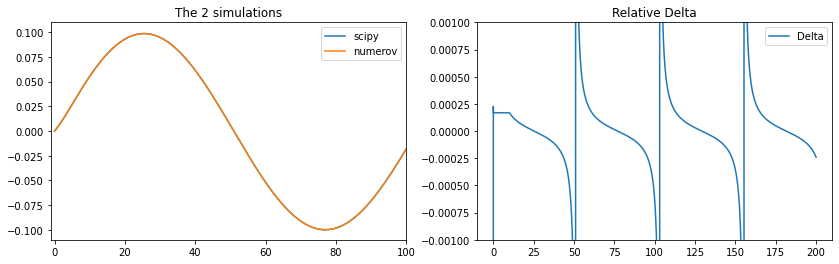

In [5]:
fig, ax = plt.subplots(1, 2, figsize = (14, 4))
axFunction, axDelta = ax
axFunction.plot(ρ_tot, phi, label = 'scipy')
axFunction.plot(ρ_tot, phiNumerov, label = 'numerov')
axFunction.set_title('The 2 simulations')
axDelta.set_title('Relative Delta')
axDelta.plot(ρ_tot, (phi - phiNumerov)/phiNumerov, label = 'Delta')
axDelta.legend()
axDelta.set_ylim(-1E-3, 1E-3)
axFunction.legend()
axFunction.set_xlim(-1, 100)

## With solve_ivp

In [16]:
def g(ρ, m, k, n, D, ho_states = None, zPrecision = zPrecisionDefault, barrier = True):
    return (m**2 - 1/4.)/ρ**2 + V_dd_averaged(ρ, n, D, ho_states, zPrecision, barrier) - k**2
    
def secondDerivative(ρ, y, m, k, n, D):
    dydt = [y[1], y[0]*g(ρ, m, k, n, D)]
    return dydt

m = 0
ki = 0.06
n = 0
omega = 0.8
D = np.sqrt(2/omega)
y0 = [0,1]
dρ1 = .001
ρmax1 = 10
dρ2 = .01
ρmax2 = 200
size_arr1 = int(ρmax1/dρ1)
size_arr2 = int((ρmax2-ρmax1)/dρ2)
ρ_init = np.linspace(dρ1,ρmax1,size_arr1)
ρ_large = np.linspace(ρmax1,ρmax2,size_arr2)
ρ_tot = createRhoTot(ρ_init, ρ_large)

t1_scipy = perf_counter()
sol = solve_ivp(secondDerivative, t_span = (dρ1,ρmax2), y0 = y0, t_eval = ρ_tot, args = (m, ki, n, D), rtol = 10**-3, method = 'LSODA')
phi = normalizeMax(sol.y[0,:], ρ_tot)
t2_scipy = perf_counter()
t1_numerov = perf_counter()
phiNumerov = ϕ_2array(ρ_init, ρ_large, m, ki, n, D, ho_states = None, zPrecision = zPrecisionDefault, norm = True, barrier = True)
t2_numerov = perf_counter()

In [17]:
print(f'Scipy took {t2_scipy - t1_scipy}')
print(f'Numerov took {t2_numerov - t1_numerov}')

Scipy took 0.09485094599995136
Numerov took 0.3149091720000001


<ipython-input-18-7a65a10b5dad>:7: RuntimeWarning: divide by zero encountered in true_divide
  axDelta.plot(ρ_tot, (phi - phiNumerov)/phiNumerov, label = 'Delta')


(-1.0, 100.0)

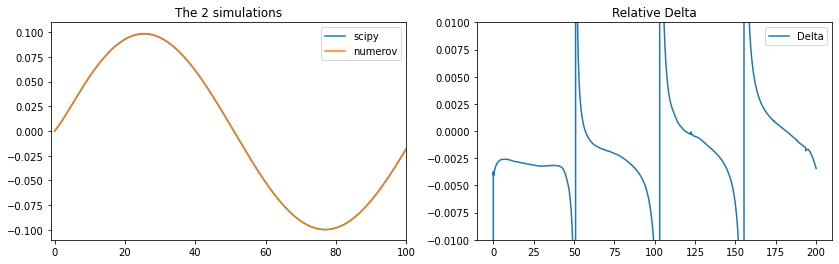

In [18]:
fig, ax = plt.subplots(1, 2, figsize = (14, 4))
axFunction, axDelta = ax
axFunction.plot(ρ_tot, phi, label = 'scipy')
axFunction.plot(ρ_tot, phiNumerov, label = 'numerov')
axFunction.set_title('The 2 simulations')
axDelta.set_title('Relative Delta')
axDelta.plot(ρ_tot, (phi - phiNumerov)/phiNumerov, label = 'Delta')
axDelta.legend()
axDelta.set_ylim(-1E-2, 1E-2)
axFunction.legend()
axFunction.set_xlim(-1, 100)

## Profiling

In [23]:
cProfile.run("solve_ivp(secondDerivative, t_span = (dρ1,ρmax2), y0 = y0, t_eval = ρ_tot, args = (m, ki, n, D), rtol = 10**-3, method = 'LSODA')", 'saveResults')
p = pstats.Stats('saveResults')
#p.strip_dirs().sort_stats(-1).print_stats()
#p.sort_stats(SortKey.CUMULATIVE).print_stats(10)
p.sort_stats(SortKey.TIME).print_stats(10)

Sat Nov 27 11:39:18 2021    saveResults

         58843 function calls (56974 primitive calls) in 0.114 seconds

   Ordered by: internal time
   List reduced from 150 to 10 due to restriction <10>

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
      373    0.008    0.000    0.008    0.000 /Users/pierre/Documents/Scolaire/MIT/Graduate/1DLatticeExperiment/dypole-lattice/numerov/finalVersion/decayRatesFunctionsCopy.py:16(V_dd_3D)
      373    0.007    0.000    0.019    0.000 /usr/local/lib/python3.9/site-packages/numpy/core/function_base.py:23(linspace)
      746    0.007    0.000    0.009    0.000 /usr/local/lib/python3.9/site-packages/numpy/lib/stride_tricks.py:339(_broadcast_to)
      373    0.007    0.000    0.025    0.000 /Users/pierre/Documents/Scolaire/MIT/Graduate/1DLatticeExperiment/dypole-lattice/numerov/finalVersion/decayRatesFunctionsCopy.py:25(harmonic_oscillator)
3812/1943    0.006    0.000    0.051    0.000 {built-in method numpy.core._multiarray_u

## Free solution simulation

In [11]:
# False barrier default

def g(ρ, m, k, n, D, ho_states = None, zPrecision = zPrecisionDefault, barrier = False):
    return (m**2 - 1/4.)/ρ**2 + V_dd_averaged(ρ, n, D, ho_states, zPrecision, barrier) - k**2
    
def secondDerivative(ρ, y, m, k, n, D):
    dydt = [y[1], y[0]*g(ρ, m, k, n, D)]
    return dydt

m = 0
ki = 0.06
n = 0
omega = 0.8
D = np.sqrt(2/omega)
y0 = [0,1]
#dρ1 = .00001
ρmax1 = 1
ρ_init = np.logspace(-9,np.log(ρmax1),10000)
dρ2 = .001
ρmax2 = 200
size_arr1 = len(ρ_init)
size_arr2 = int((ρmax2-ρmax1)/dρ2)
ρ_large = np.linspace(ρmax1,ρmax2,size_arr2)
ρ_tot = createRhoTot(ρ_init, ρ_large)

t1_scipy = perf_counter()
sol = solve_ivp(secondDerivative, t_span = (ρ_init[0],ρmax2), y0 = y0, t_eval = ρ_tot, args = (m, ki, n, D), rtol = 10**-3, method = 'LSODA')
phi = normalizeMax(sol.y[0,:], ρ_tot)
t2_scipy = perf_counter()
freeSolution = analyticFreeSolution(ρ_tot, k = ki, m = 0)

(-1.0, 20.0)

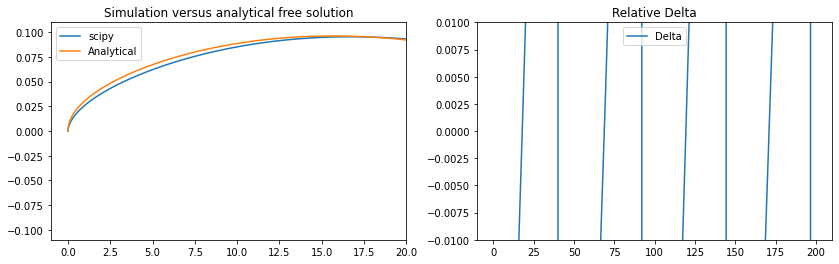

In [12]:
fig, ax = plt.subplots(1, 2, figsize = (14, 4))
axFunction, axDelta = ax
axFunction.plot(ρ_tot, phi, label = 'scipy')
axFunction.plot(ρ_tot, freeSolution, label = 'Analytical')
axFunction.set_title('Simulation versus analytical free solution')
axDelta.set_title('Relative Delta')
axDelta.plot(ρ_tot, (phi - freeSolution)/freeSolution, label = 'Delta')
axDelta.legend()
axDelta.set_ylim(-1E-2, 1E-2)
axFunction.legend()
axFunction.set_xlim(-1, 20)

## Computational time comparaison

In [11]:
from scipy.integrate import odeint
from time import perf_counter

def g(ρ, m, k, n, D, ho_states = None, zPrecision = zPrecisionDefault, barrier = True):
    return (m**2 - 1/4.)/ρ**2 + V_dd_averaged(ρ, n, D, ho_states, zPrecision, barrier) - k**2
    
def secondDerivativeODEINT(y, ρ, m, k, n, D):
    dydt = [y[1], y[0]*g(ρ, m, k, n, D)]
    return dydt

def secondDerivativeSolveIVP(ρ, y, m, k, n, D):
    dydt = [y[1], y[0]*g(ρ, m, k, n, D)]
    return dydt

m = 0
ki = 0.06
n = 0
omega = 0.8
D = np.sqrt(2/omega)
y0 = [0,1]

pList = np.logspace(-3, 1, 20)
arraySize = []
perfRatio = []
perfNumerov = []
perfScipyODEINT = []
perfScipySolveIVP = []
for p in pList:
    print(p)
    dρ1 = .1*p
    ρmax1 = 100
    dρ2 = 1*p
    ρmax2 = 1000
    size_arr1 = int(ρmax1/dρ1)
    size_arr2 = int((ρmax2-ρmax1)/dρ2)
    ρ_init = np.linspace(dρ1,ρmax1,size_arr1)
    ρ_large = np.linspace(ρmax1,ρmax2,size_arr2)
    ρ_tot = createRhoTot(ρ_init, ρ_large)
    t1_scipyODEINT = perf_counter()
    sol = odeint(secondDerivativeODEINT, y0, ρ_tot, args = (m, ki, n, D))[:, 0]
    phi = normalizeMax(sol, ρ_tot)
    t2_scipyODEINT = perf_counter()
    t1_scipySolveIVP = perf_counter()
    sol = solve_ivp(secondDerivativeSolveIVP, t_span = (dρ1,ρmax2), y0 = y0, t_eval = ρ_tot, args = (m, ki, n, D), rtol = 10**-3, method = 'RK45')
    phi = normalizeMax(sol.y[0,:], ρ_tot)
    t2_scipySolveIVP = perf_counter()
    t1_numerov = perf_counter()
    phiNumerov = ϕ_2array(ρ_init, ρ_large, m, ki, n, D, ho_states = None, zPrecision = zPrecisionDefault, norm = True, barrier = True)
    t2_numerov = perf_counter()
    arraySize += [size_arr1 + size_arr2]
    perfNumerov += [t2_numerov - t1_numerov]
    perfScipyODEINT += [t2_scipyODEINT - t1_scipyODEINT]
    perfScipySolveIVP += [t2_scipySolveIVP - t1_scipySolveIVP]

0.001
0.001623776739188721
0.0026366508987303583
0.004281332398719396
0.0069519279617756054
0.011288378916846888
0.018329807108324356
0.029763514416313176
0.04832930238571752
0.07847599703514611
0.12742749857031335
0.20691380811147903
0.3359818286283781
0.5455594781168515
0.8858667904100823
1.438449888287663
2.3357214690901213
3.792690190732246
6.158482110660261
10.0


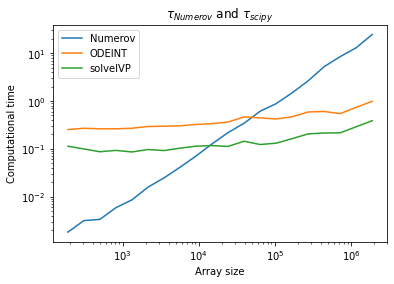

In [86]:
plt.loglog(arraySize, perfNumerov, label = 'Numerov')
plt.loglog(arraySize, perfScipyODEINT, label = 'ODEINT')
plt.loglog(arraySize, perfScipySolveIVP, label = 'solveIVP')
plt.title(r'$\tau_{Numerov}$ and $\tau_{scipy}$')
plt.xlabel('Array size')
plt.ylabel('Computational time')
plt.legend()
plt.savefig('perfTiming.jpg', dpi = 300)

# Fermi's golden rule

$$\newcommand{\braket}[2]{\left\langle{#1}\middle|{#2}\right\rangle}$$
$$\newcommand{\braketElement}[3]{\left\langle{#1}\middle|{#2}\middle|{#3}\right\rangle}$$
$$\newcommand{\bra}[1]{\left\langle{#1}\middle|\right.}$$
$$\newcommand{\ket}[1]{\left.\middle|{#1}\right\rangle}$$

## Definition of the wavefunctions

### Spacial wavefunction

The wavefunctions are assumed to be written like a radial wavefunction times a harmonic oscillator state in the relative coordinates frame:
\begin{equation}
\label{3D_wavefunction}
\Psi_{3D}(\rho, z) = \sum \limits_{n, m}c_{m,n}\frac{e^{im\theta}}{\sqrt{2\pi}}\Psi^{n, m}(\rho)\chi_{n}(z)
\end{equation}

Where $\chi_{n}$ are the harmonic oscillator states:
\begin{equation}
\chi_{n}(z) = \frac{1}{\sqrt{2^n n!}}\left(\frac{1}{\pi a_z^2}\right)^{1/4}H_n(z/a_z)e^{-\frac{z^2}{2a_z^2}}
\end{equation}
with
\begin{equation}
\boxed{a_z = \sqrt{\frac{\hbar}{\mu\omega_z}}}
\end{equation}
where $\mu = m/2$ is the reduced mass, and $\omega_z$ the trap frequency in the lattice direction.

We will look only channel by channel thanks to the selection rules in $m$ (see later), so we only focus on one $(n, m)$ wavefunction:
\begin{equation}
\boxed{\Psi_{3D, n, m}(\rho, z) = \frac{e^{im\theta}}{\sqrt{2\pi}}\Psi_{n, m}(\rho)\chi_{n}(z) = \frac{e^{im\theta}}{\sqrt{2\pi}}\Psi_{2D, n, m}(\rho, z)}
\end{equation}
Where $\Psi_{2D, n, m}(\rho, z) = \Psi_{n, m}(\rho)\chi_{n}(z)$ (we will only use it to simply express the selection rules, just be careful that here 2D means in $\rho$ and $z$ without $\theta$ dependence). I will also sometimes use the notation $\varphi_{2D, n, m}(\rho, \theta) = \frac{e^{im\theta}}{\sqrt{2\pi}}\Psi_{n, m}(\rho)$, which has no $z$ dependance but keeps the $\theta$ one.

### Normalization

The 3D function is normalized, so $\iiint|\Psi_{3D}|^2d\tau = 1 = \underbrace{\int d\theta\frac{1}{2\pi}}_{1} \int d\rho \rho\Psi_{n, m}(\rho)^2\underbrace{\int dz\chi_{n}(z)^2}_{1}$ and therefore $\int d\rho \rho\Psi_{n, m}(\rho)^2 = 1$. By defining:
\begin{equation}
\phi_{n,m}(\rho) = \frac{\Psi_{n,m}(\rho)}{\sqrt{\rho}}
\end{equation}
We get that:
\begin{equation}
\boxed{\int d\rho\phi_{n,m}(\rho)^2 = 1}
\end{equation}

### Full wavefunction

I also take into account the internal spin state of the pair of atoms, indexed by $j$:
\begin{equation}
\boxed{\ket{\Psi_{tot, n, m, j}} = \ket{\Psi_{3D, n, m}} \otimes \ket{j}}
\end{equation}
With:
\begin{array}{rc|l}
\ket{j} &=& \ket{j_0} = \ket{8,8}  \\
        & & \ket{j_1} = \frac{\ket{8,7}+\ket{7,8}}{2}  \\
        & & \ket{j_2} = \ket{7,7}  \\
\end{array}

## Dipolar potential

### Operator expression

#### Base expression

The dipolar potential acts both on the position and the spin of the atoms. Noting $\vec{J}_i$ the angular momentum operator of the atom $i$, $r = \sqrt{\rho^2 + z^2}$ the distance between the 2 atoms and $\vec{u}_r$ the unit vector of their relative position we have:
\begin{equation}
V_{dd} = \frac{\mu_0}{4\pi}(g_J\mu_B)^2\frac{\vec{J}_1 \cdot \vec{J}_2 - 3(\vec{J}_1\cdot\vec{u}_r)(\vec{J}_2\cdot\vec{u}_r)}{r^3}
\end{equation}
for dysprosium $J = 8$ and $g_J\simeq 1.25$, and for chromium $J = 3$ and $g_J = 2$.

#### Decomposition on $J_{i+}$ and $J_{i-}$

We can decompose the operators using $J_+ = J_x+iJ_y$ and $J_- = J_x-iJ_y$ $\Leftrightarrow$ $J_x = \frac{1}{2}(J_+ + J_-)$ and $J_y = \frac{1}{2i}(J_+ - J_-)$.

##### First term

Since $\vec{J}_{1+}\vec{J}_{2-} + \vec{J}_{1-}\vec{J}_{2+} = 2\left(\vec{J}_{1x}\vec{J}_{2x} + \vec{J}_{1y}\vec{J}_{2y}\right)$ we get:
\begin{equation}
\vec{J}_1 \cdot \vec{J}_2 = \vec{J}_{1x}\vec{J}_{2x} + \vec{J}_{1y}\vec{J}_{2y} + \vec{J}_{1z}\vec{J}_{2z} = \vec{J}_{1z}\vec{J}_{2z} + \frac{1}{2}\left(\vec{J}_{1+}\vec{J}_{2-} + \vec{J}_{1-}\vec{J}_{2+}\right)
\end{equation}

##### Second term

The other term goes like:
\begin{eqnarray}
(\vec{J}_1\cdot\vec{u}_r)(\vec{J}_2\cdot\vec{u}_r) &=& \frac{\vec{J}_{1x}x + \vec{J}_{1y}y + \vec{J}_{1z}z}{r}\frac{\vec{J}_{2x}x + \vec{J}_{2y}y + \vec{J}_{2z}z}{r}
\end{eqnarray}

I will note $\hat{x}=x/r$, $\hat{y}=y/r$, $\hat{z}=z/r$ and $\hat{r}_+=\hat{x}+i\hat{y}$, $\hat{r}_-=\hat{x}-i\hat{y}$
\begin{eqnarray}
(\vec{J}_1\cdot\vec{u}_r)(\vec{J}_2\cdot\vec{u}_r) &=& \frac{1}{2}\left[\left(J_{1+}+J_{1-}\right)\hat{x} - i\left(J_{1+}-J_{1-}\right)\hat{y} + 2J_{1z}\hat{z}\right]\frac{1}{2}\left[\left(J_{2+}+J_{2-}\right)\hat{x} - i\left(J_{2+}-J_{2-}\right)\hat{y} + 2J_{2z}\hat{z}\right] \\
        &=&\frac{1}{4}\left[J_{1+}\hat{r}_- + J_{1-}\hat{r}_+ +2J_{1z}\hat{z}\right]\left[J_{2+}\hat{r}_- + J_{2-}\hat{r}_+ +2J_{2z}\hat{z}\right] \\
        &=& J_{1z}J_{2z}\hat{z}\hat{z} \\
        & & + \frac{1}{2}\hat{z}\left[J_{1z}\left(J_{2+}\hat{r}_+ + J_{2-}\hat{r}_+\right) + J_{2z}\left(J_{1+}\hat{r}_+ + J_{1-}\hat{r}_+\right)\right] \\
        & & + \frac{1}{4}\left(J_{1+}\hat{r}_+ + J_{1-}\hat{r}_+\right)\left(J_{2+}\hat{r}_+ + J_{2-}\hat{r}_+\right)
\end{eqnarray}

##### Merging the two terms

Thoses 2 contributions give:
\begin{eqnarray}
V_{dd} = \frac{\mu_0}{4\pi}(g_J\mu_B)^2\frac{1}{r^3}\left\{ \right. & & J_{1z}J_{2z}\left(1-3\hat{z}\hat{z}\right) \\
                    & & + \frac{1}{2}\left(J_{1+}J_{2-}+J_{1-}J_{2+}\right) \\
                    & & - \frac{3}{2}\hat{z}\left[J_{1z}\left(J_{2+}\hat{r}_+ + J_{2-}\hat{r}_+\right) + J_{2z}\left(J_{1+}\hat{r}_+ + J_{1-}\hat{r}_+\right)\right] \\
                    & & - \frac{3}{4}\left(J_{1+}\hat{r}_+ + J_{1-}\hat{r}_+\right)\left(J_{2+}\hat{r}_+ + J_{2-}\hat{r}_+\right)\left.\right\}
\end{eqnarray}
This is the most general expression for the operator.

#### Specific case of $\ket{j_0}$

Now we can apply it to our incoming atom in $\ket{j_0}=\ket{8,8}$, remembering that $J_{1-}\ket{J, J} = \sqrt{2J}\ket{J-1, J}$ and get:
\begin{eqnarray}
V_{dd}\ket{j_0} = \frac{\mu_0}{4\pi}(g_J\mu_B)^2\frac{1}{r^3}\left\{ \right. & & J^2\left(1-3\hat{z}\hat{z}\right)\ket{j_0} \\
                    & & + 0 \\
                    & & - \frac{3}{2}\hat{z}J\sqrt{2J}\left[\ket{J,J-1}\hat{r}_+ + \ket{J-1,J}\hat{r}_+\right] \\
                    & & - \frac{3}{4}(\sqrt{2J})^2\ket{j_2}\hat{r}_+\hat{r}_+\left.\right\}
\end{eqnarray}
Which gives:
\begin{equation}
\boxed{V_{dd}\ket{j_0} = \frac{\mu_0}{4\pi}(Jg_J\mu_B)^2\frac{1}{r^3}\left( \left(1-3\hat{z}\hat{z}\right)\ket{j_0} - \frac{3}{J^{1/2}}\hat{z}\hat{r}_+\ket{j_1} - \frac{3}{2J}\hat{r}_+\hat{r}_+\ket{j_2}\right)}
\end{equation}

### Length scale and energy scale

We can define $\boxed{d^2 = \frac{\mu_0}{4\pi}(Jg_J\mu_B)^2}$ and the dipolar length $\boxed{a_{dd} = \frac{\mu d^2}{\hbar^2} = 10.2 \text{ nm}}$ as well as the dipolar energy $\boxed{E_{dd} = \frac{\hbar^2}{2\mu a_{dd}^2} = k_B 28 \mu\text{K}}$. So that $d^2 = 2E_{dd}a_{dd}^3$. Furthermore I recall that $\hat{r}_+ = \frac{x+iy}{r} = \frac{\rho}{r}e^{i\theta}$. We can therefore define the scalar operators $V_{dd,i}$ such that:
\begin{equation}
V_{dd}\ket{j_0} = V_{dd,0}\ket{j_0} + V_{dd,1}e^{i\theta}\ket{j_1} + V_{dd,2}e^{i2\theta}\ket{j_2}
\end{equation}
The $V_{dd,i}$ are scalar in the sense that they do not act on the spin, unlike $V_{dd}$. Moreover they are only depending on $\rho$ and $z$, not on $\theta$ anymore. Their expressions are:
\begin{eqnarray}
V_{dd,0} &=& 2E_{dd}a_{dd}^3\frac{1}{r^3}\left(1-3\frac{z^2}{r^2}\right) \\
V_{dd,1} &=& 2E_{dd}a_{dd}^3\left(-\frac{3}{J^{1/2}}\right)\frac{z\rho}{r^5} \\
V_{dd,2} &=& 2E_{dd}a_{dd}^3\left(-\frac{3}{2J}\right)\frac{\rho^2}{r^5} \\
\end{eqnarray}

### Selection rule

The $\Psi_{3D, n, m}(\rho, z) = \frac{e^{im\theta}}{\sqrt{2\pi}}\Psi_{n, m}(\rho)\chi_{n}(z)$ contains a $\theta$ that results in the selection rule:
\begin{equation}
\braketElement{\Psi_{tot, n', m', j'}}{V_{dd}}{\Psi_{tot, n, m, j_0}} = 2\pi\braketElement{\Psi_{3D, n', m'}}{V_{dd, j'-j_0}}{\Psi_{3D, n, m}}\delta_{j'-j_0, m' - m} = \braketElement{\Psi_{2D, n', m'}}{V_{dd, j'-j_0}}{\Psi_{2D, n, m}}\delta_{j'-j_0, m' - m}
\end{equation}
Or more simply, starting in $(m, j_0)$, the only non-zero terms are $(m, j_0)$ with $V_{dd, 0}$, $(m + 1, j_1)$ with $V_{dd, 1}$ and $(m + 2, j_2)$ with $V_{dd, 2}$, and the integral over $\theta$ cancels with the $\frac{e^{im\theta}}{\sqrt{2\pi}}$ leaving only on an integral over $\rho$ and $z$ of the $\Psi_{2D}$ wavefunctions.

## Fermi's golden rule

### Notation

Fermi's golden rule is: $ \hbar\Gamma = 2\pi|\bra{f}V\ket{i}|^2\rho(E_f)$. In our case we will go from the $n = 0$ and $j = j_0$ state to some final $n, j$ state. Note that I do not specify that I start in a particular $m$ at this point, and I will keep the notation $m_i$ and $m_f$. Since we are looking at the transition probability between 2 wavefunctions $\Psi_{tot, n, m, j}$ that have a definite $m$, I will note this rate $\Gamma_c$ for gamma cylindrical. When the incoming wave will be a plane wave later in these notes, I will use $\Gamma_p$. The quantity we are looking at is:
\begin{equation}
\hbar\Gamma_{c}^{m_i, m_f, j_f} = 2\pi\left|\bra{\Psi_{tot, n_f, m_f, j_f}}V_{dd}\ket{\Psi_{tot, 0, m_i, j_0}}\right|^2\rho(E_f)
\end{equation}

Actually the selection rule imposes that $j_f = m_f - m_i$, so we can drop the redondant $m_f$ index to write $\Gamma_c^{m_i, j_f}$. On the right we can notice that only the $V_{dd,j_f}$ part will create a coupling, so that $\hbar\Gamma_{c}^{m_i, j_f} = 2\pi\left|\bra{\Psi_{2D, n_f, m_i+j_f}}V_{dd, j_f}\ket{\Psi_{2D, 0, m_i}}\right|^2\rho(E_f)$. We can decompose the integral over $\rho$ and $z$ by introducing:
\begin{equation}
\boxed{\mathcal{V}_{dd,j}^{n_f}(\rho) = \braketElement{n_f}{V_{dd,j}}{0} = \int dz\chi_{n_f}(z)V_{dd,j}(\rho,z)\chi_{0}(z)}
\end{equation}
Eventually it gives:
\begin{equation}
\boxed{\hbar\Gamma_{c}^{m_i, j_f} = 2\pi\left|\int d\rho \phi_{n_f, m_i+j_f}(\rho)\mathcal{V}_{dd, j_f}^{n_f}(\rho)\phi_{0, m_i}(\rho)\right|^2\rho(E_f)}
\end{equation}

### Density of states

Since the outcoming wavefunction is a radial one, the density of states is a 1D one. In a box $L$ with periodic boundary conditions there is one state per $2\pi/L$. So $dN = 2\frac{dk}{2\pi/L}$ (the factor of 2 accounts for the 2 ends of the segment, equivalently one can only count positive $k$ with a $\pi/L$ spacing). And since $E = \frac{\hbar^2 k^2}{2\mu}$ then $dE = \frac{\hbar^2 kdk}{\mu}$ it gives $dN = \frac{L\mu dE}{\pi\hbar^2 k}$. Therefore the density of state $dN/dE$ is:
\begin{equation}
\boxed{\rho_{1D}(k_{f}) = \frac{\mu L}{\pi\hbar^2 k_f}}
\end{equation}

## $\Gamma_{c}$ to $\Gamma_{p}$

### Plane wave expansion

The atoms are not coming in a spherical wave $\ket{\Psi_{tot, 0, m_i, j_0}} = \ket{k_i, m_i}$ but rather in a plane wave $\ket{\vec{k}_i}$ (we will just leave the $n$ and $j$ subscripts out in this paragraph. The decay rate should therefore be:
\begin{equation}
\hbar\Gamma_{p}^{\vec{k}_{i}\rightarrow k_f} = 2\pi\left|\braketElement{k_f, m_f}{V_{dd}}{\vec{k}_i}\right|^2\rho_{1D}(k_f)
\end{equation}
The plane wave on a disk of radius $L$ in position space is:
\begin{equation}
\braket{\vec{\rho}}{\vec{k}_i} = \frac{1}{\sqrt{\pi L^2}}e^{i\vec{k}_i\cdot\vec{\rho}} = \frac{1}{\sqrt{\pi L^2}}e^{ik_i\rho\cos\theta} =  \frac{1}{\sqrt{\pi L^2}}\sum_{m = -\infty}^{+\infty}i^m J_{m}(k_i\rho)e^{im\theta}
\end{equation}
Where $J_m$ is the Bessel function of the first kind. The normalized 1D radial wavefunction is $\sqrt{\frac{\pi k}{L}}J_m(k\rho)$, so the 2D (in the plane, not in $z$) wavefunction $\varphi_{2D, m_i, k_i}$ is:
\begin{equation}
\braket{\vec{\rho}}{\varphi_{2D, m_i, k_i}} = \sqrt{\frac{\pi k_i}{L}}J_{m_i}(k_i\rho)\frac{e^{im_i\theta}}{\sqrt{2\pi}}
\end{equation}
Silencely taking into account the $n$ and $j$ degree of freedom, the full state is $\ket{k_i, m_i}$. So inserting that expression in the plane wave gives:
\begin{equation}
\braket{\vec{\rho}}{\vec{k}_i} = \frac{1}{\sqrt{\pi L^2}}\sum_{m = -\infty}^{+\infty}i^m \sqrt{2\pi}\sqrt{\frac{L}{\pi k_i}}\braket{\vec{\rho}}{k_i, m}
\end{equation}
So:
\begin{equation}
\boxed{\ket{\vec{k}_i} = \sqrt{\frac{2}{\pi k_i L}}\sum_{m = -\infty}^{+\infty}i^m \ket{k_i, m}}
\end{equation}

### $\Gamma_{p}$ decay rate

We are going to make the assumption that only the $m_i=0$ matters in the sum. (We should discuss the validity of this argument by studying the decay of $m_i = -2$ to $m_f = 0$ at various magnetic fields and temperatures). So:
\begin{equation}
\hbar\Gamma_{p}^{\vec{k}_{i}\rightarrow k_f} = 2\pi\left|\braketElement{k_f, m_f}{V_{dd}}{k_i, m_i}\right|^2\rho_{1D}(k_f)\frac{2}{\pi k_i L}
\end{equation}
Or shortly:
\begin{equation}
\boxed{\hbar\Gamma_{p}^{\vec{k}_{i}\rightarrow k_f} = \hbar\Gamma_{c}^{k_i\rightarrow k_f}\frac{2}{\pi k_i L}}
\end{equation}
Since we are restricting ourselves to $m_i = 0$, we can drop this subscript and simply write $\Gamma_{p}^{j_f}$ and $\phi_0$.
\begin{equation}
\hbar\Gamma_{p}^{j_f} = 2\pi\left|\int d\rho \phi_{n_f, m = j_f}(\rho)\mathcal{V}_{dd, j_f}^{n_f}(\rho)\phi_{0}(\rho)\right|^2\frac{\mu L}{\pi\hbar^2 k_f}\frac{2}{\pi k_i L}
\end{equation}
So:
\begin{equation}
\hbar\Gamma_{p}^{j_f} = \frac{4\mu}{\pi\hbar^2 k_i k_f}\left|\int d\rho \phi_{n_f, m = j_f}(\rho)\mathcal{V}_{dd, j_f}^{n_f}(\rho)\phi_{0}(\rho)\right|^2
\end{equation}

## Symmetrization and $\Gamma$

The $\Gamma_{p}$ rate that we just computed is the decay rate of two particles coming in with $\ket{\vec{k}_i}$ and coming out in a spherical state. However we have bosons and we want to compute the full rate $\Gamma_{sym}$ for a symmetric incoming and symmetric outcoming state. Namely:
\begin{equation}
\hbar\Gamma_{sym}^{j_f} = 2\pi\left|\braketElement{\text{out}_{sym}}{V_{dd, j_f}}{\text{in}_{sym}}\right|^2\rho_{3D, \text{out}, sym}(k_f)
\end{equation}
With:
\begin{eqnarray}
\ket{\text{in}_{sym}} &=& \frac{\ket{1:+\frac{\vec{k}_i}{2} ; 2:-\frac{\vec{k}_i}{2}}+\ket{1:-\frac{\vec{k}_i}{2} ; 2:\frac{+\vec{k}_i}{2}}}{\sqrt{2}} \\
\ket{\text{out}_{sym}} &=& \frac{\ket{1:+\frac{\vec{k}_f}{2} ; 2:-\frac{\vec{k}_f}{2}}+\ket{1:-\frac{\vec{k}_f}{2} ; 2:\frac{+\vec{k}_f}{2}}}{\sqrt{2}}
\end{eqnarray}
By simply using relative coordinates we have previously written: $\ket{1:+\frac{\vec{k}_i}{2} ; 2:-\frac{\vec{k}_i}{2}} = \ket{\vec{k}_i}$ and $\ket{1:+\frac{\vec{k}_f}{2} ; 2:-\frac{\vec{k}_f}{2}} = \ket{\vec{k}_f}$
Which gives:
\begin{equation}
\hbar\Gamma_{sym}^{j_f} = 2\pi \; 4\left|\braketElement{\vec{k}_f}{V_{dd, j_f}}{\vec{k}_i}\right|^2\rho_{3D, out}(k_f)
\end{equation}
But the outcoming density of states is different from the previous one as the $+\vec{k}_f$ and $-\vec{k}_f$ are the same outcoming states. So:
\begin{equation}
\rho_{3D, \text{out}, sym}(k_f) = \frac{1}{2}\rho_{3D}
\end{equation}
Where $\rho_{3D}$ is the density of states used for the distinguishable-particles decay rate. Basically the symmetrization in the outcoming state cancels off with the density of state and we are only left with the factor coming from the incoming state. It is the same thing for a cylindrically symmetric state. We can thus continue our derivation with the $\ket{k_f, m_f = j_f}$ state as we have been doing all along:
\begin{equation}
\boxed{\hbar\Gamma^{j_f} = 2\pi\left|\braketElement{k_f, m_f}{V_{dd, j_f}}{\text{in}_{sym}}\right|^2\rho_{1D}(k_f) = 2\hbar\Gamma_{p}^{j_f} = \frac{8\mu}{\pi\hbar^2 k_i k_f}\left|\int d\rho \phi_{n_f, m = j_f}(\rho)\mathcal{V}_{dd, j_f}^{n_f}(\rho)\phi_{0}(\rho)\right|^2}
\end{equation}
Note that the density of state cancelling the symmetrization in the outcoming state applies also for the spin part when we only look at $\ket{j_1}$ in the outcoming channel for a single spin flip.

## Substitution of the wavefunctions

Our assumption, beyond the simple fact of looking at the loss rate pertubatively, is to substitute the free particle wavefunctions in the FGR by wavefunctions solved numerically incorporating the diagonal (in spin) dipole-dipole interaction term $V_{dd, 0}$, used non-pertubatively to solve the Schrödinger equation. We will keep the same notation. This assumes the following:
\begin{enumerate}
\item \sigma_0 >> \sigma_1 ?
\end{eumerate}

## Dimensionless quantities

We express everything in dipolar units. So all the length scales are $\tilde{\rho} = \rho/a_{dd}$, $\tilde{z} = z/a_{dd}$ and $\tilde{k} = ka_{dd}$. I define the parameter $\boxed{D = a_z/a_{dd}}$. The wavefunctions are:
\begin{equation}
\boxed{\tilde{\phi}(\tilde{\rho}) = a_{dd}^{1/2}\phi(\rho = \tilde{\rho}a_{dd})}
\end{equation}
and
\begin{equation}
\boxed{\tilde{\chi}(\tilde{z}) = a_{dd}^{1/2}\chi(z = \tilde{z}a_{dd}) = \frac{1}{\sqrt{2^n n!}}\left(\frac{1}{\pi D^2}\right)^{1/4}H_n(\tilde{z}/D)e^{-\frac{\tilde{z}^2}{2D^2}}}
\end{equation}
The reduced potential is defined as $\boxed{\tilde{V}_{dd}(\tilde{\rho}, \tilde{z}) = \frac{1}{E_{dd}}V_{dd}(\tilde{\rho}a_{dd}, \tilde{z}a_{dd})}$ (so it keeps the factor of 2 in its concrete expression).

The $a_{dd}$ cancel in the integral, which gives:
\begin{eqnarray}
\hbar\Gamma^{j_f} &=& \frac{8\mu}{\pi\hbar^2 k_i k_f}\left|\int_{z=-\infty}^{+\infty}\int_{\rho = 0}^{L} d\rho dz \phi_{n_f, j_f}(\rho)\chi_{n_f}(z)V_{dd, j_f}(\rho, z)\chi_{0}(z)\phi_{0}(\rho)\right|^2 \\
                           &=& \frac{8\mu}{\pi\hbar^2 k_i k_f}E_{dd}^2\left|\int_{\tilde{z}=-\infty}^{+\infty}\int_{\tilde{\rho} = 0}^{\tilde{L}} d\tilde{\rho} d\tilde{z} \tilde{\phi}_{n_f, j_f}(\tilde{\rho})\tilde{\chi}_{n_f}(\tilde{z})\tilde{V}_{dd, j_f}(\tilde{\rho}, \tilde{z})\tilde{\chi}_{0}(\tilde{z})\tilde{\phi}_{0}(\tilde{\rho})\right|^2 \\
                           &=& \frac{8}{\pi k_i k_f}\frac{1}{2E_{dd}a_{dd}^2}E_{dd}^2\left|\text{Integral}\right|^2 \\
                           &=& \frac{4}{\pi \tilde{k}_i \tilde{k}_f}E_{dd}\left|\text{Integral}\right|^2 \\
\end{eqnarray}
With $\tilde{L} = L/a_{dd}$ and $\tilde{k} = k/a_{dd}$. I used that $\mu/\hbar^2 = 1/(2E_{dd}a_{dd}^2)$.

## Full expression for $\Gamma_{p}$

Therefore we have:
\begin{equation}
\boxed{\hbar\Gamma_{p}^{j_f, n_f} = \frac{4}{\pi \tilde{k}_i \tilde{k}_f}E_{dd}\left|\int_{-\infty}^{+\infty}\int_{0}^{\tilde{L}} d\tilde{\rho} d\tilde{z} \tilde{\phi}_{n_f, j_f}(\tilde{\rho})\tilde{\chi}_{n_f}(\tilde{z})\tilde{V}_{dd, j_f}(\tilde{\rho}, \tilde{z})\tilde{\chi}_{0}(\tilde{z})\tilde{\phi}_{0}(\tilde{\rho})\right|^2}
\end{equation}
With:
\begin{eqnarray}
\tilde{V}_{dd,0} &=& 2\frac{1}{\tilde{r}^3}\left(1-3\frac{\tilde{z}^2}{\tilde{r}^2}\right) \\
\tilde{V}_{dd,1} &=& 2\left(-\frac{3}{\sqrt{J}}\right)\frac{\tilde{z}\tilde{\rho}}{\tilde{r}^5} \\
\tilde{V}_{dd,2} &=& 2\left(-\frac{3}{2J}\right)\frac{\tilde{\rho}^2}{\tilde{r}^5}
\end{eqnarray}
Note that in the pure 2D limit $\tilde{V}_{dd,0} = \frac{2}{\tilde{\rho}^3}$, $\tilde{V}_{dd,1} = 0$ and $\tilde{V}_{dd,2} =\left(-\frac{3}{2J}\right)\frac{2}{\tilde{\rho}^3}$.

## $\beta$ coefficients

### $\beta_{2D}$

This $\Gamma$ is the probability per unit of time of the 2 atoms dipolar relaxing when placed in a harmonic oscillator state $n=0$ in a cylindrical box of radius $L$. We are interested in the volumique decay rate. So for $N$ atoms homogeneously spread in this volume, the differential equation sums the decay rate on all the possible pair combinaisons $N(N-1)/2$, and for each event 2 atoms get lost. So $\frac{dN}{dt} = -2\Gamma\frac{N(N-1)}{2}\sim -\Gamma N^2$ at large $N$. The volumique equation for the system goes like $\frac{dn}{dt} = -\beta n^2$. If we look at the 2D density on the disk it reads $\frac{dn_{2D}}{dt} = -\beta_{2D} n_{2D}^2$. For a homogenous gas is it straightfowardly integrated into $\frac{dN}{dt} = -\beta_{2D}n_{0, 2D}^2 S = -\frac{\beta_{2D}}{S}N^2$. With the surface $S=\pi L^2$. We can identify the rate $\boxed{\beta_{2D} = \pi L^2\Gamma}$. The rate $\Gamma$ naturally decays with the size of the box $L$ as the normalization of the wavefunctions diminishes itts amplitude within the fixed range of the potential, but $\beta_{2D}$ is a size-independant quantity.

\begin{equation}
\boxed{\beta_{2D}^{j_f, n_f} = \frac{4}{\tilde{k}_i \tilde{k}_f}\frac{E_{dd}}{\hbar}a_{dd}^2\left|\tilde{L}\int_{-\infty}^{+\infty}\int_{0}^{\tilde{L}} d\tilde{\rho} d\tilde{z} \tilde{\phi}_{n_f, j_f}(\tilde{\rho})\tilde{\chi}_{n_f}(\tilde{z})\tilde{V}_{dd, j_f}(\tilde{\rho}, \tilde{z})\tilde{\chi}_{0}(\tilde{z})\tilde{\phi}_{0}(\tilde{\rho})\right|^2}
\end{equation}

To give a sense of units, $4\frac{E_{dd}}{\hbar}a_{dd}^2 \simeq 2\cdot10^{-5}\text{ cm}^2/\text{s}$. A typical wavevector is such that $\frac{\langle p^2\rangle}{2\mu}=\frac{1}{2}k_BT=\langle E_{dd}\tilde{k}^2\rangle$. So $\tilde{k}_{i}\simeq\sqrt{\frac{k_BT}{2E_{dd}}}\simeq 0.06$.

In [4]:
4*E_dd/hbar*a_dd**2*10**4

1.5688229277070263e-05

In [4]:
np.sqrt(k_B*200*10**(-9)/(2*E_dd))

0.05916832335642335

### $\beta_{3D}$

We can also be interested in the 3D decay coefficient where $\frac{dn_{3D}}{dt} = -\beta_{3D}n_{3D}^2$. The density decomposes as $n_{3D} = Np(x,y)p_z(z)$ with $p_z(z) = \frac{1}{\sqrt{\pi}a_{HO}}e^{-z^2/a_{HO}^2}$ where $a_{HO} = \sqrt{\hbar/m\omega_z}$ is defined with the mass, and not the reduced one. $a_{HO} = a_z/\sqrt{2}$. The 2D density is $n_{2D}=\int dz Np(x,y)p_z(z) = Np(x,y)$ which is a constant. At every point we have $\beta_{3D}n_{3D} = \beta_{2D}n_{2D}$, so $\beta_{3D}=\frac{n_{2D}(0)}{n_{3D}\beta_{2D}(0)}=\frac{Np(0,0)}{Np(0,0)\frac{1}{\sqrt{\pi}a_{HO}}}\beta_{2D}$. So:
\begin{equation}
\beta_{3D} = \sqrt{\pi}a_{HO}\beta_{2D} = \sqrt{\pi/2}a_z\beta_{2D} = \sqrt{\pi/2}Da_{dd}\beta_{2D}
\end{equation}
\begin{equation}
\boxed{\beta_{3D}^{j_f, n_f} = \frac{2\sqrt{2\pi}}{\tilde{k}_i \tilde{k}_f}D\frac{E_{dd}}{\hbar}a_{dd}^3\left|\tilde{L}\int_{-\infty}^{+\infty}\int_{0}^{\tilde{L}} d\tilde{\rho} d\tilde{z} \tilde{\phi}_{n_f, j_f}(\tilde{\rho})\tilde{\chi}_{n_f}(\tilde{z})\tilde{V}_{dd, j_f}(\tilde{\rho}, \tilde{z})\tilde{\chi}_{0}(\tilde{z})\tilde{\phi}_{0}(\tilde{\rho})\right|^2}
\end{equation}

And $2\sqrt{2\pi}\frac{E_{dd}}{\hbar}a_{dd}^3\simeq 2\cdot10^{-11}\text{ cm}^{3}/\text{s}$

In [5]:
2*np.sqrt(2*np.pi)*E_dd/hbar*a_dd**3

2.014078232511244e-17

## Energy conservation

The energy conservation equation is:
\begin{eqnarray}
\frac{\hbar^2 k_f^2}{2\mu} &=& \frac{\hbar^2 k_i^2}{2\mu} - \hbar\omega_z n_f + g_J\mu_B B\Delta j \\
E_{dd}\tilde{k}_f^2 &=& E_{dd}\tilde{k}_i^2 - \hbar\omega_z n_f + g_J\mu_B B\Delta j
\end{eqnarray}

And I defined:
\begin{equation}
\boxed{\Omega = \frac{\hbar\omega_z}{E_{dd}}}
\end{equation}
\begin{equation}
\boxed{\mathcal{B} = \frac{g_J\mu_B B}{E_{dd}}}
\end{equation}

In those units $E_{dd}/\hbar = 2\pi\cdot 595$ kHz and $E_{dd}/(g_J\mu_B) = 340$ mG.

In [6]:
print(f"Omega = {round(OmegaNorm/(2*np.pi*1000))} kHz and B = {round(Bnorm*1000)} mG")

Omega = 595 kHz and B = 343 mG


The energy conservation is thus $\boxed{\tilde{k}_f^2 = \tilde{k}_i^2 - \Omega n_f + \mathcal{B}\Delta j}$.

And we get the expression for $a_z = \sqrt{\frac{\hbar}{\mu\omega_z}} = \sqrt{\frac{\hbar^2}{\mu\Omega E_{dd}}} = a_{dd}\sqrt{\frac{2}{\Omega}}$. So $\boxed{D=\sqrt{\frac{2}{\Omega}}}$

## Total rate

The rate $\Gamma_{p}^{j_f, n_f}$ depends on the final harmonic oscillator state $n_f$ and final $\ket{j_f}$ spin state. We can define the total rate:
\begin{equation}
\boxed{\beta_{tot} = \sum_{j_f, n_f}\beta_{3D}^{j_f, n_f}}
\end{equation}
Which is computed in the code by the function `normalizedDecayAllChannel`.

# Numerov'ing the 2D radial Schrödinger equation with dipolar interaction

## Maths

According to [Ticknor](https://journals.aps.org/pra/abstract/10.1103/PhysRevA.80.052702), the radial Schrödinger equation in 2D with a dipolar interaction term is given by
$$
    \left( -\frac{d^2}{d\rho^2} + \frac{m^2 - 1/4}{\rho^2} + \frac{2}{\rho^3} \right) \phi_m(\rho) = k^2\phi_m(\rho)
$$
Here we've expressed $\rho$ and $k$ in units of the dipolar length scale (Ticknor uses $\tilde{\rho}$ for this, but we omit it here. This is an ordinary differential equation of second order, without first order. It means that we can apply [Numerov's method](https://en.wikipedia.org/wiki/Numerov%27s_method) to solve it.  After recasting it in the form
$$
    \frac{d^2}{d\rho^2} \phi_m(\rho) = g(\rho)\phi_m(\rho)
$$
where
$$
    g(\rho) = \frac{m^2-1/4}{\rho^2} + \frac{2}{\rho^3} - k^2,
$$
Numerov tells us that if we discretize the radial coordinate onto a grid $\rho_i$ with step size $h$, and use initial conditions at $\rho_1$ and $\rho_2$, the solution is obtained by iterating over
$$
    \phi_{m,i} = \frac{ \phi_{m,i - 2} (T_{i-2} - 1) + \phi_{m,i-1}(10T_{i-1} + 2)}{1 - T_{i}}. 
$$
Here
$$
    T_i = \frac{h^2 g(\rho_i)}{12}.
$$
Let's see how this holds up against Ticknor's analytical result.

Below we implement the Numerov solution. We integrate outwards, since we can impose a boundary condition on the wave function near the origin. I forgot what the exact reason for this was, but the solution is very insensitive to the initial conditions. Here we just set $\phi_{m,1} = 0$ and $\phi_{m,2} = 1$.

The usefull functions are `normalize, normalizeMax, checkNormalization, ϕ_1array, ϕ_2array`, all from the function file. There is also the analytical zero-energy solution as given by Ticknor in his Eq. (3): `ϕ_zeroEnergy`.

## Plots of the wavefunction

### Definition of the $z$ grid

The $z$ grid is defined for each value of $D=a_{z}/a_{dd}$ by the function `computeZDimensions`. A `z_dimensions` has the form `[z_max, dz]`. In the Miscellaneous section later I have a few plots of the $z$-grid for various $D$.

### Defition of the $\rho$ grid

The $\rho$ grid that I used has a particularity: it is constituated by 2 grids that have different spacing. This is to accomodate both the short range physic near $\rho = 0$, and the long range necessary to correctly normalize the wavefunction, but where the potential doesn't matter anymore.

We have 2 ways of defining the $\rho$ grid.

One is to directly input `[[small grid parameters], [big grid parameters]]`, namely `[[begining of small grid, end of small grid, step of the small grid], [end of the large grid, step of the large grid]`. Then calling the function `createRhoArrays` creates the correct array.

The other one is to use the knowledge of the interesting $k$ corresponding to the faster oscillating wave (usually the outcoming one). The small grid is defined the same way, but the large one takes one argument which is a ratio $r$ usually noted `dρ_large_ratio`. The end of the grid is then set to $\rho_{small}+2\frac{2\pi}{k_{min}}$, which leads 2 full oscillation after the end of the short scale grid, and the spacing to $r\frac{2\pi}{k_{max}}$. This is achieved with the function `computeRhoDimensions` which result can be fed to `createRhoArrays`.

In [3]:
ρmin_init, ρmax_init, dρ_init = 0.01, 10, 0.01
ρmax_large, dρ_large = 1000, 1
ρ_dimension = [[ρmin_init, ρmax_init, dρ_init], [ρmax_large, dρ_large]]
ρ_init, ρ_large, ρ_tot = createRhoArrays(ρ_dimension)

Then a normalized wavefunction can be calculated with the function `ϕ_2array`:

### Checking the normalization of a wavefunction

Note that there is a bit of a weirdness in the integration since the integral of a array `ϕ` is not simply `np.sum(ϕ)*dρ`. We need to create a mask array of `dρ` and we can use the function `createDRhoArray` for that purpose.

For avoiding axious moment, I've created the `checkNormalization` function that quickly checked the correct normalization of a function.

In [5]:
m = 0
k = 0.1
n = 0
D = 1

phi = ϕ_2array(ρ_init, ρ_large, m, k, n, D, norm = True)
integral = checkNormalization(phi, ρ_tot)
integral

1.0021262888096147

### Comparaison of the simulation with Ticknor

The normalization is somewhat arbitrary, but so is Ticknor's; he just seems to normalize such that the maximum wave function value is 1.

(-238927.18657080346, 525639.8104557677)

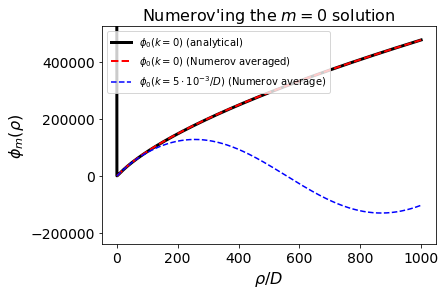

In [7]:
n = 0
D = 1
fig, ax = plt.subplots(figsize = (6, 4))

ϕ_k0_numerov = ϕ_2array(ρ_init, ρ_large, m = 0, k = 0, n = n, D = D)
norm = np.max(ϕ_k0_numerov)
ax.plot(ρ_tot, ϕ_zeroEnergy(0, ρ_tot)*norm/np.max(ϕ_zeroEnergy(0, ρ_tot[-len(ρ_tot)//10:])),
        lw = 3, color = "k", label = r"$\phi_0(k = 0)$ (analytical)")
#ax.plot(ρ_ar[:-1], ϕ(ρ_ar, 0, 0)[:-1], ls = "--", color = "g", lw = 2, label = r"$\phi_0(k = 0)$ (Numerov 2D)")
ax.plot(ρ_tot, ϕ_k0_numerov, ls = "--", color = "r", lw = 2, label = r"$\phi_0(k = 0)$ (Numerov averaged)")
#ax.plot(ρ_ar[:-1], ϕ(ρ_ar, 0, 5e-3)[:-1], lw = 0.6, color = "black", label = r"$\phi_0(k = 5\cdot 10^{-3}/D)$ (Numerov 2D)")
ax.plot(ρ_tot, ϕ_2array(ρ_init, ρ_large, m = 0, k = 5e-3, n = n, D = D), ls = "--", color = "blue", label = r"$\phi_0(k = 5\cdot 10^{-3}/D)$ (Numerov average)")

#plt.xlim(0, 10)
#plt.ylim(-0.002, 0.002)

ax.set_xlabel(r"$\rho/D$", fontsize = 16)
ax.set_ylabel(r"$\phi_m(\rho)$", fontsize = 16)
ax.tick_params(labelsize = 14)
ax.legend(loc = "upper left")
ax.set_title(r"Numerov'ing the $m = 0$ solution", fontsize = 16)
#plt.xlim(0, 1)
plt.ylim(-0.5*norm, 1.1*norm)

# Comparaison with chromium

For that you need to change the variable ’atom’ in the main file and rerun the code

In [2]:
ki = np.sqrt(k_B*300*10**(-9)/(2*E_dd))
Bmax = 72/(Bnorm*1000) # numerator in mG
Bmin = 1/(Bnorm*1000) # numerator in mG
nB = 20
omegaMin = 135*2*np.pi*1000/OmegaNorm # numerator in kHz
omegaMax = 135*2*np.pi*1000/OmegaNorm # numerator in kHz
nOmega = 1
D = np.sqrt(2/omegaMin)
ρmin_init, ρmax_init, dρ_init = 0.01, 6, 0.01
dρ_large_ratio = 0.01

ρ_parameters = [ρmin_init, ρmax_init, dρ_init, dρ_large_ratio]
BList = np.linspace(Bmin, Bmax, nB)
OmegaList = np.linspace(omegaMin, omegaMax, nOmega)

In [3]:
decayRates = runSimulationList(OmegaList, BList, ki, ρ_parameters, barrier = True)
decayRates2 = runSimulationList(OmegaList, BList, ki, ρ_parameters, barrier = False)

calculating groud state wavefunction
calculating ho wavefunction
number of jobs pending:  20 , end expected in  0  seconds
number of jobs pending:  20 , end expected in  0  seconds
number of jobs pending:  4 , end expected in  0  seconds
calculating groud state wavefunction
calculating ho wavefunction
number of jobs pending:  20 , end expected in  0  seconds
number of jobs pending:  20 , end expected in  0  seconds


This gives decent results, but about a factor of $\sim 8$ bellow what we expect if we compare to the Born approximation for Bruno's paper.

Text(0, 0.5, 'Decay rate (cm$^3$/s)')

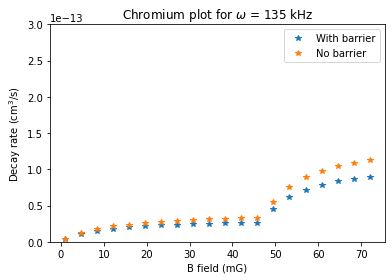

In [4]:
plt.plot(BList*Bnorm*1000, decayRates[0,:], '*', label = 'With barrier')
plt.plot(BList*Bnorm*1000, decayRates2[0,:], '*', label = 'No barrier')
plt.ylim(0, 3E-13)
plt.legend()
plt.title(r'Chromium plot for $\omega$ = ' + str(round(OmegaList[0]*OmegaNorm/(2*np.pi*10**3))) + ' kHz')
plt.xlabel('B field (mG)')
plt.ylabel(r'Decay rate (cm$^3$/s)')

I tried to substitute the simulated incoming wavefunction by a free analytical solution. I looks much better, espacially the break in the derivative is not as sharp as in the previous plot. Still a factor of $4$ away, but this is consistent with the same factor of $4$ we have with the data. I assume that $m=0$ Bessel function is not very well simulated (cf paragraph in the miscellaneous).

Text(0, 0.5, 'Decay rate (cm$^3$/s)')

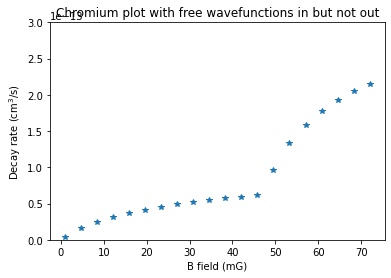

In [4]:
plt.plot(BList*Bnorm*1000, decayRates[0,:], '*')
plt.ylim(0, 3E-13)
plt.title(r'Chromium plot with free wavefunctions in but not out')
plt.xlabel('B field (mG)')
plt.ylabel(r'Decay rate (cm$^3$/s)')

However if I use both free solution for wave in and wave out it changes again the figure.

Text(0, 0.5, 'Decay rate (cm$^3$/s)')

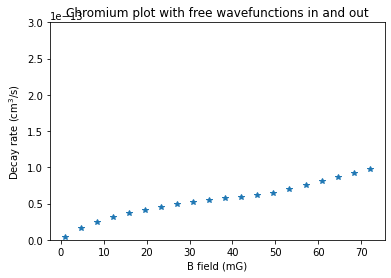

In [5]:
plt.plot(BList*Bnorm*1000, decayRates[0,:], '*')
plt.ylim(0, 3E-13)
plt.title(r'Chromium plot with free wavefunctions in and out')
plt.xlabel('B field (mG)')
plt.ylabel(r'Decay rate (cm$^3$/s)')

# Simulation

Here I performed several tests with the code. One is to compare the influence of the dipolar potential on the decay rate (first paragraph). Then I look at the 2D limit of $\beta$ (second paragraph). And then see the agreement between the analytical 2D form with the 2D limit of the simulation (third paragraph).

## $\beta_{3D}$ with and without $V_{dd}$

There are 3 two-dimensional plots, all in the parameter range $(B, \omega_z)$ that we are interested in. The first is the $\beta_{3D}$ coefficient when the wavefunctions are modified by the potential. Then the same coefficient with setting $V_{dd} = 0$, and then I plotted the ratio between the 2 to show the suppression factor.

In [2]:
ki = 0.06
Bmax = 2
Bmin = 0.02
nB = 20
omegaMin = 0.01
omegaMax = 1
nOmega = 20
ρmin_init, ρmax_init, dρ_init = 0.01, 5, 0.01
dρ_large_ratio = 0.01

BList = np.linspace(Bmin, Bmax, nB)
OmegaList = np.linspace(omegaMin, omegaMax, nOmega)
DList = np.sqrt(2/OmegaList)
z_max, dz = computeZDimensions(DList)
ρ_parameters = [ρmin_init, ρmax_init, dρ_init, dρ_large_ratio]

In [3]:
startTime = time.time()
decayRates = runSimulationList(OmegaList, BList, ki, ρ_parameters, barrier = True)
decayRatesNoVdd = runSimulationList(OmegaList, BList, ki, ρ_parameters, barrier = False)
print('it took ', str(round(time.time() - startTime, 2)), ' seconds')

calculating groud state wavefunction
calculating ho wavefunction


KeyboardInterrupt: 

In [4]:
cProfile.run("runSimulationList(OmegaList, BList, ki, ρ_parameters, barrier = True)", 'saveResults')
p = pstats.Stats('saveResults')
#p.strip_dirs().sort_stats(-1).print_stats()
#p.sort_stats(SortKey.CUMULATIVE).print_stats(10)
p.sort_stats(SortKey.TIME).print_stats(10)

calculating groud state wavefunction
calculating ho wavefunction
OmegaList, BList
[0.01       0.06210526 0.11421053 0.16631579 0.21842105 0.27052632
 0.32263158 0.37473684 0.42684211 0.47894737 0.53105263 0.58315789
 0.63526316 0.68736842 0.73947368 0.79157895 0.84368421 0.89578947
 0.94789474 1.        ] [0.02       0.12421053 0.22842105 0.33263158 0.43684211 0.54105263
 0.64526316 0.74947368 0.85368421 0.95789474 1.06210526 1.16631579
 1.27052632 1.37473684 1.47894737 1.58315789 1.68736842 1.79157895
 1.89578947 2.        ]
Omega, B
0.01 0.12421052631578948
decayRatesArray
[]
Sat Nov 27 12:28:33 2021    saveResults

         98009 function calls (97145 primitive calls) in 253.234 seconds

   Ordered by: internal time
   List reduced from 432 to 10 due to restriction <10>

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
      128  250.971    1.961  250.971    1.961 {method 'acquire' of '_thread.lock' objects}
       40    0.494    0.012    0.494    0.012 /Users

In [5]:
p.strip_dirs().sort_stats(-1).print_stats()

Sat Nov 27 12:28:33 2021    saveResults

         98009 function calls (97145 primitive calls) in 253.234 seconds

   Ordered by: standard name

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
       42    0.000    0.000    0.002    0.000 <__array_function__ internals>:2(amax)
        2    0.000    0.000    0.000    0.000 <__array_function__ internals>:2(amin)
      100    0.000    0.000    0.003    0.000 <__array_function__ internals>:2(any)
       20    0.000    0.000    0.002    0.000 <__array_function__ internals>:2(argsort)
       40    0.000    0.000    0.004    0.000 <__array_function__ internals>:2(broadcast_arrays)
      404    0.001    0.000    0.006    0.000 <__array_function__ internals>:2(common_type)
      100    0.000    0.000    0.001    0.000 <__array_function__ internals>:2(concatenate)
       80    0.000    0.000    0.001    0.000 <__array_function__ internals>:2(copyto)
       20    0.000    0.000    0.003    0.000 <__array_function__ interna

In [31]:
#saveResults(OmegaList, BList, decayRates, ρ_parameters, z_dimensions)
#OmegaList, BList, decayRates, ρ_parameters, z_dimensions = loadResults('results')
#OmegaList, BList, decayRatesNoVdd, ρ_parameters, z_dimensions = loadResults('resultsNoVdd')

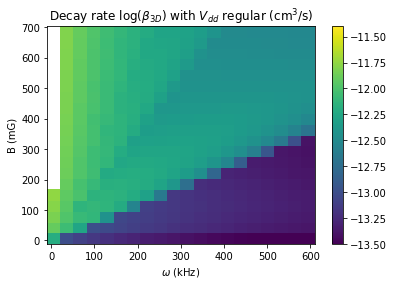

In [8]:
plt.pcolormesh(OmegaList*OmegaNorm/(2*np.pi*10**3), BList*Bnorm*1000, np.log10(np.transpose(decayRates)), shading = 'auto', vmax = -11.4, vmin = -13.5)#, vmax = -11.35, vmin = -13)
plt.xlabel("$\omega$ (kHz)")
plt.ylabel("B (mG)")
plt.title("Decay rate log$(\\beta_{3D})$ with $V_{dd}$ regular (cm$^3$/s)")
plt.colorbar()
plt.savefig('V_dd_comparaison3.jpg', dpi = 300)

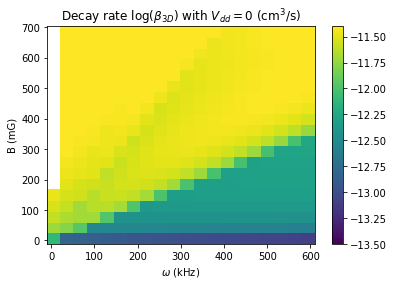

In [7]:
plt.pcolormesh(OmegaList*OmegaNorm/(2*np.pi*10**3), BList*Bnorm*1000, np.log10(np.transpose(decayRatesNoVdd)), shading = 'auto', vmax = -11.4, vmin = -13.5)
plt.xlabel("$\omega$ (kHz)")
plt.ylabel("B (mG)")
plt.title("Decay rate log$(\\beta_{3D})$ with $V_{dd} = 0$ (cm$^3$/s)")
plt.colorbar()
plt.savefig('V_dd_comparaison1.jpg', dpi = 300)

In [11]:
import matplotlib.colors as colors

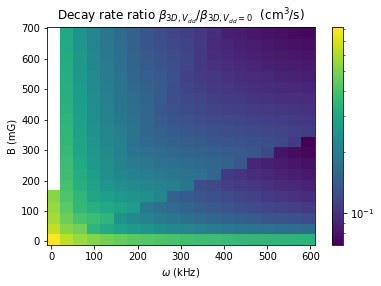

In [22]:
Z = decayRates/decayRatesNoVdd
plt.pcolormesh(OmegaList*OmegaNorm/(2*np.pi*10**3), BList*Bnorm*1000, np.transpose(Z), norm=colors.LogNorm(vmin=np.nanmin(Z), vmax=np.nanmax(Z)), shading = 'auto')#, vmax = -13.05)
plt.xlabel("$\omega$ (kHz)")
plt.ylabel("B (mG)")
plt.title("Decay rate ratio $\\beta_{3D, V_{dd}}/\\beta_{3D, V_{dd} = 0}$  (cm$^3$/s)")
plt.colorbar()
plt.savefig('V_dd_comparaison2.jpg', dpi = 300)

## Large $\omega_z$ limit and $\beta_{2D}$

Here I extend $\omega_z$ to large (and inaccessible) values to clearly show the saturation of the $\beta_{2D}$ coefficient. After a two-dimensional plot, I show horizontal cuts that saturate and vertical ones that show an inverted U shape. We will revisit those curves in the next section with the analytical approach.

In [66]:
ki = 0.06
Bmax = 2
Bmin = 0.02
nB = 20
omegaMin = 0.5
omegaMax = 15
nOmega = 20
ρmin_init, ρmax_init, dρ_init = 0.01, 5, 0.01
dρ_large_ratio = 0.01

BList = np.linspace(Bmin, Bmax, nB)
OmegaList = np.linspace(omegaMin, omegaMax, nOmega)
DList = np.sqrt(2/OmegaList)
z_max, dz = computeZDimensions(DList)
ρ_parameters = [ρmin_init, ρmax_init, dρ_init, dρ_large_ratio]

In [67]:
startTime = time.time()
decayRates = runSimulationList(OmegaList, BList, ki, ρ_parameters, barrier = True)
print('it took ', str(round(time.time() - startTime, 2)), ' seconds')

calculating groud state wavefunction
calculating ho wavefunction
number of jobs pending:  400 , end expected in  0  seconds
number of jobs pending:  400 , end expected in  0  seconds
number of jobs pending:  394 , end expected in  158  seconds
number of jobs pending:  296 , end expected in  21  seconds
number of jobs pending:  145 , end expected in  7  seconds
number of jobs pending:  113 , end expected in  5  seconds
number of jobs pending:  81 , end expected in  3  seconds
number of jobs pending:  49 , end expected in  2  seconds
number of jobs pending:  22 , end expected in  0  seconds
it took  17.87  seconds


In [68]:
cm = 100
oscillatorLength2DArray = (a_dd*cm)*np.sqrt(np.pi/2)*np.sqrt(2/np.transpose(np.tile(OmegaList, (len(BList),1))))
decayRates2D = decayRates/oscillatorLength2DArray

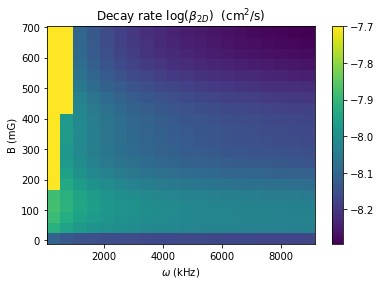

In [69]:
plt.pcolormesh(OmegaList*OmegaNorm/(2*np.pi*10**3), BList*Bnorm*1000, np.log10(np.transpose(decayRates2D)), shading = 'auto', vmax = -7.7)
plt.xlabel("$\omega$ (kHz)")
plt.ylabel("B (mG)")
plt.title("Decay rate log$(\\beta_{2D})$  (cm$^2$/s)")
plt.colorbar()
plt.savefig('2D_limit_color.jpg', dpi = 300)

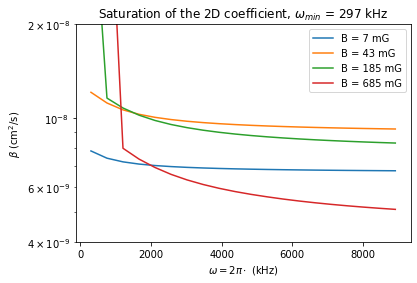

In [71]:
for i in [0, 1, 5, 19]:
    plt.semilogy(OmegaList*OmegaNorm/(2*np.pi*10**3), decayRates2D[:,i], label = 'B = '+str(round(BList[i]*Bnorm*1000)) + ' mG')
plt.ylabel(r'$\beta$ (cm$^2/$s)')
plt.xlabel(r'$\omega = 2\pi\cdot$ (kHz)')
plt.title(r'Saturation of the 2D coefficient, $\omega_{min}$ = ' + str(round(OmegaList[0]*OmegaNorm/(2*np.pi*10**3))) + ' kHz')
plt.legend()
plt.ylim(4e-9, 2e-8)
plt.savefig('2D_limit_omega.jpg', dpi = 300)

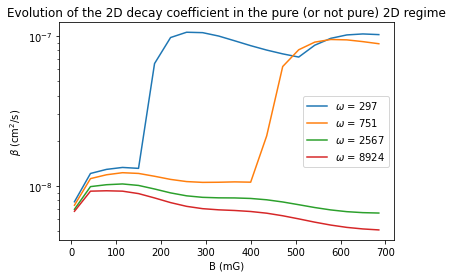

In [72]:
for i in [0, 1, 5, 19]:
    plt.semilogy(BList*Bnorm*1000, decayRates2D[i,:], label = r'$\omega$ = '+str(round(OmegaList[i]*OmegaNorm/(2*np.pi*10**3))))
plt.ylabel(r'$\beta$ (cm$^2/$s)')
plt.xlabel(r'B (mG)')
plt.title('Evolution of the 2D decay coefficient in the pure (or not pure) 2D regime')
plt.legend()
plt.savefig('2D_limit_bfield.jpg', dpi = 300)

## Analytical patching for $k\neq 0$

After describing how the patching is done, I look at the patching of the $m=0$ state, and then observe that for the $m\neq 0$ state, the difference between the simulated curve and the free analytical solution is actually quite significant. Therefore I also patch the outcoming wave.

### Theory

#### Definition of the free wavefunction

The free shifted wavefunction is defined $\forall m$ as:
\begin{equation}
\phi_{free, \text{shifted}, m}(\rho)=\sqrt{\frac{\pi k\rho}{L}}\left(\alpha J_m(k\rho) + \beta Y_m(k\rho)\right)
\end{equation}
The normalization imposes $\alpha^2+\beta^2 = 1$ and I use Ticknor's notation to set $\alpha = \cos\delta$ and $\beta = -\sin\delta$. So $\tan\delta = -\frac{\alpha}{\beta}$ and:
\begin{equation}
\phi_{free, \text{shifted}, m}(\rho)=\alpha\sqrt{\frac{\pi k\rho}{L}}\left(J_m(k\rho) - \tan\delta Y_m(k\rho)\right)
\end{equation}

We want to match this wavefunction with the $k=0$ Ticknor's solution $f(\rho) = \gamma\sqrt{\rho}K_{2m}(\sqrt{8/\rho})$. For that we need to adjust $\alpha$, $\delta$ and $\gamma$ such that the amplitude and the derivative of the two functions are the same at a particular point $\rho_0$.

#### Equation for $\delta$

An easy solution for $\delta$ consist in eliminating $\alpha$ and $\gamma$ by equating the ratios $\phi'/\phi = f'/f$. The derivative of the Bessel functions are:
\begin{equation}
\frac{dJ_m(k\rho)}{d\rho}=k\left(\frac{m}{k\rho}J_m(k\rho)-J_{m+1}(k\rho)\right) \text{   and   } \frac{dY_m(k\rho)}{d\rho}=k\left(\frac{m}{k\rho}Y_m(k\rho)-Y_{m+1}(k\rho)\right)
\end{equation}

So the derivative is:
\begin{equation}
\frac{d\phi}{d\rho} = \frac{\alpha}{2\rho}\sqrt{\frac{\pi k}{L}}\left(J_{m}(k\rho)-\tan\delta Y_m(k\rho)\right) + \alpha\sqrt{\frac{\pi k\rho}{L}}k\left(\frac{m}{k\rho}J_m(k\rho)-J_{m+1}(k\rho) - \tan\delta\left(\frac{m}{k\rho}Y_m(k\rho)-Y_{m+1}(k\rho)\right)\right)
\end{equation}

It gives:
\begin{equation}
\frac{\phi'(\rho)}{\phi(\rho)} = \frac{1}{2\rho} + k\frac{\frac{m}{k\rho}J_m(k\rho)-J_{m+1}(k\rho) - \tan\delta\left(\frac{m}{k\rho}Y_m(k\rho)-Y_{m+1}(k\rho)\right)}{J_{m}(k\rho)-\tan\delta Y_m(k\rho)}= \frac{f'(\rho)}{f(\rho)}
\end{equation}

Setting the parameter $r = \frac{1}{k}\left(\frac{f'(\rho_0)}{f(\rho_0)}-\frac{1}{2\rho_0}\right)$ we get that:
\begin{equation}
\boxed{\tan\delta_m = \frac{\left(\frac{m}{k\rho_0} - r\right)J_m(k\rho_0)-J_{m+1}(k\rho_0)}{\left(\frac{m}{k\rho_0}-r\right)Y_m(k\rho_0)-Y_{m+1}(k\rho_0)}}
\end{equation}

#### Position of the matching point

The positon of $\rho_0$ is $k$-dependant and is set by equating:
\begin{equation}
V_{cent} + V_{dd} \simeq \frac{m^2-1/4}{\rho^2} + \frac{2}{\rho^3} = k^2
\end{equation}
Effectively I take:
\begin{equation}
\rho_0 = \kappa 2\pi\max\left(\frac{\sqrt{m^2-1/4}}{k}; \left(\frac{2}{k^2}\right)^{1/3}\right)
\end{equation}
With $\kappa$ being a coefficient that I adjusted to 0.15 for good mathching. $\alpha$ and $\beta$ are determined from $\delta$, and $\gamma$ by simply matching the amplitude of the 2 wavefunction at $\rho_0$.

### Functions definition

We want to compute $\beta_{2D} = \frac{4}{\tilde{k}_i \tilde{k}_f}\frac{E_{dd}}{\hbar}a_{dd}^2\left|\tilde{L}\int_0^{\infty}d\tilde{\rho}\tilde{\phi}_f(\tilde{\rho})\frac{2}{\rho^3}\tilde{\phi}_i(\tilde{\rho})\right|^2$. In the code $\tilde{\phi}_i(\tilde{\rho}) = $ `phiArrayAnalytic` (this is presented in the first paragraph) and $\tilde{\phi}_f(\tilde{\rho})$ can be either the free solution $\sqrt{\frac{\pi\tilde{k_f}\tilde{\rho}}{\tilde{L}}}J_{2}(\tilde{k}_{f}\tilde{\rho})$ (second paragraph) or the $m=2$ outcoming wave taking into account the barrier (this is the third paragraph). 

### Incoming wavefunction $m=0$

Note that for matching the simulation with the analytical 2D result, it is smart to start the simulation only around $\rho\sim D$, otherwise the analytical result will greatly differ from the simulated one which will experience the $z$ dependance of the potential.

In blue I show the result of the simulation, in orange is the analytical function from Ticknor, in green is the free solution that matches Ticknor's wavefunction at $\rho_0$, and in red is the combined solution with Ticknor's function for $\rho < \rho_0$ and the free solution beyond.

In [18]:
m = 0

k = 0.08
D = np.sqrt(2/10000)

ρmin_init, ρmax_init, dρ_init = 2*D, 10, 0.01
ρmax_large, dρ_large = 10*2*np.pi/k, 0.01*2*np.pi/k
ρ_dimension = [[ρmin_init, ρmax_init, dρ_init], [ρmax_large, dρ_large]]
ρ_init, ρ_large, ρ_tot = createRhoArrays(ρ_dimension)

Delta = delta(k, ρmax_large, m)
Gamma = gamma(k, ρmax_large, m)
phiSimulation = ϕ_2array(ρ_init, ρ_large, m = m, k = k, n = 0, D = D, norm = True)
phiAnalyticPure2D = Gamma*phiZero(ρ_tot, m)
phiAnalyticFarDistance = analyticFarDistance(ρ_tot, k, m)
phiAnalytic = phiArrayAnalytic(ρ_tot, k, m)

Text(0.5, 0, '$\\tilde{\\rho}$')

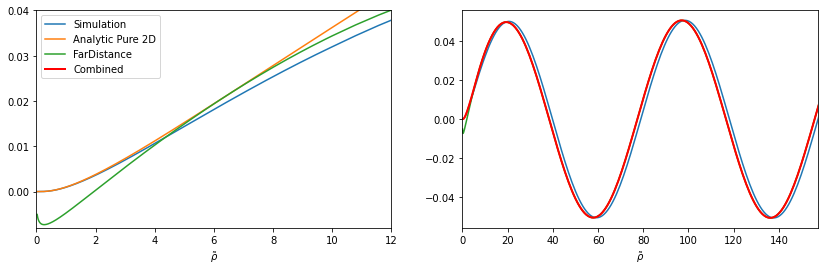

In [22]:
fig, ax = plt.subplots(1, 2, figsize = (14, 4))
ax1, ax2 = ax
ax1.plot(ρ_tot, phiSimulation, label = 'Simulation')
ax1.plot(ρ_tot, phiAnalyticPure2D, label = 'Analytic Pure 2D')
ax1.plot(ρ_tot, phiAnalyticFarDistance, label = 'FarDistance')
#ax1.plot(ρ_tot, phiAnalytic, color = 'red', lw = 2, label = 'Combined')
ax1.plot([np.nan], [np.nan], color = 'red', lw = 2, label = 'Combined')
ax1.set_xlabel(r'$\tilde{\rho}$')
ax1.set_xlim(0, 12)
#ax1.set_ylim(-1.1*np.sqrt(2/ρmax_large), 1.1*np.sqrt(2/ρmax_large))
ax1.set_ylim(-0.1*k, 0.5*k)
ax1.legend()
ax2.plot(ρ_tot, phiSimulation, label = 'Simulation')
ax2.plot(ρ_tot, phiAnalytic, label = 'Analytic')
ax2.plot(ρ_tot, phiAnalyticFarDistance, label = 'FarDistance')
ax2.plot(ρ_tot, phiAnalytic, color = 'red', lw = 2, label = 'Combined')
ax2.set_xlim(0, 0.2*ρmax_large)
ax2.set_ylim(-1.1*np.sqrt(2/ρmax_large), 1.1*np.sqrt(2/ρmax_large))
ax2.set_xlabel(r'$\tilde{\rho}$')

One can check the ratio between the `phiSimulation` and `phiAnalytic`. It is wrong near $\rho\sim D$ but quickly approaches 1 after. The resulting offset is due to the matching position.

<ipython-input-23-2494f2b6168f>:3: RuntimeWarning: divide by zero encountered in true_divide
  ax1.plot(ρ_tot, phiAnalytic/phiSimulation, label = 'ratio')
<ipython-input-23-2494f2b6168f>:4: RuntimeWarning: divide by zero encountered in true_divide
  ax2.plot(ρ_tot, phiAnalytic/phiSimulation, label = 'ratio')


(-0.5, 2.0)

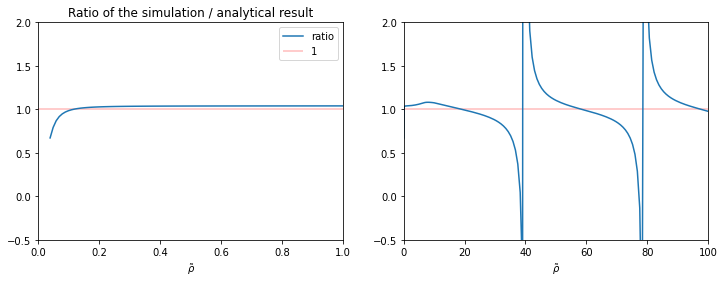

In [23]:
fig, ax = plt.subplots(1, 2, figsize = (12, 4))
ax1, ax2 = ax
ax1.plot(ρ_tot, phiAnalytic/phiSimulation, label = 'ratio')
ax2.plot(ρ_tot, phiAnalytic/phiSimulation, label = 'ratio')
ax1.set_xlabel(r'$\tilde{\rho}$')
ax2.set_xlabel(r'$\tilde{\rho}$')
ax1.set_title('Ratio of the simulation / analytical result')
ax1.hlines(1, 0, ρ_tot[-1], color = 'red', lw = 0.4, label = '1')
ax2.hlines(1, 0, ρ_tot[-1], color = 'red', lw = 0.4)
ax1.legend()
ax1.set_xlim(0, 1)
ax2.set_xlim(0, 100)
ax1.set_ylim(-0.5, 2)
ax2.set_ylim(-0.5, 2)

### Outgoing wavefunction $m\neq 0$ without $V_{dd}$

Here is compare the simulated wavefunction with the free solution (there is no patching in that case).

In [30]:
m = 2

k = 1
D = np.sqrt(2/10000)

ρmin_init, ρmax_init, dρ_init = 2*D, 10, 0.01
ρmax_large, dρ_large = 10*2*np.pi/k, 0.01*2*np.pi/k
ρ_dimension = [[ρmin_init, ρmax_init, dρ_init], [ρmax_large, dρ_large]]
ρ_init, ρ_large, ρ_tot = createRhoArrays(ρ_dimension)

Delta = delta(k, ρmax_large, m)
Gamma = gamma(k, ρmax_large, m)
phiSimulation = ϕ_2array(ρ_init, ρ_large, m = m, k = k, n = 0, D = D, norm = True)
phiAnalyticFree = analyticFreeSolution(ρ_tot, k, m)

(-0.19625365277680482, 0.19625365277680482)

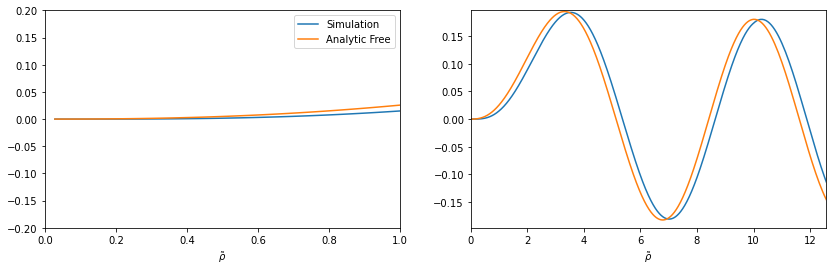

In [31]:
fig, ax = plt.subplots(1, 2, figsize = (14, 4))
ax1, ax2 = ax
ax1.plot(ρ_tot, phiSimulation, label = 'Simulation')
ax1.plot(ρ_tot, phiAnalyticFree, label = 'Analytic Free')
ax1.set_xlabel(r'$\tilde{\rho}$')
ax1.set_xlim(0, 1)
#ax1.set_ylim(-1.1*np.sqrt(2/ρmax_large), 1.1*np.sqrt(2/ρmax_large))
ax1.set_ylim(-0.2*k, 0.2*k)
ax1.legend()
ax2.plot(ρ_tot, phiSimulation, label = 'Simulation')
ax2.plot(ρ_tot, phiAnalyticFree, label = 'Analytic Free')
ax2.set_xlabel(r'$\tilde{\rho}$')
ax2.set_xlim(0, 0.2*ρmax_large)
ax2.set_ylim(-1.1*np.sqrt(2/ρmax_large), 1.1*np.sqrt(2/ρmax_large))

Here the ratio is not great, which shows that the potential has to be taken into account even for the outgoing wave:

<ipython-input-27-3aab1d10ccae>:3: RuntimeWarning: divide by zero encountered in true_divide
  ax1.plot(ρ_tot, phiAnalyticFree/phiSimulation, label = 'ratio')
<ipython-input-27-3aab1d10ccae>:4: RuntimeWarning: divide by zero encountered in true_divide
  ax2.plot(ρ_tot, phiAnalyticFree/phiSimulation, label = 'ratio')


(-0.5, 4.0)

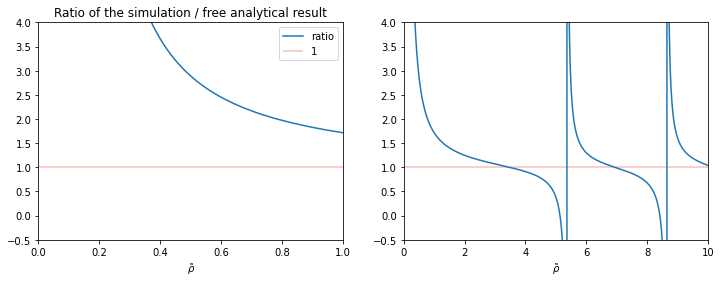

In [27]:
fig, ax = plt.subplots(1, 2, figsize = (12, 4))
ax1, ax2 = ax
ax1.plot(ρ_tot, phiAnalyticFree/phiSimulation, label = 'ratio')
ax2.plot(ρ_tot, phiAnalyticFree/phiSimulation, label = 'ratio')
ax1.set_xlabel(r'$\tilde{\rho}$')
ax2.set_xlabel(r'$\tilde{\rho}$')
ax1.set_title('Ratio of the simulation / free analytical result')
ax1.hlines(1, 0, ρ_tot[-1], color = 'red', lw = 0.4, label = '1')
ax2.hlines(1, 0, ρ_tot[-1], color = 'red', lw = 0.4)
ax1.legend()
ax1.set_xlim(0, 1)
ax2.set_xlim(0, 10)
ax1.set_ylim(-0.5, 4)
ax2.set_ylim(-0.5, 4)

### Outgoing wavefunction $m\neq 0$ with $V_{dd}$

To mitigate the issue I apply the same procedure of $m=0$ to $m=2$.

In [32]:
m = 2

k = 1
D = np.sqrt(2/10000)

ρmin_init, ρmax_init, dρ_init = 2*D, 10, 0.001
ρmax_large, dρ_large = 10*2*np.pi/k, 0.01*2*np.pi/k
ρ_dimension = [[ρmin_init, ρmax_init, dρ_init], [ρmax_large, dρ_large]]
ρ_init, ρ_large, ρ_tot = createRhoArrays(ρ_dimension)

Delta = delta(k, ρmax_large, m)
Gamma = gamma(k, ρmax_large, m)
phiSimulation = ϕ_2array(ρ_init, ρ_large, m = m, k = k, n = 0, D = D, norm = True)
phiAnalytic = phiArrayAnalytic(ρ_tot, k, m)

(-0.19625365277680482, 0.19625365277680482)

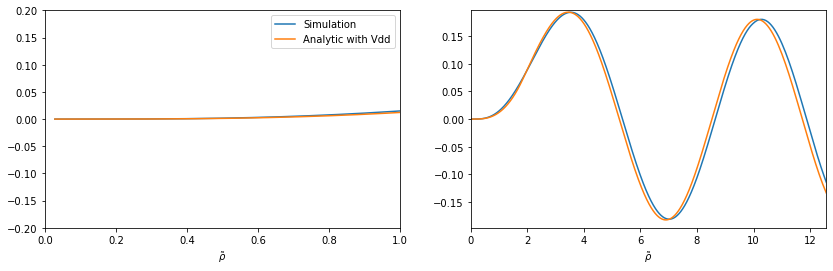

In [33]:
fig, ax = plt.subplots(1, 2, figsize = (14, 4))
ax1, ax2 = ax
ax1.plot(ρ_tot, phiSimulation, label = 'Simulation')
ax1.plot(ρ_tot, phiAnalytic, label = 'Analytic with Vdd')
ax1.set_xlabel(r'$\tilde{\rho}$')
ax1.set_xlim(0, 1)
#ax1.set_ylim(-1.1*np.sqrt(2/ρmax_large), 1.1*np.sqrt(2/ρmax_large))
ax1.set_ylim(-0.2*k, 0.2*k)
ax1.legend()
ax2.plot(ρ_tot, phiSimulation, label = 'Simulation')
ax2.plot(ρ_tot, phiAnalytic, label = 'Analytic with Vdd')
ax2.set_xlabel(r'$\tilde{\rho}$')
ax2.set_xlim(0, 0.2*ρmax_large)
ax2.set_ylim(-1.1*np.sqrt(2/ρmax_large), 1.1*np.sqrt(2/ρmax_large))

<ipython-input-34-5edaf2363723>:3: RuntimeWarning: divide by zero encountered in true_divide
  ax1.plot(ρ_tot, phiAnalytic/phiSimulation, label = 'ratio')
<ipython-input-34-5edaf2363723>:4: RuntimeWarning: divide by zero encountered in true_divide
  ax2.plot(ρ_tot, phiAnalytic/phiSimulation, label = 'ratio')


(-0.5, 2.0)

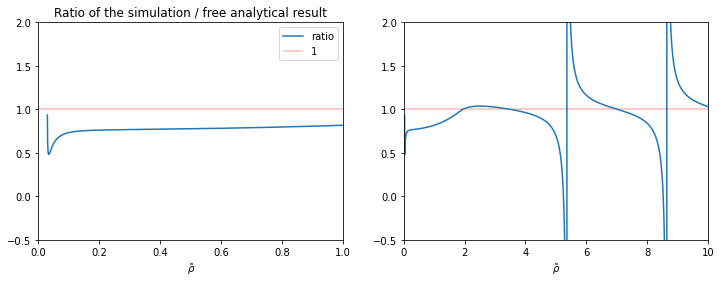

In [34]:
fig, ax = plt.subplots(1, 2, figsize = (12, 4))
ax1, ax2 = ax
ax1.plot(ρ_tot, phiAnalytic/phiSimulation, label = 'ratio')
ax2.plot(ρ_tot, phiAnalytic/phiSimulation, label = 'ratio')
ax1.set_xlabel(r'$\tilde{\rho}$')
ax2.set_xlabel(r'$\tilde{\rho}$')
ax1.set_title('Ratio of the simulation / free analytical result')
ax1.hlines(1, 0, ρ_tot[-1], color = 'red', lw = 0.4, label = '1')
ax2.hlines(1, 0, ρ_tot[-1], color = 'red', lw = 0.4)
ax1.legend()
ax1.set_xlim(0, 1)
ax2.set_xlim(0, 10)
ax1.set_ylim(-0.5, 2)
ax2.set_ylim(-0.5, 2)

This is a much better ratio. Interestigly there seem to be a saturation for small $\rho$. This is purely due to the matching position, which should be carefully tuned.

## $\beta_{2D}$ with and without $V_{dd}$

Still with purely analytical solutions I explore the behaviour of $\beta_{2D}$ for different magnetic fields, and comparing with the free analytical solution and with the patched one integrating $V_{dd}$ on the outcoming channel (the incoming channel is patched anyway). They seem to have a constant offset in the $B$ range that we typically use, but they seem to converge at higher magnetic field, as expected since the patching is done at shorter and shorter range as $k_f$ goes to infinity. First I look at a narrow range, and then expand it to several tens of Gauss. (I'm not sure that the crossing that we see is real, I would need to look in details at the patching there to see if things make sense).

In [39]:
BList2D = np.linspace(0.01, 2, 40)
ki = 0.08
betaList2D = np.array([betaCoefficientPure2D(ki, B) for B in BList2D])
betaList2DFree = np.array([betaCoefficientPure2D(ki, B, free = True) for B in BList2D])

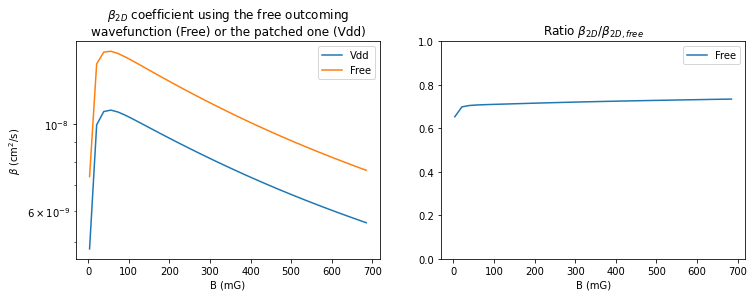

In [40]:
fig, ax = plt.subplots(1, 2, figsize = (12, 4))
ax1, ax2 = ax
ax1.semilogy(BList2D*Bnorm*1000, betaList2D, label = 'Vdd')
ax1.semilogy(BList2D*Bnorm*1000, betaList2DFree, label = 'Free')
ax1.set_ylabel(r'$\beta$ (cm$^2/$s)')
ax1.set_xlabel(r'B (mG)')
ax1.legend()
ax1.set_title(r'$\beta_{2D}$ coefficient using the free outcoming' '\n' 'wavefunction (Free) or the patched one (Vdd)')
ax2.plot(BList2D*Bnorm*1000, betaList2D/betaList2DFree, label = 'Free')
ax2.set_ylim(0,1)
ax2.legend()
ax2.set_xlabel(r'B (mG)')
ax2.set_title(r'Ratio $\beta_{2D}/\beta_{2D, free}$')
plt.show()

In [37]:
BList2D = np.linspace(0.01, 10, 40)
ki = 0.08
betaList2D = np.array([betaCoefficientPure2D(ki, B) for B in BList2D])
betaList2DFree = np.array([betaCoefficientPure2D(ki, B, free = True) for B in BList2D])

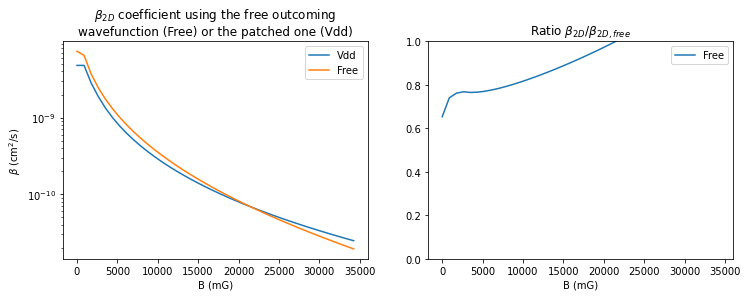

In [38]:
fig, ax = plt.subplots(1, 2, figsize = (12, 4))
ax1, ax2 = ax
ax1.semilogy(BList2D*Bnorm*1000, betaList2D, label = 'Vdd')
ax1.semilogy(BList2D*Bnorm*1000, betaList2DFree, label = 'Free')
ax1.set_ylabel(r'$\beta$ (cm$^2/$s)')
ax1.set_xlabel(r'B (mG)')
ax1.legend()
ax1.set_title(r'$\beta_{2D}$ coefficient using the free outcoming' '\n' 'wavefunction (Free) or the patched one (Vdd)')
ax2.plot(BList2D*Bnorm*1000, betaList2D/betaList2DFree, label = 'Free')
ax2.set_ylim(0,1)
ax2.legend()
ax2.set_xlabel(r'B (mG)')
ax2.set_title(r'Ratio $\beta_{2D}/\beta_{2D, free}$')
plt.show()

## $\beta_{2D}$ comparaison with the simulation

This basically combines the previous paragraphs and shows that the limit of the simulation when $D\rightarrow 0$ is the analytical solution that we derived.

### 2D saturation

In [2]:
ki = 0.06
omegaMin = 0.01
omegaMax = 20
nOmega = 150
ρmin_init, ρmax_init, dρ_init = 0.01, 5, 0.01
dρ_large_ratio = 0.01

BList = np.array([0.1, 0.5, 1, 2])
OmegaList = np.linspace(omegaMin, omegaMax, nOmega)
DList = np.sqrt(2/OmegaList)
z_max, dz = computeZDimensions(DList)
ρ_parameters = [ρmin_init, ρmax_init, dρ_init, dρ_large_ratio]

startTime = time.time()
decayRates = runSimulationList(OmegaList, BList, ki, ρ_parameters, barrier = True)
print('it took ', str(round(time.time() - startTime, 2)), ' seconds')

cm = 100
oscillatorLength2DArray = (a_dd*cm)*np.sqrt(np.pi/2)*np.sqrt(2/np.transpose(np.tile(OmegaList, (len(BList),1))))
decayRates2D = decayRates/oscillatorLength2DArray

calculating groud state wavefunction
calculating ho wavefunction
number of jobs pending:  600 , end expected in  0  seconds
number of jobs pending:  600 , end expected in  0  seconds
number of jobs pending:  596 , end expected in  358  seconds
number of jobs pending:  545 , end expected in  73  seconds
number of jobs pending:  445 , end expected in  35  seconds
number of jobs pending:  335 , end expected in  22  seconds
number of jobs pending:  210 , end expected in  12  seconds
number of jobs pending:  183 , end expected in  10  seconds
number of jobs pending:  158 , end expected in  8  seconds
number of jobs pending:  134 , end expected in  7  seconds
number of jobs pending:  106 , end expected in  5  seconds
number of jobs pending:  79 , end expected in  4  seconds
number of jobs pending:  54 , end expected in  2  seconds
number of jobs pending:  30 , end expected in  1  seconds
number of jobs pending:  6 , end expected in  0  seconds
it took  32.69  seconds


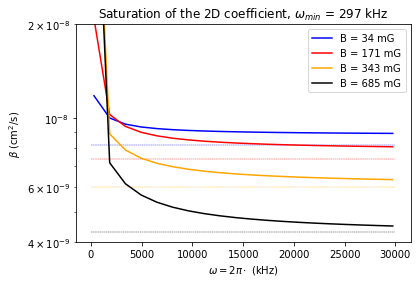

In [93]:
colors = ['blue', 'red', 'orange', 'black', 'pink']
for i, B in enumerate(BList):
    plt.semilogy(OmegaList*OmegaNorm/(2*np.pi*10**3), decayRates2D[:,i], label = f'B = {round(B*Bnorm*1000)} mG', color = colors[i])
    plt.hlines(betaCoefficientPure2D(ki, B), 0, 30000, linestyles = 'dashed', color = colors[i], lw = 0.4)
plt.ylabel(r'$\beta$ (cm$^2/$s)')
plt.xlabel(r'$\omega = 2\pi\cdot$ (kHz)')
plt.title(r'Saturation of the 2D coefficient, $\omega_{min}$ = ' + str(round(OmegaList[0]*OmegaNorm/(2*np.pi*10**3))) + ' kHz')
plt.legend()
plt.ylim(4e-9, 2e-8)
plt.savefig('2D_limit_omega.jpg', dpi = 300)

This show the simulation is solid lines, converging to their 2D limit in dashed.

### Magnetic field dependence

In [64]:
ki = 0.06
Bmax = 2
Bmin = 0.02
nB = 40
ρmin_init, ρmax_init, dρ_init = 0.03, 3, 0.03
dρ_large_ratio = 0.03

ρ_parameters = [ρmin_init, ρmax_init, dρ_init, dρ_large_ratio]
BList = np.linspace(Bmin, Bmax, nB)
OmegaList = np.array([0.2, 0.8, 5, 10, 50])

betaList2D = np.array([betaCoefficientPure2D(ki, B) for B in BList])
betaList2DFree = np.array([betaCoefficientPure2D(ki, B, free = True) for B in BList])

startTime = time.time()
decayRates = runSimulationList(OmegaList, BList, ki, ρ_parameters, barrier = True)
print('it took ', str(round(time.time() - startTime, 2)), ' seconds')

cm = 100
oscillatorLength2DArray = (a_dd*cm)*np.sqrt(np.pi/2)*np.sqrt(2/np.transpose(np.tile(OmegaList, (len(BList),1))))
decayRates2D = decayRates/oscillatorLength2DArray

calculating groud state wavefunction
calculating ho wavefunction
number of jobs pending:  200 , end expected in  0  seconds
number of jobs pending:  200 , end expected in  0  seconds
number of jobs pending:  184 , end expected in  27  seconds
it took  7.71  seconds


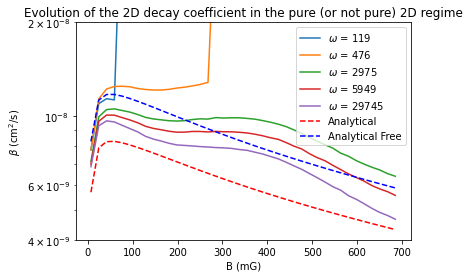

In [65]:
for i, omega in enumerate(OmegaList):
    plt.semilogy(BList*Bnorm*1000, decayRates2D[i,:], label = r'$\omega$ = '+str(round(omega*OmegaNorm/(2*np.pi*10**3))))
plt.semilogy(BList*Bnorm*1000, betaList2D, label = 'Analytical', ls = '--', color = 'red')
plt.semilogy(BList*Bnorm*1000, betaList2DFree, label = 'Analytical Free', ls = '--', color = 'blue')
plt.ylim(4E-9, 2E-8)
plt.ylabel(r'$\beta$ (cm$^2/$s)')
plt.xlabel(r'B (mG)')
plt.title('Evolution of the 2D decay coefficient in the pure (or not pure) 2D regime')
plt.legend()
#plt.savefig('2D_limit_bfield.jpg', dpi = 300)

This plot shows several simulated rates in solid lines for various $\omega_z$. The label is $\omega_z$ in kHz. The orange one is the maximum trap frequency we were able to reach. In dashed are the analytical predictions considering the outcoming wavefunction free (blue) or patched with Ticknor's solution (red). The higher $\omega_z$ is, the closer we get to the analytical result.

# Comparaison with experimental data

I simply plot the data that we took (green circles), and compare that to the simulation with the dipolar barrier modifying the wavefunction (blue) and without (orange). Since we are off by a factor of 4 I also provide the plots with that fudge factor.

## Data processing

In [2]:
BListExp = np.sort(df['Bfield'].unique())
OmegaListExp = np.sort(df['omega'].unique())
decayRatesExp = []
iFound = 0
for Omega in OmegaListExp:
    decayRatesExpRunning = []
    for B in BListExp:
        if not df[(df['Bfield'] == B) & (df['omega'] == Omega)].empty:
            iFound += 1            
            decayRatesExpRunning += [df[(df['Bfield'] == B) & (df['omega'] == Omega)]['beta'].iloc[0]]
        else:
            decayRatesExpRunning += [np.nan]
    decayRatesExp += [decayRatesExpRunning]
decayRatesExp = np.array(decayRatesExp)

In [3]:
# detection of the omegaRuns and Bfield runs

B_omegaScan = []
for B in BListExp:
    if len(df[df['Bfield'] == B]) > 4:
        B_omegaScan += [B]
B_omegaScan = np.array(B_omegaScan)
Omega_BScans = []
for Omega in OmegaListExp:
    if len(df[df['omega'] == Omega]) > 4:
        Omega_BScans += [Omega]
Omega_BScans = np.array(Omega_BScans)

## Simulation for matched parameters

In [4]:
aScattering = 0.01
ki = 0.08
Bmax = BListExp[-1]/Bnorm
Bmin = BListExp[0]/Bnorm
nB = 20
omegaMin = 0.02
omegaMax = 1
nOmega = 20
ρmin_init, ρmax_init, dρ_init = aScattering, 8, 0.002
dρ_large_ratio = 0.002

ρ_parameters = [ρmin_init, ρmax_init, dρ_init, dρ_large_ratio]
BList = np.linspace(Bmin, Bmax, nB)
OmegaList = np.linspace(omegaMin, omegaMax, nOmega)

decayRates_omegaScan = []
decayRates_BScan = []
decayRates_omegaScan_noVdd = []
decayRates_BScan_noVdd = []

for i, B in enumerate(B_omegaScan):
    BListCurrent = [B/Bnorm]
    decayRates_omegaScan += [runSimulationList(OmegaList, BListCurrent, ki, ρ_parameters)[:, 0]]
    decayRates_omegaScan_noVdd += [runSimulationList(OmegaList, BListCurrent, ki, ρ_parameters, barrier = False)[:, 0]]
    
for i, Omega in enumerate(Omega_BScans):
    OmegaAdim = Omega/OmegaNorm
    if Omega == 0:
        OmegaAdim = 0.001
    OmegaListCurrent = [OmegaAdim]
    decayRates_BScan += [runSimulationList(OmegaListCurrent, BList, ki, ρ_parameters)[0, :]]
    decayRates_BScan_noVdd += [runSimulationList(OmegaListCurrent, BList, ki, ρ_parameters, barrier = False)[0, :]]

calculating groud state wavefunction
calculating ho wavefunction
number of jobs pending:  20 , end expected in  0  seconds
number of jobs pending:  20 , end expected in  0  seconds
number of jobs pending:  19 , end expected in  46  seconds
number of jobs pending:  19 , end expected in  141  seconds
number of jobs pending:  19 , end expected in  236  seconds
number of jobs pending:  19 , end expected in  331  seconds
number of jobs pending:  19 , end expected in  426  seconds
number of jobs pending:  19 , end expected in  521  seconds
number of jobs pending:  18 , end expected in  292  seconds
number of jobs pending:  17 , end expected in  212  seconds
number of jobs pending:  16 , end expected in  169  seconds
number of jobs pending:  15 , end expected in  142  seconds
number of jobs pending:  15 , end expected in  157  seconds
number of jobs pending:  14 , end expected in  134  seconds
number of jobs pending:  11 , end expected in  76  seconds
number of jobs pending:  10 , end expecte

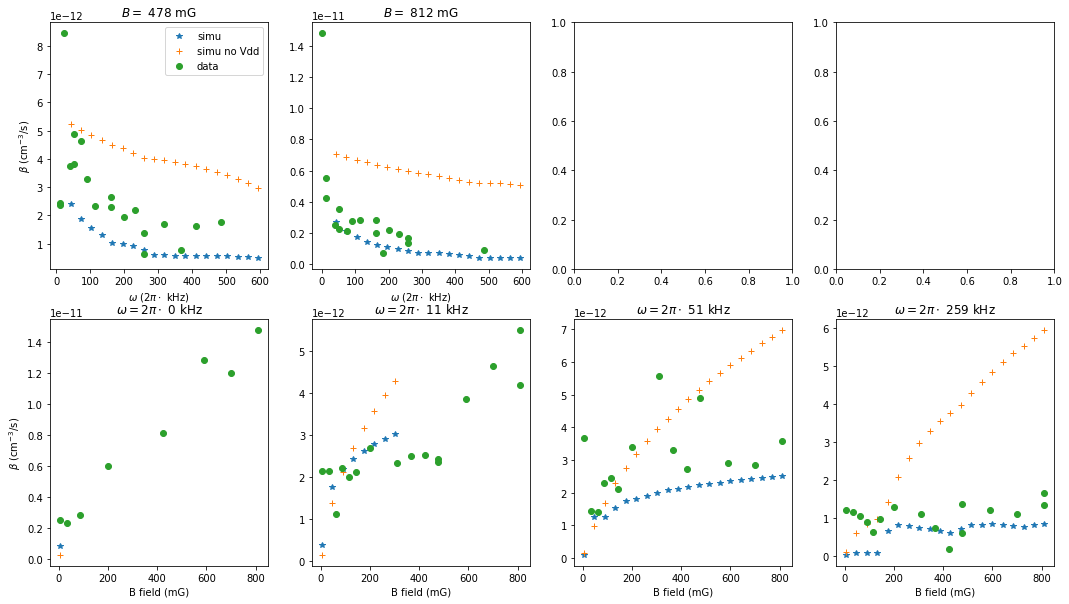

In [5]:
fig, ax = plt.subplots(2, 4, figsize = (18, 10))
axOmegaScan, axBScans = ax
axOmegaScan1, axOmegaScan2, axOmegaScan3, axOmegaScan4 = axOmegaScan
axBScans1, axBScans2, axBScans3, axBScans4 = axBScans

for i, B in enumerate(B_omegaScan):
    BListCurrent = [B/Bnorm]
    decayRates = decayRates_omegaScan[i]
    decayRates_noVdd = decayRates_omegaScan_noVdd[i]
    axOmegaScan[i].plot(OmegaList*OmegaNorm/(2*np.pi*1000), decayRates, '*', label = 'simu')
    axOmegaScan[i].plot(OmegaList*OmegaNorm/(2*np.pi*1000), decayRates_noVdd, '+', label = 'simu no Vdd')
    df_run = df[df['Bfield'] == B]
    axOmegaScan[i].plot(df_run['omega']/(2*np.pi*1000), df_run['beta'], 'o', label = 'data')
    axOmegaScan[i].set_title(r'$B = $ ' + str(round(B*1000)) + ' mG')
    axOmegaScan[i].set_xlabel(r'$\omega$ ($2\pi\cdot$ kHz)')
axOmegaScan[0].set_ylabel(r'$\beta$ (cm$^{-3}/$s)')
axOmegaScan[0].legend()

for i, Omega in enumerate(Omega_BScans):
    OmegaAdim = Omega/OmegaNorm
    if Omega == 0:
        OmegaAdim = 0.001
    OmegaListCurrent = [OmegaAdim]
    decayRates = decayRates_BScan[i]
    decayRates_noVdd = decayRates_BScan_noVdd[i]
    axBScans[i].plot(BList*Bnorm*1000, decayRates, '*', label = 'simu')
    axBScans[i].plot(BList*Bnorm*1000, decayRates_noVdd, '+', label = 'simu no Vdd')
    df_run = df[df['omega'] == Omega]
    axBScans[i].plot(df_run['Bfield']*1000, df_run['beta'], 'o', label = 'data')
    axBScans[i].set_title(r'$\omega = 2\pi\cdot$ ' + str(round(Omega/(2*np.pi*1000))) + ' kHz')
    axBScans[i].set_xlabel('B field (mG)')
axBScans[0].set_ylabel(r'$\beta$ (cm$^{-3}/$s)')
plt.savefig('allFitsAndSim_noVdd.jpg', dpi = 300)

## Fudge factor

Data isn't very well explained, I can introduce a fudge factor to compensate

In [37]:
fudge = 2

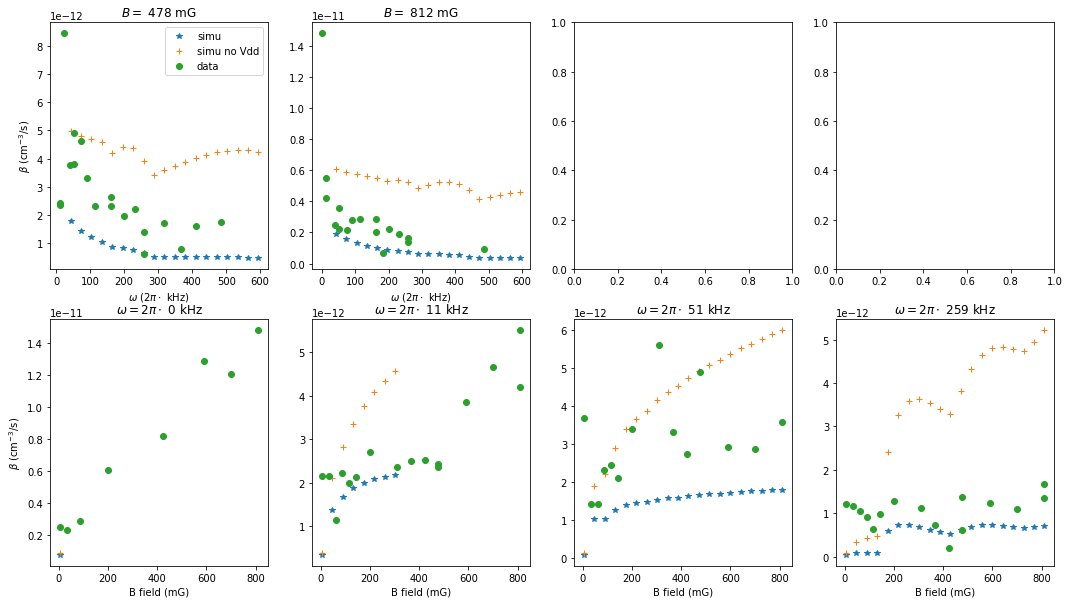

In [38]:
fig, ax = plt.subplots(2, 4, figsize = (18, 10))
axOmegaScan, axBScans = ax
axOmegaScan1, axOmegaScan2, axOmegaScan3, axOmegaScan4 = axOmegaScan
axBScans1, axBScans2, axBScans3, axBScans4 = axBScans

for i, B in enumerate(B_omegaScan):
    BListCurrent = [B/Bnorm]
    decayRates = decayRates_omegaScan[i]
    decayRates_noVdd = decayRates_omegaScan_noVdd[i]
    axOmegaScan[i].plot(OmegaList*OmegaNorm/(2*np.pi*1000), fudge*decayRates, '*', label = 'simu')
    axOmegaScan[i].plot(OmegaList*OmegaNorm/(2*np.pi*1000), fudge*decayRates_noVdd, '+', label = 'simu no Vdd')
    df_run = df[df['Bfield'] == B]
    axOmegaScan[i].plot(df_run['omega']/(2*np.pi*1000), df_run['beta'], 'o', label = 'data')
    axOmegaScan[i].set_title(r'$B = $ ' + str(round(B*1000)) + ' mG')
    axOmegaScan[i].set_xlabel(r'$\omega$ ($2\pi\cdot$ kHz)')
axOmegaScan[0].set_ylabel(r'$\beta$ (cm$^{-3}/$s)')
axOmegaScan[0].legend()

for i, Omega in enumerate(Omega_BScans):
    OmegaAdim = Omega/OmegaNorm
    if Omega == 0:
        OmegaAdim = 0.001
    OmegaListCurrent = [OmegaAdim]
    decayRates = decayRates_BScan[i]
    decayRates_noVdd = decayRates_BScan_noVdd[i]
    axBScans[i].plot(BList*Bnorm*1000, fudge*decayRates, '*', label = 'simu')
    axBScans[i].plot(BList*Bnorm*1000, fudge*decayRates_noVdd, '+', label = 'simu no Vdd')
    df_run = df[df['omega'] == Omega]
    axBScans[i].plot(df_run['Bfield']*1000, df_run['beta'], 'o', label = 'data')
    axBScans[i].set_title(r'$\omega = 2\pi\cdot$ ' + str(round(Omega/(2*np.pi*1000))) + ' kHz')
    axBScans[i].set_xlabel('B field (mG)')
axBScans[0].set_ylabel(r'$\beta$ (cm$^{-3}/$s)')
plt.savefig('allFitsAndSim_noVdd.jpg', dpi = 300)

## 2D plot of our data

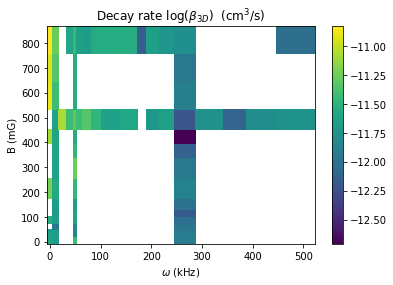

In [59]:
plt.pcolormesh(OmegaListExp/(2*np.pi*10**3), BListExp*1000, np.log10(np.transpose(decayRatesExp)), shading = 'auto')
plt.xlabel("$\omega$ (kHz)")
plt.ylabel("B (mG)")
plt.title("Decay rate log$(\\beta_{3D})$  (cm$^3$/s)")
plt.colorbar()

# Miscellaneous

## Previous arguments for the plane wave decay rate (old)

Previous argument 1) about the ratio of desity of states : now comes the argument that for $k \neq 0$, the density of states of plane waves and the density of states of spherically symmetric wavefunctions differ by the ratio $\rho_{2D}(E)/\rho_{1D}(E) = k_i L/4$, which translates the fact that there are much more plane wave states than there are radially symmetric ones for a given magnitude $k_i$. So we should account for that if we want to know what is the decay rate of 2 atoms colliding in plane waves: $\hbar\Gamma_{\text{plane}} = \hbar\Gamma_{\text{radial}}\frac{4}{k_i L}$

Previous argument 2) with the normalization of the Bessel's function. This $\Gamma_{s_{k}}$ is computed for an incoming spherical wave, but our atoms can be in other momentum states (plane waves) and we want to compute the $\Gamma_{\vec{k}}$. Imagine that we are dealing with free space solutions, the spherical wavefunction for the $m=0$ channel is a Bessel function. $s_{m = 0, k}(\rho) = KJ_{0}(k\rho)\sim_{\rho\rightarrow\infty} K\frac{sin(k\rho+\phi)}{\sqrt{\rho}}$. Normalizing $\int_{0}^{L}|s_{0, k}|^2\rho d\rho = 1$ gives $s_{0, k} = \sqrt{\frac{2k}{L}}J_{0}(k\rho)$. The Bessel function can be expressed in terms of plane waves:

$J_{0}(k\rho) = \frac{1}{2\pi}\int_{0}^{2\pi}e^{-i\vec{k}\cdot\vec{\rho}}d\theta_{\vec{k}} = \frac{1}{2\pi}\int_{0}^{2\pi}\sqrt{\pi L^2}\phi_{vec{k}}(\vec{\rho})d\theta_{\vec{k}}$

Where $\phi_{\vec{k}}(\vec{\rho})$ is the plane wavefunction of momentum $\vec{k}$. Replacing $s_{0, k}$ in the integral by plane waves, remembering that the matrix element is rotationnaly symmetric and therefore constant with respect to $\theta_{\vec{k}}$, the angle between $\vec{k}$ and some axis. We get:

$\hbar\Gamma_{s_{k}} = \left(\sqrt{\frac{2k}{L}}\sqrt{\pi L^2}\frac{1}{2\pi}2\pi\right)^2\hbar\Gamma_{\vec{k}}$

Therefore we are now looking at $\Gamma = \Gamma_{\vec{k}} = \frac{1}{2\pi k_{i}L}\Gamma_{s_{k}}$

## Comparaison with and without interpolation (old)

In the code I have added a interpolating function of the incoming wavefunction, so it is usefull to check that the interpolation gives the correct wavefunction. The interpolation is done with `interpolatePhi0`, and the set created is passed as an argument to most of the functions.

In [7]:
ρmin_init, ρmax_init, dρ_init = 0.01, 10, 0.01
ρmax_large, dρ_large = 300, 1
ρ_dimensions = [[ρmin_init, ρmax_init, dρ_init], [ρmax_large, dρ_large]]
dρ_large_ratio = 0.01
ρ_parameters = [ρmin_init, ρmax_init, dρ_init, dρ_large_ratio]
ρ_init, ρ_large, ρ_tot = createRhoArrays(ρ_dimensions)

In [8]:
ki = 0.06
B = 2
Ω = 0.5
D = np.sqrt(2/Ω)
ho_states = ho_list(10, D)

ϕ0_interpolated = interpolatePhi0(ρmax_large, ki, D, ρ_parameters, ho_states)
print(normalizedDecayAllChannel(ki, B, Ω, ρ_parameters, ho_states, ϕ0_interpolated))
print(normalizedDecayAllChannel(ki, B, Ω, ρ_parameters, ho_states, ϕ0_interpolated = None))

2.5430610831564157e-13
2.6255325112932114e-13


In [9]:
checkNormalization(ϕ_2array(ρ_init, ρ_large, m = 0, k = ki, n = 0, D = D, ho_states = ho_states, norm = True), ρ_tot)

1.0207164921544598

In [10]:
checkNormalization(normalizeMax(ϕ0_interpolated(ρ_tot), ρ_large), ρ_tot)

1.020904345317222

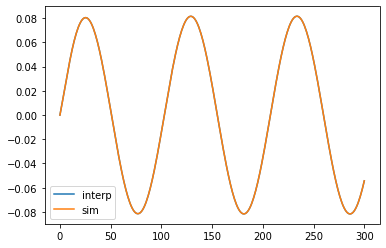

In [12]:
plt.plot(ρ_tot, normalizeMax(ϕ0_interpolated(ρ_tot), ρ_large), label='interp')
plt.plot(ρ_tot, ϕ_2array(ρ_init, ρ_large, m = 0, k = ki, n = 0, D = D, ho_states = ho_states, norm = True), label = 'sim')
plt.legend()

## Profiling and optimization

In [14]:
B = 0.2
Ω = 0.8
D = np.sqrt(2/Ω)
nmax = 100
zPrecisionDefault = [5, 0.1]
ρmin_init, ρmax_init, dρ_init = 0.01, 5, 0.01
dρ_large_ratio = 0.01
ρ_parameters = [ρmin_init, ρmax_init, dρ_init, dρ_large_ratio]
ho_states = ho_list(nmax, D, zPrecision = zPrecisionDefault)
ϕ0_interpolated = createListϕ0(ki, [B], [Ω], ρ_parameters, ho_states = ho_states, zPrecision = zPrecisionDefault, barrier = True)[0]

In [16]:
"cProfile.run('normalizedDecayAllChannel(ki, B, Ω, ρ_parameters, ho_states = ho_states, ϕ0_interpolated = ϕ0_interpolated, barrier = True)')"

"cProfile.run('normalizedDecayAllChannel(ki, B, Ω, ρ_parameters, ho_states = ho_states, ϕ0_interpolated = ϕ0_interpolated, barrier = True)')"

The grid has been designed to be dynamic, the parameters for the $\rho$ grid are guided by `\rho_parameters` which set the small grid and the precision in the output momentum we want, which then gets transformed by `computeRhoDimensions` into a real set of `\rho_dimensions`

For a scattering very close to the nnext harnomic oscilator state, the size of the `\rho_large` array can be driven by `kf`

In [14]:
findRhoMax(ki = 0.06, BList = [0.999], Ω = 1, ρ_parameters = ρ_parameters)
#findRhoMax(ki = 0.06, BList = [1], Ω = 1)

324

## Auto $z$ grid

Check that the $z$ grid use is not crazy.

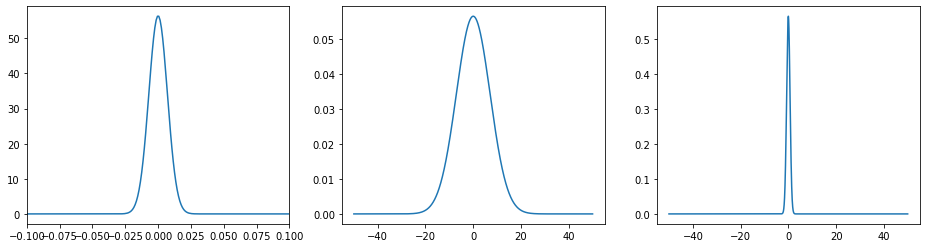

In [12]:
DList = [0.01, 10, 1]
z_max, dz = computeZDimensions(DList)
Z = np.linspace(-z_max, z_max, int(2*z_max/dz))
fig, ax = plt.subplots(1, 3, figsize = (16, 4))
ax1, ax2, ax3 = ax
ax1.plot(Z, density(Z, n = 0, D = DList[0]))
ax1.set_xlim(-0.1, 0.1)
ax2.plot(Z, density(Z, n = 0, D = DList[1]))
ax3.plot(Z, density(Z, n = 0, D = DList[2]))

## Check $V_{dd} = 0$ solution in Numerov

We should recover the free Bessel function for $V_{dd} = 0$, which is done by setting `barrier = False`. However it doesn't reproduce the result very well I find.

In [2]:
ρmin_init, ρmax_init, dρ_init = 0.001, 10, 0.001
dρ_large_ratio = 0.01
ρ_parameters = [ρmin_init, ρmax_init, dρ_init, dρ_large_ratio]
ki = 0.06
ρ_dimensions = computeRhoDimensions(ki, 1, ρ_parameters)
ρ_init, ρ_large, ρ_tot = createRhoArrays(ρ_dimensions)

<ipython-input-7-ab18050bcb27>:13: RuntimeWarning: divide by zero encountered in true_divide
  ax3.plot(ρ_tot, phiArrayAnalytical/phiArraySimulation, label = 'simulation')


(-1.0, 2.0)

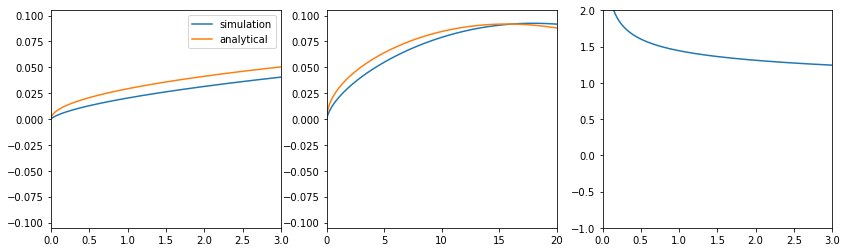

In [7]:
barrier = False
phiArraySimulation = ϕ_2array(ρ_init, ρ_large, m = 0, k = ki, n = 0, D = 1, ho_states = None, norm = True, barrier = barrier)
phiArrayAnalytical = analyticFreeSolution(ρ_tot, k = ki, m = 0)
fig, ax = plt.subplots(1, 3, figsize = (14, 4))
ax1, ax2, ax3 = ax
ax1.plot(ρ_tot, phiArraySimulation, label = 'simulation')
ax1.plot(ρ_tot, phiArrayAnalytical, label = 'analytical')
ax1.set_xlim(0,3)
ax1.legend()
ax2.plot(ρ_tot, phiArraySimulation, label = 'simulation')
ax2.plot(ρ_tot, phiArrayAnalytical, label = 'analytical')
ax2.set_xlim(0,20)
ax3.plot(ρ_tot, phiArrayAnalytical/phiArraySimulation, label = 'simulation')
ax3.set_xlim(0,3)
ax3.set_ylim(-1,2)

The analytical solution is much bigger at short range. It makes me think that the decay rate might be underestimated. I should probably incorporate in the code a scattering length $a$ at which the wavefunction cancels and is strictly equal to 0 inside.

## Discrepency between pathched and free solutions - study of the integrant

It can be puzzeling that we do not find the same $\beta_{2D}$ with the analytical result and the simulation. I think however that this is purely due to the phase matching.

In [59]:
B = 2
ki = 0.08
kf = np.sqrt(ki**2+2*B)
Omega = 10000
D = np.sqrt(2/Omega)

ρmin_init, ρmax_init, dρ_init = 0.001, 5, 0.001
dρ_large_ratio = 0.01
ρ_parameters = [ρmin_init, ρmax_init, dρ_init, dρ_large_ratio]
[[ρmin_init, ρmax_init, dρ_init], [ρmax_large, dρ_large]] = computeRhoDimensions(ki, kf, ρ_parameters)
ρ_init, ρ_large, ρ_tot = computeRhoArrays(ki, kf, ρ_parameters)
dρArray = np.concatenate((np.ones(len(ρ_init))*dρ_init, np.ones(len(ρ_large)-1)*dρ_large))

ϕf_array_simu_out = ϕ_2array(ρ_init, ρ_large, m = 2, k = kf, n = 0, D = D, ho_states = None, norm = True, barrier = True)
ϕf_array_simu_in = ϕ_2array(ρ_init, ρ_large, m = 0, k = ki, n = 0, D = D, ho_states = None, norm = True, barrier = True)
integrant_simu = ϕf_array_simu_out*j2(ρ_tot, z = 0, J = J)*ϕf_array_simu_in
integrant_simu = ϕf_array_simu_out*(-3/2)/J*(2/ρ_tot**3)*ϕf_array_simu_in
integrant_analytic = phiArrayAnalytic(ρ_tot,  k = ki, m = 0)*(-3/2)/J*(2/ρ_tot**3)*phiArrayAnalytic(ρ_tot,  k = kf, m = 2)

In [61]:
np.sum(integrant_simu)**2/np.sum(integrant_analytic)**2

1.5687465035496508

In [63]:
matrixElement = matrixElementSquared(D = D, j = 2, n = 0, m = 2, ki = ki, kf = kf, ρ_parameters = ρ_parameters, barrier = True)
matrixElement/(np.sum(ρmax_large*integrant_analytic*dρArray)**2/(ki*kf))

1.5442586326982894

Text(0.5, 1.0, 'Integrant')

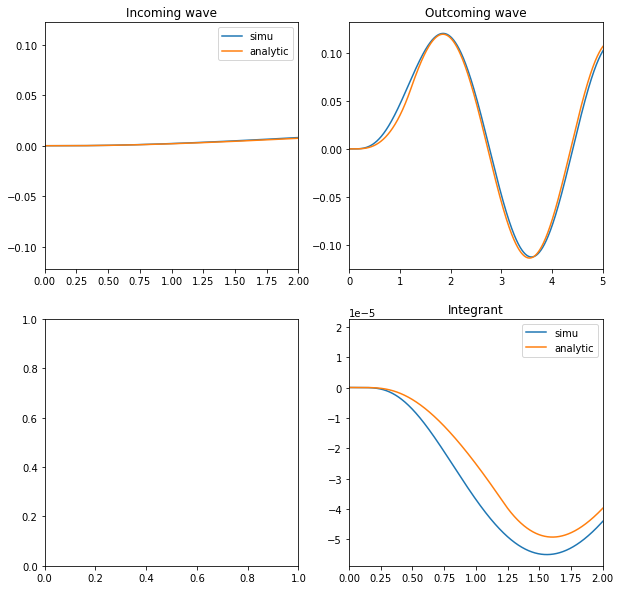

In [64]:
fig, ax = plt.subplots(2, 2, figsize = (10, 10))
[axPhiIn, axPhiOut], [axPhi3, axIntegrand] = ax
axPhiIn.plot(ρ_tot, ϕf_array_simu_in, label = 'simu')
axPhiIn.plot(ρ_tot, phiArrayAnalytic(ρ_tot,  k = ki, m = 0), label = 'analytic')
axPhiIn.set_xlim(0, 2)
axPhiIn.set_title('Incoming wave')
axPhiIn.legend()
axPhiOut.plot(ρ_tot, ϕf_array_simu_out, label = 'simu')
#axPhiOut.plot(ρ_tot, np.sqrt(np.pi*kf*ρ_tot/ρ_tot[-1])*jv(2, kf*ρ_tot), label = 'analytic')
axPhiOut.plot(ρ_tot, phiArrayAnalytic(ρ_tot, kf, m = 2), label = 'analytic')
axPhiOut.set_xlim(0, 5)
axPhiOut.set_title('Outcoming wave')
axIntegrand.plot(ρ_tot, integrant_simu, label = 'simu')
axIntegrand.plot(ρ_tot, integrant_analytic, label = 'analytic')
axIntegrand.legend()
axIntegrand.set_xlim(0, 2)
axIntegrand.set_title('Integrant')

## Few Bessel's functions

In [41]:
L = 100
k = 1
X = np.linspace(10, 10 + L, 10000)
dx = X[1] - X[0]
np.sum((np.cos(k*X-0*np.pi/2-np.pi/4)*np.sqrt(2/(L*X)))**2*X)*dx

0.9972101646818351

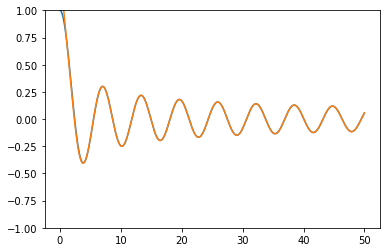

In [42]:
X = np.linspace(0.01, 50, 10000)
plt.plot(X, jv(0, X))
plt.ylim(-1,1)
plt.plot(X, np.cos(X-0*np.pi/2-np.pi/4)*np.sqrt(2/(np.pi*X)))

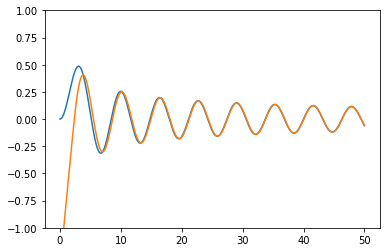

In [43]:
X = np.linspace(0.01, 50, 10000)
plt.plot(X, jv(2, X))
plt.ylim(-1,1)
plt.plot(X, np.cos(X-5*np.pi/4)*np.sqrt(2/(np.pi*X)))

# To do list

## Detailed study of the integrant and the Compton point

In [54]:
def integrandRho(D, j, n, m, ki, kf, ρ_parameters, ho_states = None, ϕ0_interpolated = None, zPrecision = zPrecisionDefault, barrier = True):
    matrix = integrand_2array(D, j, n, m, ki, kf, ρ_parameters, ho_states, ϕ0_interpolated, zPrecision, barrier)
    integrandRho = matrix.sum(axis = 1)
    return integrandRho

def rhoAveragedDecay(D, j, n, m, ki, kf, ρ_parameters, ho_states = None, ϕ0_interpolated = None, zPrecision = zPrecisionDefault, barrier = True):
    integrandRhoArray = integrandRho(D, j, n, m, ki, kf, ρ_parameters, ho_states, ϕ0_interpolated, zPrecision, barrier)
    integrandRhoNorm = integrandRhoArray/np.sum(integrandRhoArray)
    ρ_init, ρ_large, ρ_tot = computeRhoArrays(ki, kf, ρ_parameters)
    return np.cumsum(ρ_tot*integrandRhoNorm)[-1]

In [55]:
aScattering = 0.01
ki = 0.08
Bmax = 2
Bmin = 0.01
nB = 20
omegaMin = 0.05
omegaMax = 1
nOmega = 20
ρmin_init, ρmax_init, dρ_init = aScattering, 5, 0.01
dρ_large_ratio = 0.01

ρ_parameters = [ρmin_init, ρmax_init, dρ_init, dρ_large_ratio]
BList = np.linspace(Bmin, Bmax, nB)
OmegaList = np.linspace(omegaMin, omegaMax, nOmega)
DList = np.sqrt(2/OmegaList)

j = 2
n = 0
m = j
kfList = np.sqrt(j*BList+ki**2)

In [56]:
rhoDecay = np.array([[rhoAveragedDecay(D, j, n, m, ki, kf, ρ_parameters, barrier = True) 
             for kf in kfList]
               for D in DList])
rhoDecayFree = np.array([[rhoAveragedDecay(D, j, n, m, ki, kf, ρ_parameters, barrier = False) 
             for kf in kfList]
               for D in DList])

KeyboardInterrupt: 

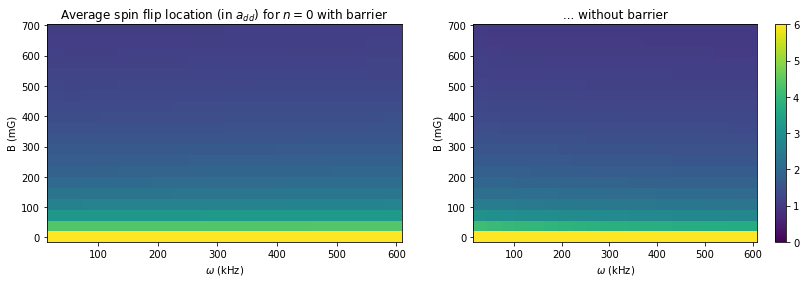

In [53]:
fig, ax = plt.subplots(1, 2, figsize = (14, 4))
ax1, ax2 = ax
im = ax1.pcolormesh(OmegaList*OmegaNorm/(2*np.pi*10**3), BList*Bnorm*1000, np.transpose(rhoDecay), shading = 'auto', vmin = 0, vmax = 6)
ax1.set_xlabel("$\omega$ (kHz)")
ax1.set_ylabel("B (mG)")
ax1.set_title("Average spin flip location (in $a_{dd}$) for $n= 0$ with barrier")
ax2.pcolormesh(OmegaList*OmegaNorm/(2*np.pi*10**3), BList*Bnorm*1000, np.transpose(rhoDecayFree), shading = 'auto', vmin = 0, vmax = 6)
ax2.set_xlabel("$\omega$ (kHz)")
ax2.set_ylabel("B (mG)")
ax2.set_title("... without barrier")
fig.colorbar(im, ax=ax2)
plt.savefig('comptonPoint.jpg', dpi = 300)
#fig.colorbar()

In [9]:
integrandRhoArray = integrandRho(D, j, n, m, ki, kf, ρ_parameters, ho_states = None, ϕ0_interpolated = None, zPrecision = zPrecisionDefault, barrier = True)
integrandRhoNorm = integrandRhoArray/np.sum(integrandRhoArray)

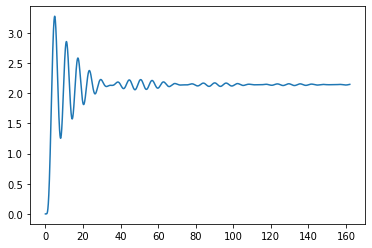

In [17]:
ρ_init, ρ_large, ρ_tot = computeRhoArrays(ki, kf, ρ_parameters)
plt.plot(ρ_tot, np.cumsum(ρ_tot*integrandRhoNorm))
#plt.xlim(0, 15)

## Better approaching of the free Bessel function when $m=0$

## $m=-2, -1$ to $m=0$ channel

## Thermal averaging

## Thermal dependance

In [2]:
zPrecisionDefault = [5, 0.1]
B0 = 0.2
omega0 = 0.8
ρmin_init, ρmax_init, dρ_init = 0.0001, 5, 0.0001
dρ_large_ratio = 0.01
ρ_parameters = [ρmin_init, ρmax_init, dρ_init, dρ_large_ratio]
TList = np.logspace(-2, -0, 5)
kiList = np.sqrt(2*k_B*TList/m)
# z_max, dz = computeZDimensions(DList)
ratioList = []

In [5]:
for ki in kiList:
    print(ki)
    decayRates = runSimulationList([omega0], [B0], ki, ρ_parameters, zPrecision = zPrecisionDefault, barrier = True)[0, 0]
    decayRatesNoVdd = runSimulationList([omega0], [B0], ki, ρ_parameters, zPrecision = zPrecisionDefault, barrier = False)[0, 0]
    ratioList += [decayRatesNoVdd/decayRates]

1.0131546164696323
calculating groud state wavefunction
calculating ho wavefunction
number of jobs pending:  1 , end expected in  0  seconds
number of jobs pending:  1 , end expected in  0  seconds
number of jobs pending:  1 , end expected in  0  seconds
calculating groud state wavefunction
calculating ho wavefunction
number of jobs pending:  1 , end expected in  0  seconds
number of jobs pending:  1 , end expected in  0  seconds
1.8016719936538288
calculating groud state wavefunction
calculating ho wavefunction
number of jobs pending:  1 , end expected in  0  seconds
number of jobs pending:  1 , end expected in  0  seconds
number of jobs pending:  1 , end expected in  0  seconds
calculating groud state wavefunction
calculating ho wavefunction
number of jobs pending:  1 , end expected in  0  seconds
number of jobs pending:  1 , end expected in  0  seconds
3.2038762099583806
calculating groud state wavefunction
calculating ho wavefunction
number of jobs pending:  1 , end expected in  0 

In [3]:
B0 = 0.2
omega0 = 0.8
ρmin_init, ρmax_init, dρ_init = 0.01, 100, 0.01
dρ_large_ratio = 0.01
ρ_parameters = [ρmin_init, ρmax_init, dρ_init, dρ_large_ratio]
TList = np.logspace(-7, 1, 15)
kiList = np.sqrt(2*k_B*TList/m)
# z_max, dz = computeZDimensions(DList)
ratioList = []
for ki in kiList:
    print(ki)
    decayRates = normalizedDecayAllChannel(ki, B0, omega0, ρ_parameters, ho_states = None, ϕ0_interpolated = None, zPrecision = zPrecisionDefault, barrier = True)
    decayRatesNoVdd = normalizedDecayAllChannel(ki, B0, omega0, ρ_parameters, ho_states = None, ϕ0_interpolated = None, zPrecision = zPrecisionDefault, barrier = False)
    ratioList += [decayRatesNoVdd/decayRates]

0.0032038762099583806


<ipython-input-3-4df5ad80cbe1>:14: RuntimeWarning: divide by zero encountered in double_scalars
  ratioList += [decayRatesNoVdd/decayRates]


0.006185716522189719
0.011942748840907283
0.023057838063762777
0.04451771558266454
0.08595025237052088
0.1659439570487069
0.32038762099583806
0.6185716522189718
1.1942748840907282
2.3057838063762754
4.451771558266454
8.595025237052088
16.59439570487068
Normalization issue for m, k, n, D =  2 16.606 0 1.581
Norm =  1.05853
32.038762099583806
Normalization issue for m, k, n, D =  2 32.045 0 1.581
Norm =  0.94409


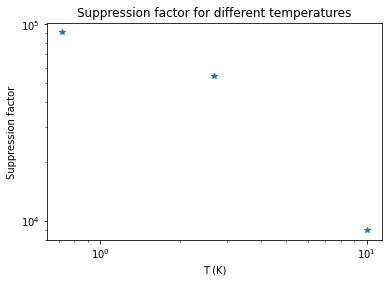

In [4]:
plt.loglog(TList, ratioList, '*')
plt.title(r'Suppression factor for different temperatures')
plt.xlabel(r'T (K)')
plt.ylabel(r'Suppression factor')
plt.savefig('temperatureDependance_n0.jpg', dpi = 300)

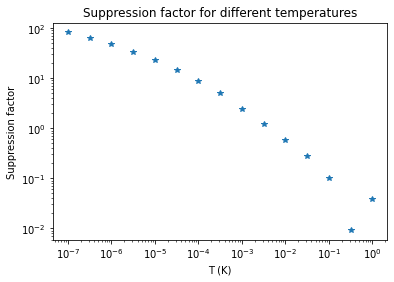

In [22]:
plt.loglog(TList, ratioList, '*')
plt.title(r'Suppression factor for different temperatures')
plt.xlabel(r'T (K)')
plt.ylabel(r'Suppression factor')
plt.savefig('temperatureDependance_n0.jpg', dpi = 300)

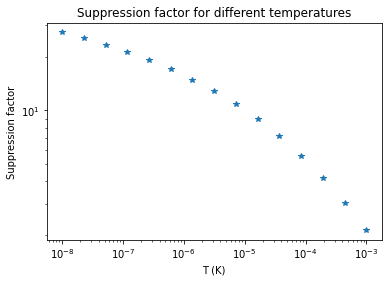

In [27]:
plt.loglog(TList, ratioList, '*')
plt.title(r'Suppression factor for different temperatures')
plt.xlabel(r'T (K)')
plt.ylabel(r'Suppression factor')
plt.savefig('temperatureDependance_n0.jpg', dpi = 300)

In [12]:
hbar*OmegaNorm/k_B

2.8564161124041206e-05

In [5]:
ki = 1000
kf = np.sqrt(2*B0+ki**2)
D = np.sqrt(2/omega0)
kf

1000.00019999998

In [60]:
zPrecisionDefault = [5, 0.1]

In [6]:
ho_states = createListHOstates(ki, [B0], [omega0], zPrecision = zPrecisionDefault)[0]

In [7]:
ρ_init, ρ_large, ρ_tot = computeRhoArrays(ki, kf, ρ_parameters)
phi_in_True = ϕ_2array(ρ_init, ρ_large, m = 0, k = ki, n = 0, D = D, ho_states = ho_states, norm = True, zPrecision = zPrecisionDefault, barrier = True)
phi_in_False = ϕ_2array(ρ_init, ρ_large, m = 0, k = ki, n = 0, D = D, ho_states = ho_states, norm = True, zPrecision = zPrecisionDefault, barrier = False)
phi_in_free = analyticFreeSolution(ρ_tot, ki, m = 0)
phi_out_free = analyticFreeSolution(ρ_tot, kf, m = 2)
phi_out_True = ϕ_2array(ρ_init, ρ_large, m = 2, k = kf, n = 0, D = D, ho_states = ho_states, norm = True, zPrecision = zPrecisionDefault, barrier = True)
phi_out_False = ϕ_2array(ρ_init, ρ_large, m = 2, k = kf, n = 0, D = D, ho_states = ho_states, norm = True, zPrecision = zPrecisionDefault, barrier = False)

Normalization issue for m, k, n, D =  0 1000 0 1.581
Norm =  1.06271
Normalization issue for m, k, n, D =  0 1000 0 1.581
Norm =  1.06026
Normalization issue for m, k, n, D =  2 1000.0 0 1.581
Norm =  1.05327
Normalization issue for m, k, n, D =  2 1000.0 0 1.581
Norm =  1.06459


/usr/local/lib/python3.9/site-packages/IPython/core/pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


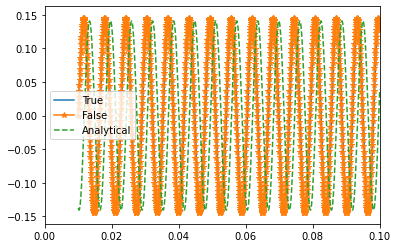

In [8]:
plt.plot(ρ_tot, phi_in_True, label = 'True')
plt.plot(ρ_tot, phi_in_False, '*-', label = 'False')
plt.plot(ρ_tot, phi_in_free, '--', label = 'Analytical')
plt.xlim(0, .1)
plt.legend()
#plt.ylim(-0.000005, 0.00005)

In [55]:
j2(ρ = 0.1, z = 0, J = J)

1

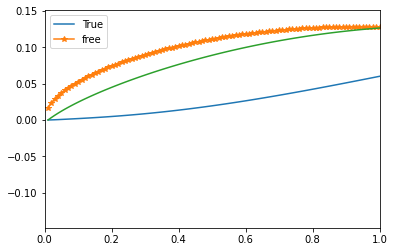

In [42]:
plt.plot(ρ_tot, phi_in_True, label = 'True')
plt.plot(ρ_tot, phi_in_free, '*-', label = 'free')
plt.plot(ρ_tot, phi_in_False)
plt.xlim(0, 1)
plt.legend()
#plt.ylim(-0.000005, 0.00005)

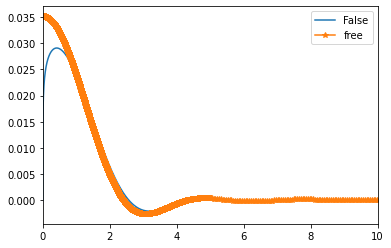

In [19]:
plt.plot(ρ_tot, phi_in_False*phi_out_False/ρ_tot**3, label = 'False')
plt.plot(ρ_tot, phi_in_free*phi_out_free/ρ_tot**3, '*-', label = 'free')
#plt.plot(ρ_tot, phi_in_False)
plt.xlim(0, 10)
plt.legend()
#plt.ylim(-0.000005, 0.00005)

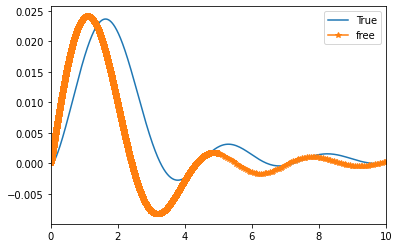

In [33]:
plt.plot(ρ_tot, phi_in_True*phi_out_True/ρ_tot**2, label = 'True')
plt.plot(ρ_tot, phi_in_free*phi_out_free/ρ_tot**2, '*-', label = 'free')
#plt.plot(ρ_tot, phi_in_False)
plt.xlim(0, 10)
plt.legend()
#plt.ylim(-0.000005, 0.00005)

In [25]:
zPrecisionDefault = [5, 0.1]
B0 = 0.2
omega0 = 0.8
ρmin_init, ρmax_init, dρ_init = 0.01, 5, 0.01
dρ_large_ratio = 0.01
ρ_parameters = [ρmin_init, ρmax_init, dρ_init, dρ_large_ratio]
TList = np.logspace(-8, -3, 15)
kiList = np.sqrt(2*k_B*TList/m)
# z_max, dz = computeZDimensions(DList)
ratioList = []

ki = 0.00347848
ki = 1
kf = np.sqrt(2*B0+ki**2)
D = np.sqrt(2/omega0)
ho_states = createListHOstates(ki, [B0], [omega0], zPrecision = zPrecisionDefault)[0]

In [26]:
ρ_init1, ρ_large1, ρ_tot1 = computeRhoArrays(ki, ki, ρ_parameters)
phi_false1 = ϕ_2array(ρ_init1, ρ_large1, m = 0, k = ki, n = 0, D = D, ho_states = ho_states, norm = True, zPrecision = zPrecisionDefault, barrier = False)
phi0List_false1 = createListϕ0(ki, [B0], [omega0], ρ_parameters, ho_states = ho_states, zPrecision = zPrecisionDefault, barrier = False)[0]
phi_false_interp1 = normalizeMax(phi0List_false1(ρ_tot1), ρ_large1)

In [27]:
ρ_init2, ρ_large2, ρ_tot2 = computeRhoArrays(ki, kf, ρ_parameters)
phi_false2 = ϕ_2array(ρ_init2, ρ_large2, m = 0, k = ki, n = 0, D = D, ho_states = ho_states, norm = True, zPrecision = zPrecisionDefault, barrier = False)
phi0List_false2 = createListϕ0(ki, [B0], [omega0], ρ_parameters, ho_states = ho_states, zPrecision = zPrecisionDefault, barrier = False)[0]
phi_false_interp2 = normalizeMax(phi0List_false2(ρ_tot2), ρ_large2)

In [28]:
len(ρ_tot2)

726

In [52]:
findRhoMax(ki, [B0], omega0, ρ_parameters)

3617

In [54]:
ρ_tot1[-1]

3617.0

In [50]:
kf

0.6324650977114156

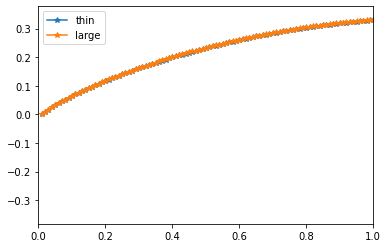

In [31]:
plt.plot(ρ_tot2, phi_false2, '*-', label = 'thin')
plt.plot(ρ_tot1, phi_false1, '*-', label = 'large')
#plt.plot(ρ_tot2, phi_false_interp2, '--', label = 'thin interp')
#plt.plot(ρ_tot1, phi_false_interp1, '*-', label = 'large interp')
plt.xlim(0, 1)
plt.legend()
#plt.ylim(0, 0.5)

In [14]:
zPrecisionDefault = [5, 0.1]
B0 = 0.2
omega0 = 0.8
ρmin_init, ρmax_init, dρ_init = 0.01, 5, 0.01
dρ_large_ratio = 0.01
ρ_parameters = [ρmin_init, ρmax_init, dρ_init, dρ_large_ratio]
TList = np.logspace(-8, -3, 15)
kiList = np.sqrt(2*k_B*TList/m)
# z_max, dz = computeZDimensions(DList)
ratioList = []

ki = 0.00347848
ki = 0.00021237544363051633
#ki = 100
kf = np.sqrt(2*B0+ki**2)
D = np.sqrt(2/omega0)
kf

0.6324555676909873

In [32]:
print(normalizedDecayAllChannel(ki, B0, omega0, ρ_parameters, ho_states = None, ϕ0_interpolated = None, zPrecision = zPrecisionDefault, barrier = True))
print(normalizedDecayAllChannel(ki, B0, omega0, ρ_parameters, ho_states = None, ϕ0_interpolated = None, zPrecision = zPrecisionDefault, barrier = False))

2.761131634933241e-13
1.5601941398714514e-13


In [16]:
phi0List_false = createListϕ0(ki, [B0], [omega0], ρ_parameters, ho_states = ho_states, zPrecision = zPrecisionDefault, barrier = False)[0]
phi0List_true = createListϕ0(ki, [B0], [omega0], ρ_parameters, ho_states = ho_states, zPrecision = zPrecisionDefault, barrier = True)[0]
print(normalizedDecayAllChannel(ki, B0, omega0, ρ_parameters, ho_states = None, ϕ0_interpolated = phi0List_true, zPrecision = zPrecisionDefault, barrier = True))
print(normalizedDecayAllChannel(ki, B0, omega0, ρ_parameters, ho_states = None, ϕ0_interpolated = phi0List_false, zPrecision = zPrecisionDefault, barrier = False))

3.569293173510307e-15
1.2428599851941575e-13


In [106]:
ρmax_large2 = findRhoMax(ki, [B0], omega0, ρ_parameters)

In [107]:
ρmin_init2, ρmax_init2, dρ_init2, dρ_large_ratio2 = ρ_parameters
ρ_init2 = np.linspace(ρmin_init2, ρmax_init2, round(ρmax_init2/dρ_init2))
dρ_large2 = dρ_large_ratio2*2*np.pi/ki
ρ_large2 = np.linspace(ρmax_init2, ρmax_large2, round((ρmax_large2-ρmax_init2)/dρ_large2))
ρ_tot2 = np.concatenate((ρ_init2, ρ_large2[1:]))

(0.0, 1000.0)

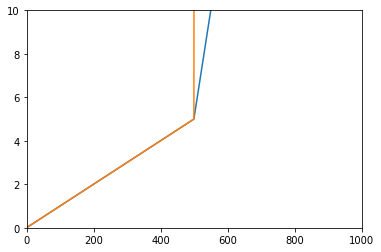

In [114]:
plt.plot(ρ_tot)
plt.plot(ρ_tot2)
plt.ylim(0, 10)
plt.xlim(0, 1000)

In [109]:
ρ_tot2

array([1.00000000e-02, 2.00000000e-02, 3.00000000e-02, 4.00000000e-02,
       5.00000000e-02, 6.00000000e-02, 7.00000000e-02, 8.00000000e-02,
       9.00000000e-02, 1.00000000e-01, 1.10000000e-01, 1.20000000e-01,
       1.30000000e-01, 1.40000000e-01, 1.50000000e-01, 1.60000000e-01,
       1.70000000e-01, 1.80000000e-01, 1.90000000e-01, 2.00000000e-01,
       2.10000000e-01, 2.20000000e-01, 2.30000000e-01, 2.40000000e-01,
       2.50000000e-01, 2.60000000e-01, 2.70000000e-01, 2.80000000e-01,
       2.90000000e-01, 3.00000000e-01, 3.10000000e-01, 3.20000000e-01,
       3.30000000e-01, 3.40000000e-01, 3.50000000e-01, 3.60000000e-01,
       3.70000000e-01, 3.80000000e-01, 3.90000000e-01, 4.00000000e-01,
       4.10000000e-01, 4.20000000e-01, 4.30000000e-01, 4.40000000e-01,
       4.50000000e-01, 4.60000000e-01, 4.70000000e-01, 4.80000000e-01,
       4.90000000e-01, 5.00000000e-01, 5.10000000e-01, 5.20000000e-01,
       5.30000000e-01, 5.40000000e-01, 5.50000000e-01, 5.60000000e-01,
      

In [12]:
print(normalizedDecayAllChannel(ki, B0, omega0, ρ_parameters, ho_states = ho_states, ϕ0_interpolated = None, zPrecision = zPrecisionDefault, barrier = True))
print(normalizedDecayAllChannel(ki, B0, omega0, ρ_parameters, ho_states = ho_states, ϕ0_interpolated = None, zPrecision = zPrecisionDefault, barrier = False))

9.34034056498266e-15
1.9808343627884624e-13


In [21]:
print(normalizedDecayAllChannel(ki, B0, omega0, ρ_parameters, ho_states = ho_states, ϕ0_interpolated = phi0List_true, zPrecision = zPrecisionDefault, barrier = True))
print(normalizedDecayAllChannel(ki, B0, omega0, ρ_parameters, ho_states = ho_states, ϕ0_interpolated = phi0List_false, zPrecision = zPrecisionDefault, barrier = False))

8.160101420705653e-15
9.389207184775156e-14


In [79]:
print(runSimulationList([omega0], [B0], ki, ρ_parameters, zPrecision = zPrecisionDefault, barrier = True)[0, 0])
print(runSimulationList([omega0], [B0], ki, ρ_parameters, zPrecision = zPrecisionDefault, barrier = False)[0, 0])

calculating groud state wavefunction
calculating ho wavefunction
number of jobs pending:  1 , end expected in  0  seconds
number of jobs pending:  1 , end expected in  0  seconds
number of jobs pending:  1 , end expected in  0  seconds
8.15720944910638e-15
calculating groud state wavefunction
calculating ho wavefunction
number of jobs pending:  1 , end expected in  0  seconds
number of jobs pending:  1 , end expected in  0  seconds
9.391431829508692e-14


In [33]:
8.160101420705653e-15/9.389207184775156e-14

0.08690937648002346

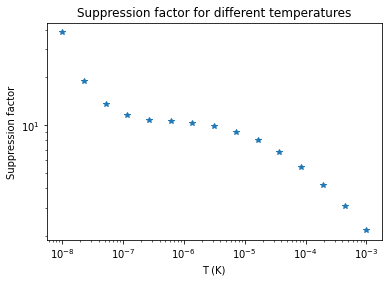

In [50]:
plt.loglog(TList, ratioList, '*')
plt.title(r'Suppression factor for different temperatures')
plt.xlabel(r'T (K)')
plt.ylabel(r'Suppression factor')
plt.savefig('temperatureDependance_n0.jpg', dpi = 300)

Actually I should plot only the $n=0$ channel, because if $k_i$ is larger than the bandgap it doesn't make much more sense anymore.

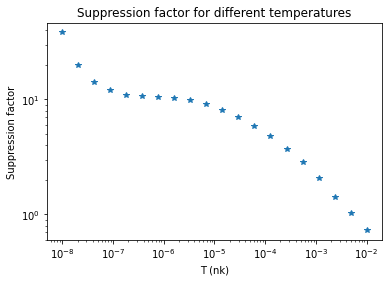

In [25]:
plt.loglog(TList, ratioList, '*')
plt.title(r'Suppression factor for different temperatures')
plt.xlabel(r'T (nk)')
plt.ylabel(r'Suppression factor')
plt.savefig('temperatureDependance.jpg', dpi = 300)

Next plot is by using only $n=0

In [ ]:
plt.loglog(TList, ratioList, '*')
plt.title(r'Suppression factor for different temperatures, $n = 0$ channel')
plt.xlabel(r'T (nk)')
plt.ylabel(r'Suppression factor')
plt.savefig('temperatureDependance_n0.jpg', dpi = 300)

## Sensitivity of the grid

### $z$-grid precision

In [46]:
aScattering = 0.01
ki = 0.08
Bmin = 0.05
Bmax = 2
B0 = 1
nB = 20
omegaMin = 0.05
omegaMax = 1
omega0 = 0.5
nOmega = 20
ρmin_init, ρmax_init, dρ_init = aScattering, 5, 0.01
dρ_large_ratio = 0.01

ρ_parameters = [ρmin_init, ρmax_init, dρ_init, dρ_large_ratio]
BList = np.linspace(Bmin, Bmax, nB)
OmegaList = np.linspace(omegaMin, omegaMax, nOmega)

In [40]:
zPrecisionList = [[2, 0.2], [5, 0.1], [10, 0.02]]
decayRatesOmegaList = []
decayRatesBList = []
for zPrecision in zPrecisionList:
    decayRatesOmegaList += [runSimulationList(OmegaList, [B0], ki, ρ_parameters, zPrecision)[:, 0]]
    decayRatesBList += [runSimulationList([omega0], BList, ki, ρ_parameters, zPrecision)[0, :]]

calculating groud state wavefunction
calculating ho wavefunction
number of jobs pending:  20 , end expected in  0  seconds
number of jobs pending:  20 , end expected in  0  seconds
number of jobs pending:  14 , end expected in  5  seconds
calculating groud state wavefunction
calculating ho wavefunction
number of jobs pending:  20 , end expected in  0  seconds
number of jobs pending:  20 , end expected in  0  seconds
number of jobs pending:  7 , end expected in  1  seconds
calculating groud state wavefunction
calculating ho wavefunction
number of jobs pending:  20 , end expected in  0  seconds
number of jobs pending:  20 , end expected in  0  seconds
number of jobs pending:  20 , end expected in  0  seconds
number of jobs pending:  9 , end expected in  2  seconds
number of jobs pending:  1 , end expected in  0  seconds
calculating groud state wavefunction
calculating ho wavefunction
number of jobs pending:  20 , end expected in  0  seconds
number of jobs pending:  20 , end expected in  

[2, 0.2]
[5, 0.1]
[10, 0.02]


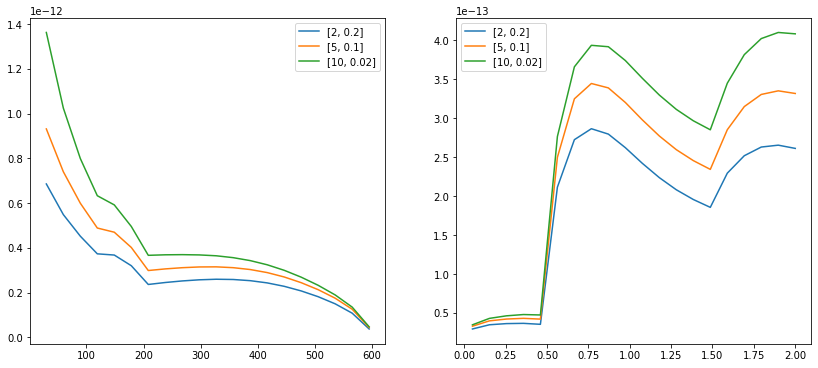

In [41]:
fig, ax = plt.subplots(1, 2, figsize = (14, 6))
axOmega, axB = ax
for zPrecision, decayRatesOmega, decayRatesB in zip(zPrecisionList, decayRatesOmegaList, decayRatesBList):
    print(zPrecision)
    axOmega.plot(OmegaList*OmegaNorm/(2*np.pi*1000), decayRatesOmega, label = str(zPrecision))
    axB.plot(BList, decayRatesB, label = str(zPrecision))
axOmega.legend()
axB.legend()

I first observe that for different values of the $z$-grid, the result differs quite a bit. So I try in the next step to see what is the best time vs precision option.

In [51]:
zPrecisionBase = [5, 0.1]
listQ = [0.25, 0.5, 1, 2, 4, 8, 16, 32]
zPrecisionList = [[zPrecisionBase[0]*q, zPrecisionBase[1]/q] for q in listQ]
decayRate = [runSimulationList([0.5], [1], ki, ρ_parameters, zPrecision)[0,0] for zPrecision in zPrecisionList]

calculating groud state wavefunction
calculating ho wavefunction
number of jobs pending:  1 , end expected in  0  seconds
number of jobs pending:  1 , end expected in  0  seconds
calculating groud state wavefunction
calculating ho wavefunction
number of jobs pending:  1 , end expected in  0  seconds
number of jobs pending:  0 , end expected in  0  seconds
calculating groud state wavefunction
calculating ho wavefunction
number of jobs pending:  1 , end expected in  0  seconds
number of jobs pending:  1 , end expected in  0  seconds
calculating groud state wavefunction
calculating ho wavefunction
number of jobs pending:  1 , end expected in  0  seconds
number of jobs pending:  1 , end expected in  0  seconds
number of jobs pending:  0 , end expected in  0  seconds
calculating groud state wavefunction
calculating ho wavefunction
number of jobs pending:  1 , end expected in  0  seconds
number of jobs pending:  1 , end expected in  0  seconds
number of jobs pending:  1 , end expected in  0 

Text(0, 0.5, 'Decay Rate')

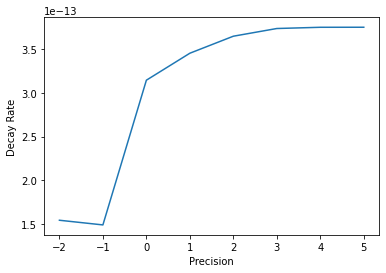

In [53]:
plt.plot(np.log(np.array(listQ))/np.log(2), decayRate)
plt.xlabel('Precision')
plt.ylabel('Decay Rate')

A grid of [40, 0.01] seems optimal here. Although maybe we could reduced the length. After looking around, [5, 0.01] seems optimal, but it may be because $\rho_{min}$ is also set to 0.01...

### Influence of the $\rho$-grid on the saturation of the $z$-grid

In [62]:
aScattering = 0.01
ki = 0.08
listQ = [0.25, 0.5, 1, 2, 4]
ρ_parametersBase = [aScattering, 5, 0.01, 0.01]
ρ_parametersList = [[aScattering, ρ_parametersBase[1]*q, ρ_parametersBase[2]/q, ρ_parametersBase[3]/q] for q in listQ]
zPrecision = [5, 0.01]
decayRate = [runSimulationList([0.5], [1], ki, ρ_parameters, zPrecision)[0,0] for ρ_parameters in ρ_parametersList]

calculating groud state wavefunction
calculating ho wavefunction
number of jobs pending:  1 , end expected in  0  seconds
number of jobs pending:  1 , end expected in  0  seconds
calculating groud state wavefunction
calculating ho wavefunction
number of jobs pending:  1 , end expected in  0  seconds
number of jobs pending:  1 , end expected in  0  seconds
calculating groud state wavefunction
calculating ho wavefunction
number of jobs pending:  1 , end expected in  0  seconds
number of jobs pending:  1 , end expected in  0  seconds
number of jobs pending:  1 , end expected in  0  seconds
number of jobs pending:  1 , end expected in  0  seconds
calculating groud state wavefunction
calculating ho wavefunction
number of jobs pending:  1 , end expected in  0  seconds
number of jobs pending:  1 , end expected in  0  seconds
number of jobs pending:  1 , end expected in  0  seconds
number of jobs pending:  1 , end expected in  0  seconds
number of jobs pending:  1 , end expected in  0  seconds

Text(0, 0.5, 'Decay Rate')

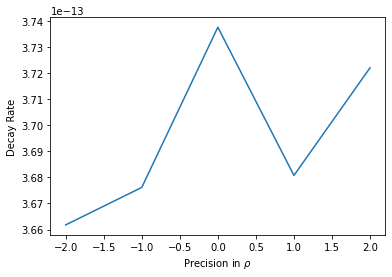

In [63]:
plt.plot(np.log(np.array(listQ))/np.log(2), decayRate)
plt.xlabel(r'Precision in $\rho$')
plt.ylabel('Decay Rate')

After looking more close there seem to be some gain att increasing jointly the $z$ and $\rho$ precision, but it still seems to converge, and a zPrecision of [5, 0.01] with $\rho$Parameters of [$a$, 5, 0.01, 0.01] seems to sature within 1%

## Born approximation for chromium derivation

In Ben Lev paper there is the expression:
\begin{equation}
\sigma_1 = \frac{8\pi}{15}F^3\left(\frac{\mu_0(g_F\mu_B)^2m}{4\pi\hbar^2}\right)^2\left[1+\epsilon h(k_f/k_i)\right]\frac{k_f}{k_i}
\end{equation}
And then $\beta = 2\sigma\hbar\frac{k_i}{m}$. So:
\begin{eqnarray}
\beta_1 &=& \frac{16\pi}{15}J^3\left(2a_{dd}/J^4\right)^2f\left(\frac{k_f}{k_i}\right)\frac{k_f}{k_i}\hbar k_i/m \\
        &=& \frac{64\pi}{15}\frac{a_{dd}^2}{J}f\left(\frac{k_f}{k_i}\right)\frac{\hbar k_f}{m}
\end{eqnarray}
And similarly:
\begin{equation}
\beta_2 = \frac{64\pi}{15}\frac{a_{dd}^2}{J^2}f\left(\frac{k_f}{k_i}\right)\frac{\hbar k_f}{m}
\end{equation}

In [2]:
def f(u, epsilon = 1):
    return 1+epsilon*(-1/2-3/8*(1-u**2)**2/(u*(1+u**2))*np.log((1-u)**2/(1+u)**2))

sigma_norm = (2*a_dd)**2

def sigma_1(u):
    # removed the sigma_norm = (2*a_dd)**2
    return 8*np.pi/15*J**(-1)*f(u)*u

def sigma_2(u):
    return 8*np.pi/15*J**(-2)*f(u)*u

def beta_BA_channel1(ki, kf):
    return 64*np.pi/15*a_dd**2/J*hbar*(kf/a_dd)/m*f(kf/ki)

def beta_BA_channel2(ki, kf):
    return 64*np.pi/15*a_dd**2/J**2*hbar*(kf/a_dd)/m*f(kf/ki)

def beta_BA(ki, B):
    kf1 = np.sqrt(B+ki**2)
    kf2 = np.sqrt(2*B+ki**2)
    return beta_BA_channel1(ki, kf1) + beta_BA_channel2(ki, kf2)

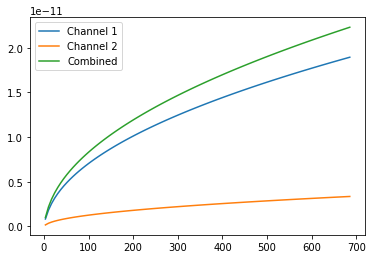

In [11]:
ki = 0.08
cm = 100
BList = np.linspace(0.01, 2, 100)
KList_1 = np.sqrt(BList+ki**2)
KList_2 = np.sqrt(2*BList+ki**2)
channel1 = 2*sigma_norm*sigma_1(KList_1/ki)*hbar*(ki/a_dd)/m*cm**3
channel2 = 2*sigma_norm*sigma_2(KList_2/ki)*hbar*(ki/a_dd)/m*cm**3
plt.figure()
plt.plot(BList*Bnorm*1000, channel1, label = 'Channel 1')
plt.plot(BList*Bnorm*1000, channel2, label = 'Channel 2')
plt.plot(BList*Bnorm*1000, beta_BA(ki, BList)*cm**3, label = 'Combined')
#plt.plot(BList*Bnorm*1000, channel1 + channel2, label = 'Combined2')
plt.legend()

From supplementary material of Ben Lev's paper:
\begin{equation}
\beta_{3D} = \left(\frac{m}{4\pi k_BT}\right)^{3/2}\int_0^{\infty}4\pi v_{rel}^2e^{-mv_{rel}^2/(4k_BT)}\left[\sigma_{1}\left(\frac{2\hbar k_f^{(1)}}{mv_{rel}}\right)+\sigma_{2}\left(\frac{2\hbar k_f^{(2)}}{mv_{rel}}\right)\right]v_{rel}dv_{rel}
\end{equation}
Set $v = v_{rel}\sqrt{\frac{m}{2k_BT}}$ and it gives:
\begin{equation}
\beta_{3D} = \left(\frac{1}{4\pi}\right)^{3/2}2^{4/2}\left(\frac{k_BT}{m}\right)^{1/2}\int_0^{\infty}4\pi v^2e^{-v^2/2}\left[\sigma_{1}\left(\frac{2\hbar k_f^{(1)}}{\sqrt{2mk_BT}v}\right)+\sigma_{2}\left(\frac{2\hbar k_f^{(2)}}{\sqrt{2mk_BT}v}\right)\right]vdv
\end{equation}

Set $v = v_{rel}\sqrt{\frac{m}{2k_BT}}$ and it gives:
\begin{equation}
\boxed{\beta_{3D} = \left(\frac{2k_BT}{\pi m}\right)^{1/2}\int_0^{\infty} v^2e^{-v^2/2}\left[\sigma_{1}\left(\frac{2\hbar}{a_{dd}\sqrt{2mk_BT}}\frac{\tilde{k}_f^{(1)}}{v}\right)+\sigma_{2}\left(\frac{2\hbar}{a_{dd}\sqrt{2mk_BT}}\frac{\tilde{k}_f^{(2)}}{v}\right)\right]vdv}
\end{equation}
With $\frac{2\hbar}{a_{dd}\sqrt{2mk_BT}}=13.8$ at $300$ nK.

If (should check factor of 2 given the comment in Ben Lev supplementary material about the relative coordinate) we also say that $\tilde{k}_i^2=\frac{k_BT}{2E_{dd}}$ it gives $\sqrt{2mk_BT} = \tilde{k}_i \sqrt{2}\hbar/a_{dd}$. So we can write:
\begin{equation}
\boxed{\beta_{3D} = \left(\frac{2k_BT}{\pi m}\right)^{1/2}\int_0^{\infty} v^2e^{-v^2/2}\left[\sigma_{1}\left(\frac{\tilde{k}_f^{(1)}}{\tilde{k}_i v}\right)+\sigma_{2}\left(\frac{\tilde{k}_f^{(2)}}{\tilde{k}_i v}\right)\right]vdv}
\end{equation}

In [4]:
T = 75*10**(-9)
alpha = 2*hbar/(a_dd*np.sqrt(2*m*k_B*T))
prefactor = sigma_norm*np.sqrt(2*k_B*T/(np.pi*m))
cm3 = 10**(-6)
ki = 0.04

In [5]:
def integrantBorn(v, B):
    return v**3*np.exp(-v**2/2)*(sigma_1(np.sqrt(B+ki**2)/ki)+sigma_2(np.sqrt(2*B+ki**2)/ki))
def integral(B):
    return quad(integrantBorn, 0, np.infty, args = (B,))[0]

BList = np.linspace(10**(-5), 2, 100)
betaList = np.array([prefactor*integral(B)/cm3 for B in BList])

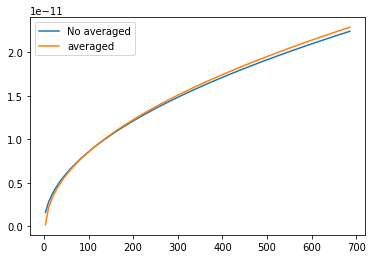

In [6]:
ki = np.sqrt(2*k_B*T/m)
cm = 100
BList = np.linspace(0.01, 2, 100)
plt.figure()
plt.plot(BList*Bnorm*1000, beta_BA(ki, BList)*cm**3, label = 'No averaged')
plt.plot(BList*Bnorm*1000, betaList, label = 'averaged')
plt.legend()

## Sensitivity on scattering length $a$

#### No $C_6/r^6$

In [90]:
aScatteringList = [0.001, 0.01, 0.02, 0.05, 0.1, 0.2, 0.5, 1]
ki = 0.08
zPrecision = [5, 0.01]
ρ_parametersList = [[aScattering, 5, 0.01, 0.01] for aScattering in aScatteringList]
decayRate1 = [runSimulationList([0.5], [1], ki, ρ_parameters, zPrecision)[0,0] for ρ_parameters in ρ_parametersList]
decayRate2 = [runSimulationList([2], [1], ki, ρ_parameters, zPrecision)[0,0] for ρ_parameters in ρ_parametersList]

calculating groud state wavefunction
calculating ho wavefunction
number of jobs pending:  1 , end expected in  0  seconds
number of jobs pending:  1 , end expected in  0  seconds
number of jobs pending:  1 , end expected in  0  seconds
number of jobs pending:  1 , end expected in  0  seconds
calculating groud state wavefunction
calculating ho wavefunction
number of jobs pending:  1 , end expected in  0  seconds
number of jobs pending:  1 , end expected in  0  seconds
number of jobs pending:  1 , end expected in  0  seconds
number of jobs pending:  1 , end expected in  0  seconds
calculating groud state wavefunction
calculating ho wavefunction
number of jobs pending:  1 , end expected in  0  seconds
number of jobs pending:  1 , end expected in  0  seconds
number of jobs pending:  1 , end expected in  0  seconds
number of jobs pending:  1 , end expected in  0  seconds
calculating groud state wavefunction
calculating ho wavefunction
number of jobs pending:  1 , end expected in  0  seconds

Text(0, 0.5, 'Decay Rate')

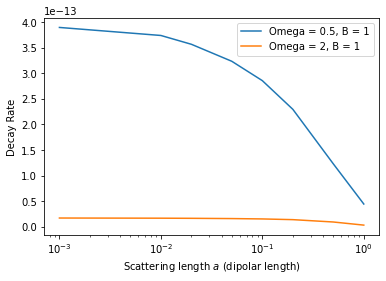

In [96]:
plt.semilogx(np.array(aScatteringList), decayRate1, label = 'Omega = 0.5, B = 1')
plt.semilogx(np.array(aScatteringList), decayRate2, label = 'Omega = 2, B = 1')
plt.legend()
plt.xlabel(r'Scattering length $a$ (dipolar length)')
plt.ylabel('Decay Rate')

The scattering length has a pretty big suppression effect, which is not really a supprise as it zeros  the amplitude of the wavefunction with it. Maybe I should the also implement the C6 attractive potential which will mitigate that effect by increasing a bit the amplitude of the wavefunction at close range.

#### With $C_6/r^6$

Just temporarilly hardcoded the $C_6$ to compare.

In [3]:
aScatteringList = [0.001, 0.01, 0.02, 0.05, 0.1, 0.2, 0.5, 1]
ki = 0.08
zPrecision = [5, 0.01]
ρ_parametersList = [[aScattering, 5, 0.01, 0.01] for aScattering in aScatteringList]
decayRate1 = [runSimulationList([0.5], [1], ki, ρ_parameters, zPrecision)[0,0] for ρ_parameters in ρ_parametersList]
decayRate2 = [runSimulationList([2], [1], ki, ρ_parameters, zPrecision)[0,0] for ρ_parameters in ρ_parametersList]

calculating groud state wavefunction
calculating ho wavefunction
number of jobs pending:  1 , end expected in  0  seconds
number of jobs pending:  1 , end expected in  0  seconds
number of jobs pending:  1 , end expected in  0  seconds
number of jobs pending:  1 , end expected in  0  seconds
number of jobs pending:  1 , end expected in  0  seconds
calculating groud state wavefunction
calculating ho wavefunction
number of jobs pending:  1 , end expected in  0  seconds
number of jobs pending:  1 , end expected in  0  seconds
number of jobs pending:  1 , end expected in  0  seconds
number of jobs pending:  1 , end expected in  0  seconds
calculating groud state wavefunction
calculating ho wavefunction
number of jobs pending:  1 , end expected in  0  seconds
number of jobs pending:  1 , end expected in  0  seconds
number of jobs pending:  1 , end expected in  0  seconds
number of jobs pending:  1 , end expected in  0  seconds
calculating groud state wavefunction
calculating ho wavefunction

Text(0, 0.5, 'Decay Rate')

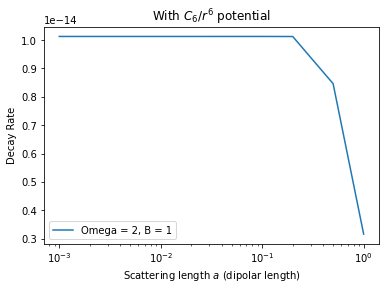

In [5]:
#plt.semilogx(np.array(aScatteringList), decayRate1, label = 'Omega = 0.5, B = 1')
plt.semilogx(np.array(aScatteringList), decayRate2, label = 'Omega = 2, B = 1')
plt.legend()
plt.title(r'With $C_6/r^6$ potential')
plt.xlabel(r'Scattering length $a$ (dipolar length)')
plt.ylabel('Decay Rate')

## Comparaison with Bruno's result

I multiply the bare rate from the equation in Bruno's paper by a factor of 2 to account for symmetrization. And $\frac{m}{\hbar^3}S^3d^4 = \frac{m}{\hbar^3}\frac{a_{dd}^2/J}{\mu^2/\hbar^4} = \frac{4\hbar a_{dd}^2}{Jm}$

In [3]:
def beta1_Bruno(k_f, a):
    return 2*16*np.pi/15*4*hbar*a_dd**2/(J*m)*(1-3*a*k_f*np.pi/16)**2*(k_f/a_dd)

def beta2_Bruno(k_f, a):
    return 2*16*np.pi/15*4*hbar*a_dd**2/(J**2*m)*(1-3*a*k_f*np.pi/16)**2*(k_f/a_dd)

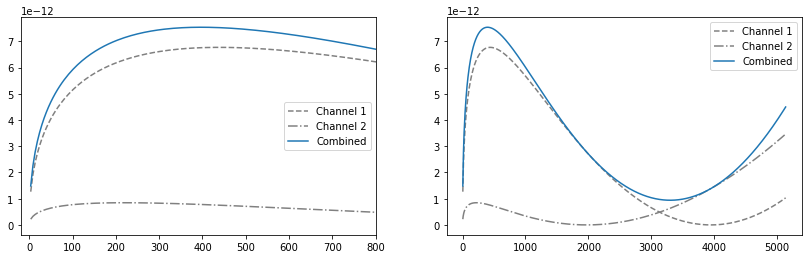

In [8]:
a = 0.5 # In dipolar units
cm = 100
BList = np.linspace(0.01, 15, 1000)
KList_1 = np.sqrt(BList)
KList_2 = np.sqrt(2*BList)
channel1 = beta1_Bruno(KList_1, a)*cm**3
channel2 = beta2_Bruno(KList_2, a)*cm**3

fig, ax = plt.subplots(1, 2, figsize = (14, 4))
axSmall, axLarge = ax
axSmall.plot(BList*Bnorm*1000, channel1, '--', color = 'grey', label = 'Channel 1')
axSmall.plot(BList*Bnorm*1000, channel2, '-.', color = 'grey', label = 'Channel 2')
axSmall.plot(BList*Bnorm*1000, channel1 + channel2, label = 'Combined')
axSmall.legend()
axSmall.set_xlim(-20, 800)
axLarge.plot(BList*Bnorm*1000, channel1, '--', color = 'grey', label = 'Channel 1')
axLarge.plot(BList*Bnorm*1000, channel2, '-.', color = 'grey', label = 'Channel 2')
axLarge.plot(BList*Bnorm*1000, channel1 + channel2, label = 'Combined')
axLarge.legend()

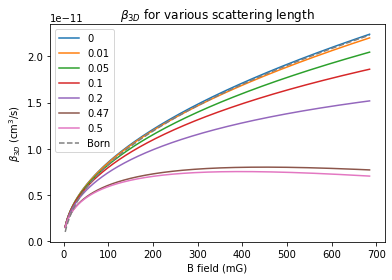

In [9]:
aList = [0, 0.01, 0.05, 0.1, 0.2, round(91*a_0/a_dd, 3), 0.5] # In dipolar units
cm = 100
BList = np.linspace(0.01, 2, 1000)
KList_1 = np.sqrt(BList)
KList_2 = np.sqrt(2*BList)
channelList = [beta1_Bruno(KList_1, a)*cm**3 + beta2_Bruno(KList_2, a)*cm**3 for a in aList]

ki = 0.08
KList_1 = np.sqrt(BList+ki**2)
KList_2 = np.sqrt(2*BList+ki**2)
channel1 = 2*sigma_norm*sigma_1(KList_1/ki)*hbar*(ki/a_dd)/m*cm**3
channel2 = 2*sigma_norm*sigma_2(KList_2/ki)*hbar*(ki/a_dd)/m*cm**3

fig, ax = plt.subplots(1, 1)
for (a, channel) in zip(aList, channelList):
    ax.plot(BList*Bnorm*1000, channel, label = str(a))
ax.plot(BList*Bnorm*1000, channel1 + channel2, '--', label = 'Born')
ax.set_ylim()
ax.set_title(r'$\beta_{3D}$ for various scattering length')
ax.set_xlabel(r'B field (mG)')
ax.set_ylabel(r'$\beta_{3D}$ (cm$^3$/s)')
ax.legend()

All seems to match pretty well

### Comparaison with very shallow lattice

In [20]:
aScattering = 0.01
ki = 0.08
Bmax = 2
Bmin = 0.01
nB = 20
omega1 = 0.005
ρmin_init, ρmax_init, dρ_init = aScattering, 5, 0.01
dρ_large_ratio = 0.01

ρ_parameters = [ρmin_init, ρmax_init, dρ_init, dρ_large_ratio]
BList = np.linspace(Bmin, Bmax, nB)
OmegaList = np.array([omega1])

decayRates3DFree = runSimulationList(OmegaList, BList, ki, ρ_parameters, barrier = False)[0, :]
decayRates3D = runSimulationList(OmegaList, BList, ki, ρ_parameters, barrier = True)[0, :]

omega2 = 0.015
OmegaList = np.array([omega2])
decayRates3D2 = runSimulationList(OmegaList, BList, ki, ρ_parameters, barrier = True)[0, :]

calculating groud state wavefunction
calculating ho wavefunction
number of jobs pending:  20 , end expected in  0  seconds
number of jobs pending:  20 , end expected in  0  seconds
number of jobs pending:  20 , end expected in  0  seconds
number of jobs pending:  3 , end expected in  0  seconds
number of jobs pending:  3 , end expected in  0  seconds
number of jobs pending:  2 , end expected in  0  seconds
number of jobs pending:  2 , end expected in  0  seconds
number of jobs pending:  2 , end expected in  0  seconds
number of jobs pending:  2 , end expected in  0  seconds
number of jobs pending:  2 , end expected in  1  seconds
number of jobs pending:  2 , end expected in  1  seconds
number of jobs pending:  2 , end expected in  1  seconds
number of jobs pending:  2 , end expected in  1  seconds
number of jobs pending:  2 , end expected in  1  seconds
number of jobs pending:  2 , end expected in  1  seconds
number of jobs pending:  2 , end expected in  1  seconds
number of jobs pendi

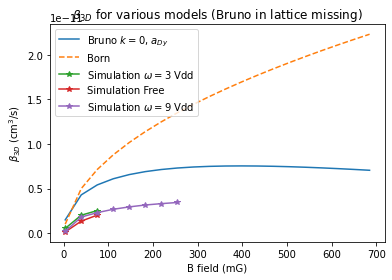

In [25]:
aScatteringDy = 0
aScatteringDy = round(91*a_0/a_dd, 3) # In dipolar units
cm = 100
KList_1 = np.sqrt(BList)
KList_2 = np.sqrt(2*BList)
decayRatesBruno3D = beta1_Bruno(KList_1, aScatteringDy)*cm**3 + beta2_Bruno(KList_2, aScatteringDy)*cm**3

ki = 0.08
decayRatesBornApprox3D = beta_BA(ki, BList)*cm**3

fig, ax = plt.subplots(1, 1)
ax.plot(BList*Bnorm*1000, decayRatesBruno3D, label = r'Bruno $k = 0$, $a_{Dy}$')
ax.plot(BList*Bnorm*1000, decayRatesBornApprox3D, '--', label = 'Born')
ax.plot(BList*Bnorm*1000, decayRates3D, '-*', label = f'Simulation $\omega = ${round(omega1*OmegaNorm/(2*np.pi*1000))} Vdd')
ax.plot(BList*Bnorm*1000, decayRates3DFree, '-*', label = f'Simulation Free')
ax.plot(BList*Bnorm*1000, decayRates3D2, '-*', label = f'Simulation $\omega = ${round(omega2*OmegaNorm/(2*np.pi*1000))} Vdd')
ax.set_ylim()
ax.set_title(r'$\beta_{3D}$ for various models (Bruno in lattice missing)')
ax.set_xlabel(r'B field (mG)')
ax.set_ylabel(r'$\beta_{3D}$ (cm$^3$/s)')
ax.legend()
plt.savefig('modelComparaison.png', dpi = 300)

In [4]:
aScattering = 0.01
ki = 0.08
Bmax = 2
Bmin = 0.01
nB = 10
omega1 = 0.005
ρmin_init, ρmax_init, dρ_init = aScattering, 5, 0.01
dρ_large_ratio = 0.01

ρ_parameters = [ρmin_init, ρmax_init, dρ_init, dρ_large_ratio]
BList = np.linspace(Bmin, Bmax, nB)
OmegaList = np.array([omega1])

decayRates3DFree = runSimulationList(OmegaList, BList, ki, ρ_parameters, barrier = False)[0, :]
decayRates3D = runSimulationList(OmegaList, BList, ki, ρ_parameters, barrier = True)[0, :]

calculating groud state wavefunction
calculating ho wavefunction
number of jobs pending:  10 , end expected in  0  seconds
number of jobs pending:  10 , end expected in  0  seconds
number of jobs pending:  10 , end expected in  0  seconds
number of jobs pending:  2 , end expected in  0  seconds
number of jobs pending:  1 , end expected in  0  seconds
number of jobs pending:  1 , end expected in  0  seconds
number of jobs pending:  1 , end expected in  0  seconds
number of jobs pending:  1 , end expected in  0  seconds
number of jobs pending:  1 , end expected in  0  seconds
number of jobs pending:  1 , end expected in  1  seconds
number of jobs pending:  1 , end expected in  1  seconds
number of jobs pending:  1 , end expected in  1  seconds
number of jobs pending:  1 , end expected in  1  seconds
number of jobs pending:  1 , end expected in  1  seconds
number of jobs pending:  1 , end expected in  1  seconds
number of jobs pending:  1 , end expected in  1  seconds
number of jobs pendi

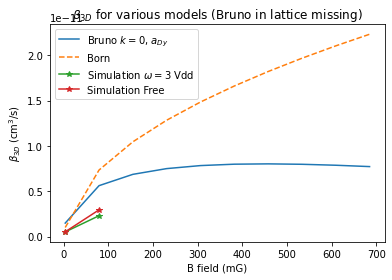

In [5]:
aScatteringDy = 0
aScatteringDy = round(91*a_0/a_dd, 3) # In dipolar units
cm = 100
KList_1 = np.sqrt(BList)
KList_2 = np.sqrt(2*BList)
decayRatesBruno3D = beta1_Bruno(KList_1, aScatteringDy)*cm**3 + beta2_Bruno(KList_2, aScatteringDy)*cm**3

ki = 0.08
decayRatesBornApprox3D = beta_BA(ki, BList)*cm**3

fig, ax = plt.subplots(1, 1)
ax.plot(BList*Bnorm*1000, decayRatesBruno3D, label = r'Bruno $k = 0$, $a_{Dy}$')
ax.plot(BList*Bnorm*1000, decayRatesBornApprox3D, '--', label = 'Born')
ax.plot(BList*Bnorm*1000, decayRates3D, '-*', label = f'Simulation $\omega = ${round(omega1*OmegaNorm/(2*np.pi*1000))} Vdd')
ax.plot(BList*Bnorm*1000, decayRates3DFree, '-*', label = f'Simulation Free')
ax.set_ylim()
ax.set_title(r'$\beta_{3D}$ for various models (Bruno in lattice missing)')
ax.set_xlabel(r'B field (mG)')
ax.set_ylabel(r'$\beta_{3D}$ (cm$^3$/s)')
ax.legend()

## $\beta_{2D}$ with purely $n=0$ versus $1/a_z$

### $V_{dd}$ averaged

In [2]:
ki = 0.06
omegaMin = 0.02
omegaMax = 10
nOmega = 200
ρmin_init, ρmax_init, dρ_init = 0.01, 5, 0.01
dρ_large_ratio = 0.01

BList = np.array([0.1, 0.5, 1, 2])
OmegaList = np.linspace(omegaMin, omegaMax, nOmega)
DList = np.sqrt(2/OmegaList)
z_max, dz = computeZDimensions(DList)
ρ_parameters = [ρmin_init, ρmax_init, dρ_init, dρ_large_ratio]

startTime = time.time()
decayRates = runSimulationList(OmegaList, BList, ki, ρ_parameters, barrier = True)
print('it took ', str(round(time.time() - startTime, 2)), ' seconds')
cm = 100
ratio3D2DArray = (a_dd*cm)*np.sqrt(np.pi/2)*np.sqrt(2/np.transpose(np.tile(OmegaList, (len(BList),1))))
decayRates2D = decayRates/ratio3D2DArray
oscillatorLength = a_dd*np.sqrt(2/OmegaList)

calculating groud state wavefunction
calculating ho wavefunction
number of jobs pending:  800 , end expected in  0  seconds
number of jobs pending:  800 , end expected in  0  seconds
number of jobs pending:  784 , end expected in  118  seconds
number of jobs pending:  568 , end expected in  18  seconds
number of jobs pending:  524 , end expected in  16  seconds
number of jobs pending:  480 , end expected in  14  seconds
number of jobs pending:  436 , end expected in  12  seconds
number of jobs pending:  392 , end expected in  10  seconds
number of jobs pending:  348 , end expected in  9  seconds
number of jobs pending:  307 , end expected in  8  seconds
number of jobs pending:  263 , end expected in  7  seconds
number of jobs pending:  223 , end expected in  5  seconds
number of jobs pending:  183 , end expected in  4  seconds
number of jobs pending:  143 , end expected in  3  seconds
number of jobs pending:  104 , end expected in  2  seconds
number of jobs pending:  71 , end expected 

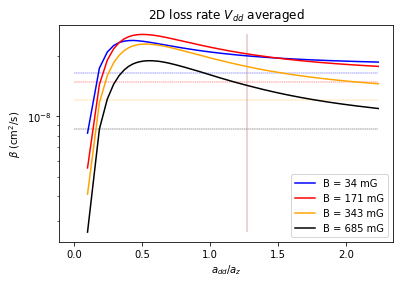

In [15]:
colors = ['blue', 'red', 'orange', 'black', 'pink']
for i, B in enumerate(BList):
    plt.semilogy(a_dd/oscillatorLength, decayRates2D[:,i], label = f'B = {round(B*Bnorm*1000)} mG', color = colors[i])
    plt.hlines(betaCoefficientPure2D(ki, B), 0, max(a_dd/oscillatorLength), linestyles = 'dashed', color = colors[i], lw = 0.4)
plt.vlines(np.sqrt(2/(OmegaNorm/(480*2*np.pi*1000))), decayRates2D.min(), decayRates2D.max(), color = 'brown', lw = 0.4)
plt.ylabel(r'$\beta$ (cm$^2/$s)')
plt.xlabel(r'$a_{dd}/a_z$')
plt.title(r'2D loss rate $V_{dd}$ averaged')
plt.legend()
#plt.ylim(4e-9, 2e-8)
plt.savefig('2D_az_1.jpg', dpi = 300)

### Pure $1/\rho^3$

Need to modify the code

In [3]:
ki = 0.06
omegaMin = 0.02
omegaMax = 10
nOmega = 200
ρmin_init, ρmax_init, dρ_init = 0.01, 5, 0.01
dρ_large_ratio = 0.01

BList = np.array([0.1, 0.5, 1, 2])
OmegaList = np.linspace(omegaMin, omegaMax, nOmega)
DList = np.sqrt(2/OmegaList)
z_max, dz = computeZDimensions(DList)
ρ_parameters = [ρmin_init, ρmax_init, dρ_init, dρ_large_ratio]

startTime = time.time()
decayRates = runSimulationList(OmegaList, BList, ki, ρ_parameters, barrier = True)
print('it took ', str(round(time.time() - startTime, 2)), ' seconds')
cm = 100
ratio3D2DArray = (a_dd*cm)*np.sqrt(np.pi/2)*np.sqrt(2/np.transpose(np.tile(OmegaList, (len(BList),1))))
decayRates2D = decayRates/ratio3D2DArray
oscillatorLength = a_dd*np.sqrt(2/OmegaList)

calculating groud state wavefunction
calculating ho wavefunction
number of jobs pending:  800 , end expected in  0  seconds
number of jobs pending:  800 , end expected in  0  seconds
number of jobs pending:  788 , end expected in  158  seconds
number of jobs pending:  596 , end expected in  21  seconds
number of jobs pending:  381 , end expected in  11  seconds
number of jobs pending:  339 , end expected in  9  seconds
number of jobs pending:  300 , end expected in  8  seconds
number of jobs pending:  259 , end expected in  7  seconds
number of jobs pending:  224 , end expected in  6  seconds
number of jobs pending:  182 , end expected in  5  seconds
number of jobs pending:  143 , end expected in  4  seconds
number of jobs pending:  104 , end expected in  2  seconds
number of jobs pending:  64 , end expected in  1  seconds
number of jobs pending:  23 , end expected in  0  seconds
it took  23.94  seconds


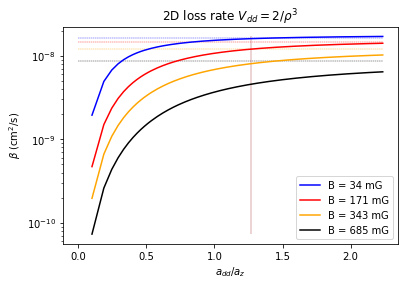

In [4]:
colors = ['blue', 'red', 'orange', 'black', 'pink']
for i, B in enumerate(BList):
    plt.semilogy(a_dd/oscillatorLength, decayRates2D[:,i], label = f'B = {round(B*Bnorm*1000)} mG', color = colors[i])
    plt.hlines(betaCoefficientPure2D(ki, B), 0, max(a_dd/oscillatorLength), linestyles = 'dashed', color = colors[i], lw = 0.4)
plt.vlines(np.sqrt(2/(OmegaNorm/(480*2*np.pi*1000))), decayRates2D.min(), decayRates2D.max(), color = 'brown', lw = 0.4)
plt.ylabel(r'$\beta$ (cm$^2/$s)')
plt.xlabel(r'$a_{dd}/a_z$')
plt.title(r'2D loss rate $V_{dd} = 2/\rho^3$')
plt.legend()
#plt.ylim(4e-9, 2e-8)
plt.savefig('2D_az_2.jpg', dpi = 300)

### $V_{dd} = 0$

In [2]:
ki = 0.06
omegaMin = 0.02
omegaMax = 10
nOmega = 200
ρmin_init, ρmax_init, dρ_init = 0.01, 5, 0.01
dρ_large_ratio = 0.01

BList = np.array([0.1, 0.5, 1, 2])
OmegaList = np.linspace(omegaMin, omegaMax, nOmega)
DList = np.sqrt(2/OmegaList)
z_max, dz = computeZDimensions(DList)
ρ_parameters = [ρmin_init, ρmax_init, dρ_init, dρ_large_ratio]

startTime = time.time()
decayRates = runSimulationList(OmegaList, BList, ki, ρ_parameters, barrier = False)
print('it took ', str(round(time.time() - startTime, 2)), ' seconds')
cm = 100
ratio3D2DArray = (a_dd*cm)*np.sqrt(np.pi/2)*np.sqrt(2/np.transpose(np.tile(OmegaList, (len(BList),1))))
decayRates2D = decayRates/ratio3D2DArray
oscillatorLength = a_dd*np.sqrt(2/OmegaList)

calculating groud state wavefunction
calculating ho wavefunction
number of jobs pending:  800 , end expected in  0  seconds
number of jobs pending:  800 , end expected in  0  seconds
number of jobs pending:  772 , end expected in  66  seconds
number of jobs pending:  520 , end expected in  13  seconds
number of jobs pending:  472 , end expected in  12  seconds
number of jobs pending:  424 , end expected in  10  seconds
number of jobs pending:  378 , end expected in  9  seconds
number of jobs pending:  328 , end expected in  7  seconds
number of jobs pending:  276 , end expected in  6  seconds
number of jobs pending:  224 , end expected in  5  seconds
number of jobs pending:  181 , end expected in  4  seconds
number of jobs pending:  140 , end expected in  3  seconds
number of jobs pending:  96 , end expected in  2  seconds
number of jobs pending:  48 , end expected in  1  seconds
it took  19.27  seconds


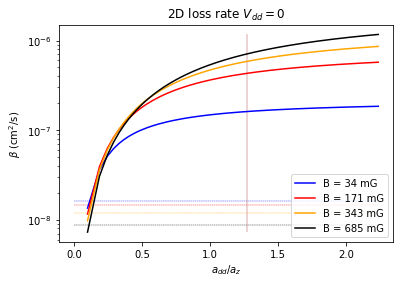

In [3]:
colors = ['blue', 'red', 'orange', 'black', 'pink']
for i, B in enumerate(BList):
    plt.semilogy(a_dd/oscillatorLength, decayRates2D[:,i], label = f'B = {round(B*Bnorm*1000)} mG', color = colors[i])
    plt.hlines(betaCoefficientPure2D(ki, B), 0, max(a_dd/oscillatorLength), linestyles = 'dashed', color = colors[i], lw = 0.4)
plt.vlines(np.sqrt(2/(OmegaNorm/(480*2*np.pi*1000))), decayRates2D.min(), decayRates2D.max(), color = 'brown', lw = 0.4)
plt.ylabel(r'$\beta$ (cm$^2/$s)')
plt.xlabel(r'$a_{dd}/a_z$')
plt.title(r'2D loss rate $V_{dd} = 0$')
plt.legend()
#plt.ylim(4e-9, 2e-8)
plt.savefig('2D_az_3.jpg', dpi = 300)

$\beta_{2D}$ versus $1/a_{z}$ for $V_{dd}$ averaged, pure $1/\rho^3$ and no $V_{dd}

# Trash

In [13]:
def test(**parameters):
    dimension = parameters['lol']
    return dimension*2

In [14]:
dico = {'dimension':np.array([5, 1])}
dico = {'dimension':np.array([5, 1]),
       'other':np.array([4])}
test(**dico)

KeyError: 'lol'

In [18]:
def foo(a, b=3, *args, **kwargs):
    defaultKwargs = { 'c': 10, 'd': 12 }
    kwargs = { **defaultKwargs, **kwargs }
    print(a, b, args, kwargs)

def foo(a, b=3, **kwargs):
    defaultKwargs = { 'c': 10, 'd': 12 }
    kwargs = { **defaultKwargs, **kwargs }
    print(a, b, kwargs)
  # Do something    

foo(1) # 1 3 () {'c': 10, 'd': 12}
foo(1, d=5) # 1 3 () {'c': 10, 'd': 5}
foo(1, 2, 4, 6, d=5) # 1 2 (4,) {'c': 10, 'd': 5}

1 3 {'c': 10, 'd': 12}
1 3 {'c': 10, 'd': 5}


TypeError: foo() takes from 1 to 2 positional arguments but 4 were given